# Análisis Comparativo de Interpretabilidad: Árboles de Decisión e Interpretable Decision Sets (IDS)

Este notebook forma parte del Trabajo de Fin de Máster (TFM) *A Tool for Human Evaluation of Interpretability* en el Máster en Inteligencia Artificial de la Universidad Politécnica de Madrid, realizado en el año 2024 por Adrián Vargas Rangel. Su objetivo principal es analizar y comparar la interpretabilidad y precisión de modelos transparentes en aprendizaje automático, específicamente Árboles de Decisión (DT) e Interpretable Decision Sets (IDS).

## Contexto

La interpretabilidad en inteligencia artificial es un tema crucial, especialmente en áreas críticas donde las decisiones automáticas tienen un impacto significativo, como la educación, la medicina y el sistema judicial. En este contexto, los modelos de aprendizaje automático transparentes, como los Árboles de Decisión y los Interpretable Decision Sets, se presentan como herramientas esenciales para promover la confianza y la comprensión por parte de los usuarios.

Este trabajo evalúa estos modelos en un caso práctico basado en el rendimiento académico de estudiantes de matemáticas. La evaluación combina métricas técnicas, como la simplicidad y la longitud de las reglas generadas, con la percepción humana de interpretabilidad, medida a través de un cuestionario diseñado específicamente para este estudio.

Se utilizó el Árbol de Decisión (DT) de la biblioteca [InterpretML](https://interpret.ml/) debido a su enfoque en la interpretabilidad intrínseca y su capacidad para generar explicaciones locales y globales fácilmente comprensibles:

- **Compatibilidad con explicaciones visuales**: Proporciona visualizaciones claras, como diagramas de árbol y gráficas de importancia de características, lo que facilita su integración en el cuestionario.
- **Optimización para interpretabilidad**: Prioriza métricas como la parsimonía y simplicidad en la construcción del árbol.
- **Consistencia con IDS**: Permite una comparación directa con los modelos IDS al generar reglas con una estructura interpretativa similar.

InterpretML tiene un modelo subyacente basado en scikit-learn, el cual se usó en este trabjo para detallar algunos de los atributos de los grafos generados.

Además, este trabajo incluye el uso de una **librería personalizada para este estudio llamada IDS** para su implementación. Esta librería fue adaptada y extendida a partir del repositorio [pyIDS](https://github.com/jirifilip/pyIDS) y del estudio de [Lakkaraju et al. (2016)](https://cs.stanford.edu/people/jure/pubs/interpretable-kdd16.pdf). Su objetivo es facilitar el entrenamiento de modelos IDS optimizando tanto la precisión como la interpretabilidad. La implementación incluye herramientas de generación de reglas y evaluación basada en métricas como soporte, confianza y cobertura. La librería completa está disponible en el repositorio: [IDS - Interpretable Decision Sets](https://github.com/adrian-vargas/IDS).

El enfoque dual (métricas técnicas + percepción humana) busca proporcionar información sobre cómo los usuarios finales perciben las explicaciones ofrecidas por estos modelos y cómo esto afecta su capacidad para comprender y confiar en las predicciones realizadas.

## Conjunto de Datos

El dataset utilizado es el **Student Performance**, recopilado por Paulo Cortez y disponible en el [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance). Este conjunto de datos contiene información sobre características sociodemográficas y académicas de estudiantes, incluyendo:

- **absences**: Número de ausencias escolares.
- **studytime**: Tiempo dedicado al estudio semanal.
- **failures**: Número de asignaturas reprobadas.
- **Fedu**: Nivel educativo del padre.
- **reason_reputation**: Razón principal para elegir la escuela (reputación).
- **goout**: Frecuencia con la que los estudiantes salen con amigos.

Estas variables se identificaron como las más relevantes para ambos modelos y se utilizaron para construir modelos predictivos que clasifican a los estudiantes en las categorías de Aprobado o Reprobado. Estas clasificaciones sirvieron como base para evaluar la interpretabilidad de las reglas generadas por los modelos.

## Cuestionario de Evaluación

Como parte central de este trabajo, se desarrolló una aplicación web para implementar un cuestionario que permite a los usuarios analizar las reglas generadas por los modelos y obtener información para evaluar su percepción de interpretabilidad. La aplicación está disponible en el siguiente enlace: [Survey XAI](https://survey-xai-production.up.railway.app/).

## Organización del Notebook

Este notebook está organizado en las siguientes secciones:

1. **Configuración y Exploración de Datos**:  
   Carga y análisis inicial del dataset para entender su estructura y principales variables. Se incluyen herramientas como la matriz de correlación, funciones de entrenamiento, cálculos de interpretabilidad y reportería para establecer la base de los modelos.  

2. **Entrenamiento de Modelos**:  
   Entrenamiento de modelos iniciales y finales que incluyen Árboles de Decisión (DT) utilizando Scikit-learn e InterpretML, así como **Interpretable Decision Sets (IDS)**.

3. **Evaluación de Modelos**:  
   Comparación de métricas clave como precisión y propiedades de interpretabilidad, utilizando pruebas como TP, FP, TN y FN. También se analizan las respuestas del cuestionario categorizadas en términos de exactitud, ambigüedad y detección de errores.

4. **Visualización de Resultados**:  
   Generación de gráficos que ilustran los hallazgos clave del análisis, como métricas de precisión, parsimonia, cobertura e interpretabilidad. Además, se incluyen gráficos de distribución de predicciones y visualizaciones específicas para los modelos IDS y DT.

Este notebook sirve como apoyo técnico para los resultados reportados en el TFM y ofrece un enfoque práctico para quienes deseen replicar o expandir este estudio.


# Configuración y Exploración de Datos

In [1]:
# ===========================
# 1. Instalación de Librerías
# ===========================
!pip install interpret
!pip install yellowbrick
!pip install seaborn apyori imbalanced-learn scikit-learn
!pip install pulp
!pip install chardet
!pip install git+https://github.com/adrian-vargas/IDS.git
!wget -nc -O student.zip 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
!unzip -n student.zip
!ls

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 11.2 MB/s eta 0:00:00
  Created 

## Librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from interpret.glassbox import ClassificationTree
from interpret import show
from collections import Counter
from sklearn.tree import plot_tree
from yellowbrick.features import FeatureImportances
import matplotlib.image as mpimg
from PIL import Image
from IPython.display import display
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score, make_scorer,
    precision_score, recall_score, accuracy_score
)
from ids import (
    IDSModel,
    calculate_ids_interpretability_metrics,
    calculate_correct_incorrect_cover,
    calculate_rule_properties,
    calculate_ids_probabilities,
    print_and_save_rules,
    visualize_ids_rules,
    generate_ids_global_graph,
    explain_local_ids,
    explain_global_ids
)

## Matriz de correlación

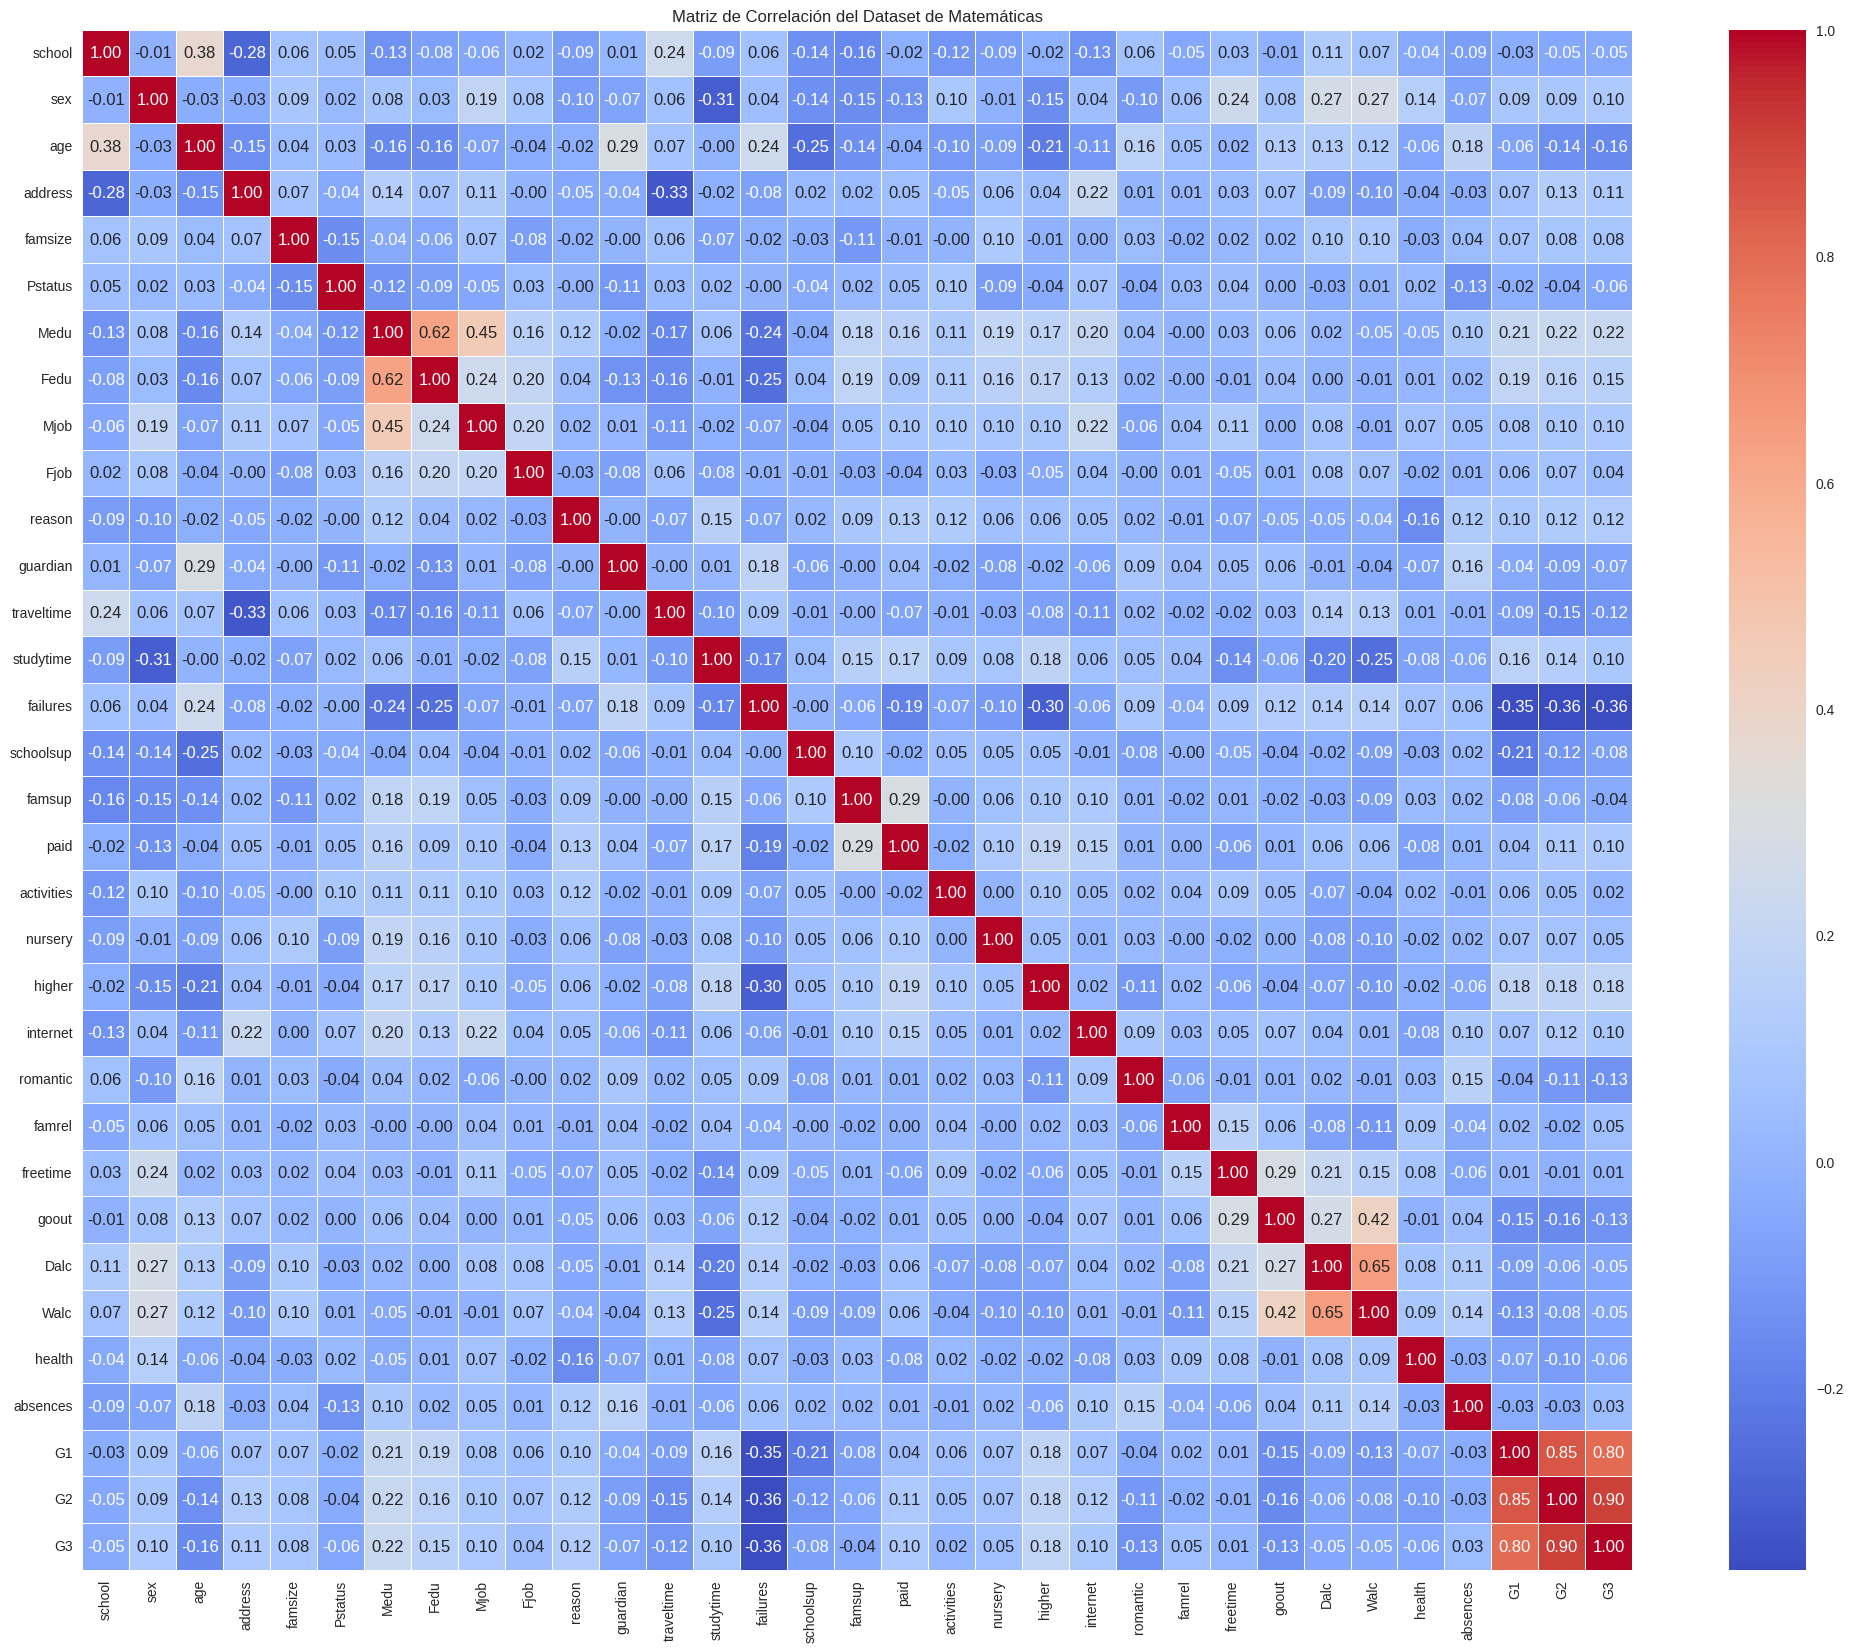

In [3]:
# Cargar el dataset
data = pd.read_csv('student-mat.csv', delimiter=';')

# Convertir variables categóricas a numéricas
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(25, 20))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título del gráfico
plt.title('Matriz de Correlación del Dataset de Matemáticas')

# Mostrar el gráfico
plt.show()


## Funciones

### Preprocesamiento de datos

In [4]:
def preprocess_data(selected_features=None, test_size=0.3, random_state=42, apply_smote=False):
    # Carga el dataset
    data = pd.read_csv('student-mat.csv', delimiter=';')
    print("Datos cargados correctamente.")

    # Convierte la variable 'G3' en binaria
    data['G3'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)
    print("Variable objetivo 'G3' convertida a binaria.")

    # Convierte variables categóricas a dummies
    X = pd.get_dummies(data.drop(columns=['G1', 'G2', 'G3']), drop_first=True)
    y = data['G3']
    print("Variables categóricas convertidas a dummies.")

    # Seleccionar características
    if selected_features is None:
        selected_features = X.columns.tolist()
        print("No se proporcionaron características seleccionadas, se usarán todas las características.")
    else:
        missing_features = [feat for feat in selected_features if feat not in X.columns]
        if missing_features:
            raise ValueError(f"Las siguientes características seleccionadas no están en el dataset: {missing_features}")
        X = X[selected_features]
        print("Características seleccionadas:", selected_features)

    # Reidentificar columnas booleanas después de la selección de características
    boolean_cols = [col for col in X.columns if set(X[col].dropna().unique()).issubset({0, 1})]
    print(f"Columnas booleanas identificadas: {boolean_cols}")

    # Convertir columnas booleanas a enteros
    if boolean_cols:
        X[boolean_cols] = X[boolean_cols].astype(int)
        print(f"Columnas booleanas convertidas a enteros: {boolean_cols}")

    # Convertir todas las columnas a numéricas
    X = X.apply(pd.to_numeric, errors='coerce')
    print("Conversión de todas las columnas a numéricas completada.")

    # Manejar valores faltantes
    if X.isnull().values.any():
        print("Se encontraron valores NaN. Rellenando con la mediana.")
        X = X.fillna(X.median())

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f"Datos divididos en entrenamiento ({(1 - test_size) * 100:.0f}%) y prueba ({test_size * 100:.0f}%).")

    if apply_smote:
        # Aplicar SMOTE
        smote = SMOTE(random_state=random_state)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        print("SMOTE aplicado al conjunto de entrenamiento para balancear las clases.")

        # Reconversión de booleanos después de SMOTE
        for col in boolean_cols:
            if col in X_train_smote.columns:
                X_train_smote[col] = X_train_smote[col].apply(lambda x: 1 if x >= 0.5 else 0)
                X_train_smote[col] = X_train_smote[col].astype(int)
        print("Columnas booleanas reconvertidas a 0 y 1 después de SMOTE.")

        return X_train_smote, X_test, y_train_smote, y_test, selected_features, boolean_cols
    else:
        return X_train, X_test, y_train, y_test, selected_features, boolean_cols


### scikit-learn

In [5]:
def train_sklearn_model(X_train, y_train, max_depth=4, min_samples_leaf=5, random_state=42):
    """
    Entrena un modelo de Árbol de Decisión usando scikit-learn con parámetros ajustables.
    Parámetros:
    - X_train: Conjunto de características de entrenamiento.
    - y_train: Etiquetas de entrenamiento.
    - max_depth: Profundidad máxima del árbol.
    - min_samples_leaf: Mínimo número de muestras por hoja.
    - random_state: Controla la reproducibilidad.
    """
    # Convertir 'False'/'True' a 0/1 en todas las columnas de tipo object
    X_train = X_train.applymap(lambda x: 0 if x == 'False' else (1 if x == 'True' else x))

    # Asegurar que todos los valores sean numéricos
    X_train = X_train.astype(float)

    # Crear y entrenar el modelo DecisionTreeClassifier de scikit-learn
    tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=random_state
    )
    tree.fit(X_train, y_train)
    print("Modelo scikit-learn entrenado.")

    return tree


def evaluate_sklearn_model(tree, X_test, y_test, class_names=["Reprobado", "Aprobado"]):
    """
    Evalúa el modelo de scikit-learn y muestra las métricas clave y la matriz de confusión.
    Parámetros:
    - tree: El modelo de Árbol de Decisión entrenado.
    - X_test, y_test: Conjuntos de datos de prueba.
    - class_names: Etiquetas para las clases.
    """
    # Calcular la precisión del modelo en los datos de prueba
    accuracy = tree.score(X_test, y_test)
    print(f"Precisión del Árbol de Decisión optimizado: {accuracy:.2f}")

    # Predicción de etiquetas con el modelo
    y_pred = tree.predict(X_test)

    # Imprimir reporte de clasificación (precisión, recall, f1-score)
    print("Reporte de clasificación (modelo optimizado):")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    cm_df = pd.DataFrame(
        cm,
        index=['Aprobado', 'Reprobado'],  # Índices
        columns=['Predicho Aprobado', 'Predicho Reprobado']  # Columnas
    )

    # Visualización de la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión (Árbol de Decisión optimizado)')
    plt.ylabel('Verdad')
    plt.xlabel('Predicción')
    plt.show()

    return y_pred

def visualize_sklearn_tree(tree, feature_names, class_names=["Reprobado", "Aprobado"]):
    """
    Visualiza el árbol de decisión entrenado con scikit-learn.
    Parámetros:
    - tree: El modelo de árbol entrenado.
    - feature_names: Nombres de las características.
    - class_names: Nombres de las clases objetivo.
    """
    plt.figure(figsize=(20,10))
    plot_tree(
        tree,
        feature_names=feature_names,  # Nombres de las características
        class_names=class_names,  # Etiquetas de las clases
        filled=True,  # Colorea los nodos por clase
        rounded=True,  # Bordes redondeados
        proportion=True  # Proporciones basadas en la cantidad de muestras en cada nodo
    )
    plt.title("Árbol de Decisión optimizado (scikit-learn)")
    plt.show()
    print("Árbol de decisión visualizado.")

def visualize_feature_importance(tree, X_train, y_train, feature_names):
    """
    Visualiza la importancia de las características usando Yellowbrick.
    Parámetros:
    - tree: El modelo de árbol entrenado.
    - X_train, y_train: Conjuntos de datos de entrenamiento.
    - feature_names: Nombres de las características.
    """
    viz = FeatureImportances(tree, labels=feature_names)
    viz.fit(X_train, y_train)  # Ajusta el visualizador a los datos
    viz.show()
    print("Importancia de características visualizada con Yellowbrick.")

def extract_rules(model, X_train, feature_names, class_names=["Reprobado", "Aprobado"]):
    """
    Extrae las reglas del árbol de decisión junto con métricas asociadas, y utiliza los datos del DataFrame del conjunto de entrenamiento.

    Parámetros:
    - model: El modelo de Árbol de Decisión entrenado.
    - X_train: Conjunto de características de entrenamiento.
    - feature_names: Nombres de las características.
    - class_names: Nombres de las clases.
    """
    tree_ = model.tree_
    feature_name = [feature_names[i] if i != -2 else "undefined!" for i in tree_.feature]
    rules = []
    total_samples = X_train.shape[0]

    # Función recursiva para recorrer los nodos del árbol
    def recurse(node, path, covered_indices):
        if tree_.feature[node] != -2:  # No es una hoja
            name = feature_name[node]  # Nombre de la característica
            threshold = tree_.threshold[node]

            # Condiciones para los nodos izquierdo y derecho
            condition_left = f"{name} ≤ {threshold:.2f}"
            condition_right = f"{name} > {threshold:.2f}"

            # Filtrar los índices cubiertos por la condición actual
            left_indices = covered_indices.intersection(X_train[X_train[name] <= threshold].index)
            right_indices = covered_indices.intersection(X_train[X_train[name] > threshold].index)

            # Recorrer el nodo izquierdo
            left_path = path.copy()
            left_path.append(condition_left)
            recurse(tree_.children_left[node], left_path, left_indices)

            # Recorrer el nodo derecho
            right_path = path.copy()
            right_path.append(condition_right)
            recurse(tree_.children_right[node], right_path, right_indices)
        else:  # Nodo hoja
            value = tree_.value[node][0]
            total_node_samples = len(covered_indices)

            if total_node_samples > 0:
                class_idx = value.argmax()
                class_name = class_names[class_idx]
                rule = " y ".join(path)
                precision = value[class_idx] / sum(value)
                parsimony = len(path)
                coverage = total_node_samples / total_samples
                gini = tree_.impurity[node]
                sparsity = 1 / parsimony if parsimony > 0 else 0

                # Guardar la regla y las métricas asociadas
                rules.append({
                    'Regla': f"si {rule} entonces {class_name}",
                    'Muestras': total_node_samples,
                    'Precisión': round(precision, 2),
                    'Parsimonia': parsimony,
                    'Cobertura': round(coverage, 2),
                    'Gini': round(gini, 4),
                    'Sparsidad': round(sparsity, 2),
                    'Índices Muestras': list(covered_indices)  # Almacenar los índices de las muestras cubiertas
                })

    # Iniciar la recursión desde la raíz con todos los índices del DataFrame
    recurse(0, [], X_train.index)

    # Crear DataFrame con las reglas
    rules_df = pd.DataFrame(rules)

    return rules_df  # Devolver el DataFrame con las reglas

### InterpretML

In [6]:
def train_interpretml_model(X_train, y_train, max_depth=3, min_samples_leaf=5):
    """
    Entrena un modelo de Árbol de Decisión usando InterpretML.
    Parámetros:
    - X_train: Conjunto de entrenamiento.
    - y_train: Etiquetas del conjunto de entrenamiento.
    - max_depth: Profundidad máxima del árbol.
    - min_samples_leaf: Número mínimo de muestras por hoja.
    """

    # Convertir 'False'/'True' a 0/1 en todas las columnas de tipo object
    X_train = X_train.applymap(lambda x: 0 if x == 'False' else (1 if x == 'True' else x))

    # Asegurar que todos los valores sean numéricos
    X_train = X_train.astype(float)

    # Crear y entrenar el modelo ClassificationTree de InterpretML
    interpretml_tree = ClassificationTree(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf
    )
    interpretml_tree.fit(X_train, y_train)
    print("Modelo InterpretML entrenado.")

    return interpretml_tree

def evaluate_interpretml_model(interpretml_tree, X_test, y_test, class_names=["Reprobado", "Aprobado"]):
    """
    Evalúa el modelo de InterpretML mostrando las métricas y la matriz de confusión.
    Parámetros:
    - interpretml_tree: Modelo de Árbol de Decisión entrenado.
    - X_test, y_test: Conjuntos de datos de prueba.
    - class_names: Nombres de las clases objetivo.
    """
    # Calcular la precisión del modelo en el conjunto de prueba
    accuracy = interpretml_tree.score(X_test, y_test)
    print(f"Precisión del Árbol de Decisión simplificado (InterpretML): {accuracy:.2f}")

    # Predicción de etiquetas
    y_pred = interpretml_tree.predict(X_test)

    # Imprimir reporte de clasificación (precisión, recall, f1-score)
    print("Reporte de clasificación (modelo simplificado):")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    cm_df = pd.DataFrame(
        cm,
        index=['Aprobado', 'Reprobado'],  # Etiquetas de las filas
        columns=['Predicho Aprobado', 'Predicho Reprobado']  # Etiquetas de las columnas
    )

    # Visualización de la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión (InterpretML - Modelo Simplificado)')
    plt.ylabel('Verdad')
    plt.xlabel('Predicción')
    plt.show()

    return y_pred

def visualize_interpretml_tree(interpretml_tree, feature_names):
    """
    Visualiza las explicaciones globales y locales del modelo de InterpretML.
    Parámetros:
    - interpretml_tree: Modelo de árbol de decisión entrenado.
    - feature_names: Nombres de las características.
    """
    # Explicación global del modelo (impacto de las características en general)
    global_explanation = interpretml_tree.explain_global()
    show(global_explanation)  # Muestra la explicación global
    print("Explicación global del modelo mostrada.")

    # Explicación local para las primeras 5 instancias del conjunto de prueba
    local_explanation = interpretml_tree.explain_local(X_test.iloc[:5], y_test.iloc[:5])
    show(local_explanation)  # Muestra la explicación local
    print("Explicación local del modelo mostrada.")

def visualize_feature_importance_interpretml(interpretml_tree, X_train, y_train, feature_names):
    """
    Visualiza la importancia de las características del modelo de InterpretML usando Yellowbrick.
    Parámetros:
    - interpretml_tree: Modelo de InterpretML.
    - X_train, y_train: Conjuntos de datos de entrenamiento.
    - feature_names: Nombres de las características.
    """
    sk_tree_model = interpretml_tree._model()  # Extraer el modelo subyacente de scikit-learn
    viz = FeatureImportances(sk_tree_model, labels=feature_names)
    viz.fig.set_size_inches(12, 8)  # Ajustar el tamaño de la figura
    viz.fit(X_train, y_train)  # Ajustar el visualizador con los datos de entrenamiento
    viz.show()
    print("Importancia de características visualizada con Yellowbrick para InterpretML.")

def show_samples_per_node_interpretml(interpretml_tree):
    """
    Muestra el número de muestras y la impureza de cada nodo del modelo de InterpretML.
    Parámetros:
    - interpretml_tree: Modelo de InterpretML entrenado.
    """
    sk_tree_model = interpretml_tree._model()  # Extraer el modelo de scikit-learn
    tree = sk_tree_model.tree_  # Acceder a los atributos del árbol

    # Iterar sobre cada nodo del árbol y mostrar información relevante
    for node in range(tree.node_count):
        print(f"Nodo {node}:")
        print(f"  Muestras: {tree.n_node_samples[node]}")  # Número de muestras en este nodo
        print(f"  Impureza: {tree.impurity[node]:.4f}")  # Impureza (por ejemplo, Gini)
        print(f"  Índice de clase dominante: {tree.value[node].argmax()}")  # Clase predominante en este nodo
        print()

### Testing

In [7]:
def test_tree_sklearn(tree_model, test_df):
    prediction = tree_model.predict(test_df)
    return prediction[0]

def test_interpretml_tree(interpretml_tree, test_df):
    prediction = interpretml_tree.predict(test_df)
    return prediction[0]

def test_ids_model(ids_model, test_df):
    prediction = ids_model.predict(test_df)
    return prediction[0]


### Gráficos

In [8]:
def plot_precision_vs_parsimony(rules_df, model_name):
    """
    Genera una gráfica de dispersión de Precisión vs Parsimonia para un modelo dado.

    Args:
        rules_df (DataFrame): DataFrame que contiene las reglas con sus métricas (precisión, parsimonia).
        model_name (str): Nombre del modelo para el título de la gráfica.
    """
    # Gráfica de dispersión
    plt.figure(figsize=(8, 6))
    plt.scatter(rules_df['Parsimony'], rules_df['Precision'], color='purple', s=100, alpha=0.7)

    # Etiquetas y título
    plt.title(f'Precision vs Parsimony - {model_name}', fontsize=16)
    plt.xlabel('Parsimony (1 / number of conditions)', fontsize=14)
    plt.ylabel('Precision', fontsize=14)

    # Mostrar la cuadrícula
    plt.grid(True, linestyle='--', alpha=0.6)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

def plot_coverage_vs_precision(rules_df, model_name):
    """
    Genera una gráfica de dispersión de Cobertura vs Precisión para un modelo dado.

    Args:
        rules_df (DataFrame): DataFrame que contiene las reglas con sus métricas (precisión, cobertura).
        model_name (str): Nombre del modelo para el título de la gráfica.
    """
    # Gráfica de dispersión
    plt.figure(figsize=(8, 6))
    plt.scatter(rules_df['Coverage'], rules_df['Precision'], color='blue', s=100, alpha=0.7)

    # Etiquetas y título
    plt.title(f'Coverage vs Precision - {model_name}', fontsize=16)
    plt.xlabel('Coverage', fontsize=14)
    plt.ylabel('Precision', fontsize=14)

    # Mostrar la cuadrícula
    plt.grid(True, linestyle='--', alpha=0.6)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

def plot_probability_distribution(y_test, prob_sklearn, prob_interpretml, prob_ids):
    """
    Genera un gráfico de densidad de las probabilidades de predicción de cada modelo.

    Args:
        y_test (Series): Etiquetas verdaderas.
        prob_sklearn (ndarray): Probabilidades de predicción del modelo scikit-learn.
        prob_interpretml (ndarray): Probabilidades de predicción del modelo InterpretML.
        prob_ids (ndarray): Probabilidades de predicción del modelo IDS.
    """
    plt.figure(figsize=(12, 8))

    # Graficar la densidad de probabilidades para scikit-learn
    sns.kdeplot(prob_sklearn, label='scikit-learn', color='orange', fill=True, alpha=0.4)

    # Graficar la densidad de probabilidades para InterpretML
    sns.kdeplot(prob_interpretml, label='InterpretML', color='green', fill=True, alpha=0.4)

    # Graficar la densidad de probabilidades para IDS
    sns.kdeplot(prob_ids, label='IDS', color='purple', fill=True, alpha=0.4)

    # Título y etiquetas
    plt.title('Distribución de las Probabilidades de Predicción para cada Modelo', fontsize=16)
    plt.xlabel('Probabilidad de Aprobado', fontsize=14)
    plt.ylabel('Densidad', fontsize=14)

    # Mostrar la leyenda
    plt.legend(loc='best')

    # Mostrar la cuadrícula
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_feature_importance(ids_model, selected_features):
    """
    Genera una gráfica horizontal de la importancia de las características basada en la frecuencia
    de aparición en las reglas del modelo IDS.

    Args:
        ids_model (IDSModel): Modelo IDS entrenado.
        selected_features (list): Lista de las características seleccionadas.
    """
    # Contar la frecuencia de aparición de cada característica en las reglas
    feature_counter = Counter()

    for rule in ids_model.selected_rules:
        for condition in rule.conditions:
            feature_name = condition[0]  # Nombre de la característica
            feature_counter[feature_name] += 1

    # Crear un DataFrame para la importancia de las características
    importance_df = pd.DataFrame.from_dict(feature_counter, orient='index', columns=['Frecuencia'])
    importance_df = importance_df.reindex(selected_features, fill_value=0)

    # Graficar la importancia de las características
    plt.figure(figsize=(10, 6))
    importance_df.sort_values(by='Frecuencia', ascending=True).plot(kind='barh', legend=False, color='skyblue')
    plt.title('Feature Importance (IDS)')
    plt.xlabel('Frequency of Appearance in Rules')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()


### Cálculos de interpretabilidad

In [9]:
# Listar ejemplos de matriz de confusion para InterpretML y IDS
def display_confusion_matrix_cases(X_test, y_true, y_pred, model_name='Modelo', positive_label='Aprobado', negative_label='Reprobado'):
    """
    Extrae y visualiza todos los ejemplos de los cuatro casos de la matriz de confusión:
    True Positives (TP), False Positives (FP),
    True Negatives (TN) y False Negatives (FN).
    Además, agrega las columnas "Real" y "<model_name>" para mostrar las clases reales y predichas.

    Args:
        X_test (DataFrame): Conjunto de características de prueba.
        y_true (Series): Etiquetas verdaderas.
        y_pred (Series): Etiquetas predichas.
        model_name (str): Nombre del modelo para etiquetar la columna de predicciones.
        positive_label (str): Etiqueta positiva (por defecto 'Aprobado').
        negative_label (str): Etiqueta negativa (por defecto 'Reprobado').
    """
    # Asegurar que los índices están alineados
    X_test_aligned = X_test.reset_index(drop=True)
    y_true_aligned = y_true.reset_index(drop=True)
    y_pred_aligned = y_pred.reset_index(drop=True)

    # Definir las condiciones para cada caso
    TP_condition = (y_true_aligned == positive_label) & (y_pred_aligned == positive_label)
    FP_condition = (y_true_aligned == negative_label) & (y_pred_aligned == positive_label)
    TN_condition = (y_true_aligned == negative_label) & (y_pred_aligned == negative_label)
    FN_condition = (y_true_aligned == positive_label) & (y_pred_aligned == negative_label)

    # Extraer los ejemplos para cada caso y agregar las columnas "Real" y "<model_name>"
    TP = X_test_aligned[TP_condition].copy()
    FP = X_test_aligned[FP_condition].copy()
    TN = X_test_aligned[TN_condition].copy()
    FN = X_test_aligned[FN_condition].copy()

    TP['Real'] = positive_label
    TP[model_name] = positive_label

    FP['Real'] = negative_label
    FP[model_name] = positive_label

    TN['Real'] = negative_label
    TN[model_name] = negative_label

    FN['Real'] = positive_label
    FN[model_name] = negative_label

    # Configurar pandas para mostrar todas las filas
    original_max_rows = pd.get_option('display.max_rows')
    pd.set_option('display.max_rows', None)

    try:
        # Visualizar True Positives
        print("\n=== True Positives (TP) ===")
        if not TP.empty:
            display(TP)
            print(f"Total TP: {TP.shape[0]}")
        else:
            print("No hay ejemplos de True Positives.")

        # Visualizar False Positives
        print("\n=== False Positives (FP) ===")
        if not FP.empty:
            display(FP)
            print(f"Total FP: {FP.shape[0]}")
        else:
            print("No hay ejemplos de False Positives.")

        # Visualizar True Negatives
        print("\n=== True Negatives (TN) ===")
        if not TN.empty:
            display(TN)
            print(f"Total TN: {TN.shape[0]}")
        else:
            print("No hay ejemplos de True Negatives.")

        # Visualizar False Negatives
        print("\n=== False Negatives (FN) ===")
        if not FN.empty:
            display(FN)
            print(f"Total FN: {FN.shape[0]}")
        else:
            print("No hay ejemplos de False Negatives.")
    finally:
        # Resetear la opción de pandas para evitar mostrar todas las filas en el futuro
        pd.set_option('display.max_rows', original_max_rows)

# Función para calcular las métricas de interpretabilidad para un Árbol de Decisión
def calculate_tree_interpretability_metrics(tree_model, X_train, y_train, feature_names):
    """
    Calcula métricas de interpretabilidad para un Árbol de Decisión, como precisión, parsimonia, cobertura, Gini y sparsidad.

    Args:
        tree_model (DecisionTreeClassifier): Modelo de árbol de decisión entrenado.
        X_train (DataFrame): Conjunto de características de entrenamiento.
        y_train (Series): Etiquetas de entrenamiento.
        feature_names (list): Lista de nombres de las características.

    Returns:
        metrics_df (DataFrame): DataFrame con las métricas de las reglas (hojas del árbol).
        summary (dict): Diccionario con la profundidad total del árbol y el número de reglas (hojas).
    """
    tree_ = tree_model.tree_
    feature_name = [feature_names[i] if i != -2 else "undefined!" for i in tree_.feature]

    rules = []
    tree_depth = tree_model.get_depth()  # Profundidad del árbol
    num_rules = tree_model.get_n_leaves()  # Número de reglas (hojas)

    # Recorrer el árbol
    def recurse(node, path, depth):
        if tree_.feature[node] != -2:  # No es hoja
            name = feature_name[node]
            threshold = tree_.threshold[node]
            condition_left = f"{name} ≤ {threshold:.2f}"
            condition_right = f"{name} > {threshold:.2f}"

            # Llamada recursiva para la rama izquierda
            recurse(tree_.children_left[node], path + [condition_left], depth + 1)
            # Llamada recursiva para la rama derecha
            recurse(tree_.children_right[node], path + [condition_right], depth + 1)
        else:
            # Calcular métricas en la hoja
            value = tree_.value[node][0]
            total_samples = sum(value)
            if total_samples > 0:
                class_idx = np.argmax(value)
                class_name = tree_model.classes_[class_idx]
                rule = " y ".join(path)
                precision = value[class_idx] / total_samples if total_samples > 0 else 0

                # Calcular métricas
                parsimony = 1 / (depth + 1)  # Profundidad de la regla
                coverage = total_samples / len(X_train)  # Cobertura
                gini = 1 - np.sum((value / total_samples) ** 2)  # Índice Gini
                sparsity = len(path)  # Número de condiciones en la regla

                rules.append({
                    'Precision': precision,
                    'Parsimony': parsimony,
                    'Coverage': coverage,
                    'Gini': gini,
                    'Sparsity': sparsity
                })

    recurse(0, [], 0)

    # Convertir reglas y métricas en un DataFrame
    metrics_df = pd.DataFrame(rules)
    return metrics_df, {'Total Depth': tree_depth, 'Number of Rules': num_rules}

# Función para calcular las métricas para un Árbol de Decisión
def calculate_tree_interpretability_metrics(tree_model, X_train, y_train, feature_names):
    """
    Calcula métricas de interpretabilidad para un Árbol de Decisión, como precisión, parsimonia, cobertura, Gini y sparsidad.

    Args:
        tree_model (DecisionTreeClassifier): Modelo de árbol de decisión entrenado.
        X_train (DataFrame): Conjunto de características de entrenamiento.
        y_train (Series): Etiquetas de entrenamiento.
        feature_names (list): Lista de nombres de las características.

    Returns:
        metrics_df (DataFrame): DataFrame con las métricas de las reglas (hojas del árbol).
        summary (dict): Diccionario con la profundidad total del árbol y el número de reglas (hojas).
    """
    tree_ = tree_model.tree_
    feature_name = [feature_names[i] if i != -2 else "undefined!" for i in tree_.feature]

    rules = []
    tree_depth = tree_model.get_depth()  # Profundidad del árbol
    num_rules = tree_model.get_n_leaves()  # Número de reglas (hojas)

    # Recorrer el árbol
    def recurse(node, path, depth):
        if tree_.feature[node] != -2:  # No es hoja
            name = feature_name[node]
            threshold = tree_.threshold[node]
            condition_left = f"{name} ≤ {threshold:.2f}"
            condition_right = f"{name} > {threshold:.2f}"

            # Llamada recursiva para la rama izquierda
            recurse(tree_.children_left[node], path + [condition_left], depth + 1)
            # Llamada recursiva para la rama derecha
            recurse(tree_.children_right[node], path + [condition_right], depth + 1)
        else:
            # Calcular métricas en la hoja
            value = tree_.value[node][0]
            total_samples = sum(value)
            if total_samples > 0:
                class_idx = np.argmax(value)
                class_name = tree_model.classes_[class_idx]
                rule = " y ".join(path)
                precision = value[class_idx] / total_samples if total_samples > 0 else 0

                # Calcular métricas
                parsimony = 1 / (depth + 1)  # Profundidad de la regla
                coverage = total_samples / len(X_train)  # Cobertura
                gini = 1 - np.sum((value / total_samples) ** 2)  # Índice Gini
                sparsity = len(path)  # Número de condiciones en la regla

                rules.append({
                    'Precision': precision,
                    'Parsimony': parsimony,
                    'Coverage': coverage,
                    'Gini': gini,
                    'Sparsity': sparsity
                })

    recurse(0, [], 0)

    # Convertir reglas y métricas en un DataFrame
    metrics_df = pd.DataFrame(rules)
    return metrics_df, {'Total Depth': tree_depth, 'Number of Rules': num_rules}

def generate_local_explanation(modelo, test_features):
    """
    Genera y muestra una explicación local para un conjunto de características de prueba usando el modelo de InterpretML.

    Parámetros:
    - modelo: modelo de InterpretML (por ejemplo, ClassificationTree) entrenado
    - test_features: diccionario que contiene las características de la observación de prueba

    Retorna:
    - explicación local mostrada en una visualización interactiva
    """
    # Convertir el diccionario de características de prueba a un DataFrame de una sola fila
    observacion_especifica = pd.DataFrame([test_features])

    # Generar la explicación local
    explicacion_local = modelo.explain_local(observacion_especifica)

    # Mostrar la explicación
    show(explicacion_local)

from graphviz import Digraph
import pandas as pd

def explain_tree_locally(model, test_features):
    """
    Genera un gráfico de un árbol de decisión con las condiciones y detalles de cada nodo incluidos dentro de los rectángulos.
    Los nodos en la ruta de la observación específica se resaltan en amarillo.

    Parámetros:
    - model: El modelo DecisionTreeClassifier de scikit-learn (subyacente de InterpretML).
    - test_features: Un diccionario con las características de la observación específica.
    """
    # Convertir las características de prueba a un DataFrame de una fila
    specific_observation = pd.DataFrame([test_features])
    specific_observation_array = specific_observation.to_numpy()

    # Obtener la ruta de decisión para la observación específica
    decision_path = model.decision_path(specific_observation_array).indices

    # Crear el gráfico del árbol usando Graphviz con tamaño ajustado
    dot = Digraph(comment="Decision Tree - Local Decision Path", graph_attr={'size': '12,12'})

    # Recorrer cada nodo en el árbol y agregarlo al gráfico
    for node_id in range(model.tree_.node_count):
        # Determinar la clase como texto
        class_value = model.tree_.value[node_id].argmax()
        class_text = "Aprobado" if class_value == 1 else "Reprobado"

        # Determinar el color de fondo según la clase y si está en la ruta de decisión
        color = "yellow" if node_id in decision_path else ("lightblue" if class_text == "Aprobado" else "orange")

        # Agregar la condición de división, si el nodo no es hoja
        if model.tree_.feature[node_id] != -2:  # -2 indica que el nodo es una hoja
            feature_name = specific_observation.columns[model.tree_.feature[node_id]]
            threshold = model.tree_.threshold[node_id]
            condition_text = f"{feature_name} <= {threshold:.2f}"
        else:
            condition_text = ""  # No hay condición para nodos hoja

        # Obtener la distribución de clases en el nodo correctamente
        total_samples = model.tree_.n_node_samples[node_id]
        class_distribution = (model.tree_.value[node_id][0] * total_samples).astype(int)
        class_distribution_text = f"value = [{class_distribution[0]}, {class_distribution[1]}]"

        # Crear la etiqueta del nodo con samples, impurity, clase, condición de división y distribución de clases
        samples = model.tree_.n_node_samples[node_id]
        impurity = model.tree_.impurity[node_id]
        label = f"{condition_text}\nSamples: {samples}\nImpurity: {impurity:.2f}\nClase: {class_text}\n{class_distribution_text}"

        # Agregar el nodo principal con la etiqueta, color de fondo y forma de rectángulo (box)
        dot.node(str(node_id), label=label, style="filled", fillcolor=color, fontsize="10", shape="box")

    # Agregar las conexiones (aristas) entre los nodos del árbol
    for node_id in range(model.tree_.node_count):
        if model.tree_.children_left[node_id] != -1:  # Nodo izquierdo
            # Solo agregar etiquetas "True" y "False" en el primer nivel (nodo raíz)
            if node_id == 0:
                dot.edge(str(node_id), str(model.tree_.children_left[node_id]), label="True", fontsize="10", fontcolor="black")
                dot.edge(str(node_id), str(model.tree_.children_right[node_id]), label="False", fontsize="10", fontcolor="black")
            else:
                # Agregar las conexiones sin etiquetas en niveles posteriores
                dot.edge(str(node_id), str(model.tree_.children_left[node_id]))
                dot.edge(str(node_id), str(model.tree_.children_right[node_id]))

    # Mostrar el gráfico del árbol
    dot.format = "png"
    display(dot)


### Reportería

#### Predecir

In [10]:
# Definir la función para hacer predicciones
def get_predictions(interpretml_model, ids_model, features):
    """
    Genera predicciones de los modelos InterpretML y IDS.

    Args:
        interpretml_model: El modelo de InterpretML ya entrenado.
        ids_model: El modelo IDS ya entrenado.
        features: Diccionario con los valores de las características para evaluar.

    Returns:
        DataFrame con las predicciones de ambos modelos.
    """
    # Convertir las características a un DataFrame
    features_df = pd.DataFrame([features])

    # Obtener las predicciones de ambos modelos
    prediction_interpretml = interpretml_model.predict(features_df)[0]
    prediction_ids = ids_model.predict(features_df)[0]

    # Formatear las predicciones en un diccionario
    predictions = {
        "Modelo": ["InterpretML", "IDS"],
        "Predicción": [
            "Aprobado" if prediction_interpretml == 1 else "Reprobado",
            "Aprobado" if prediction_ids == 1 else "Reprobado"
        ]
    }

    # Crear un DataFrame con los resultados
    predictions_df = pd.DataFrame(predictions)

    return predictions_df

#### Individual

In [11]:
def evaluate_f1_score(y_test, y_pred, pos_label=0):
    """
    Calcula y muestra el F1-score para una clase específica (por defecto 'Reprobado').
    Parámetros:
    - y_test: Valores reales de la clase.
    - y_pred: Predicciones del modelo.
    - pos_label: La clase positiva para la cual calcular el F1-score.
    """
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    print(f"F1-score para la clase 'Reprobado': {f1:.2f}")

def get_model_parameters(model, model_name="Modelo"):
    """
    Imprime los parámetros del modelo.
    Parámetros:
    - model: El modelo del cual obtener los parámetros.
    - model_name: Nombre del modelo para la impresión.
    """
    params = model.get_params()
    print(f"\nParámetros del {model_name}:")
    for param, value in params.items():
        print(f"{param}: {value}")

def configure_and_display_df(df):
    """
    Configura las opciones de visualización de pandas para mostrar completamente el DataFrame.
    Parámetros:
    - df: El DataFrame a mostrar.
    """
    pd.set_option('display.max_rows', None)  # Mostrar todas las filas
    pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
    pd.set_option('display.width', 1000)  # Ajustar el ancho de la visualización
    pd.set_option('display.max_colwidth', None)  # Mostrar todas las columnas sin truncar
    display(df)  # Mostrar el DataFrame
    # Restablecer las opciones a los valores predeterminados
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')

def list_confusion_matrix_examples(y_test_labels, y_pred_labels, class_mapping=None):
    """
    Lista ejemplos para cada celda de la matriz de confusión y muestra el conteo.
    Parámetros:
    - y_test_labels: Valores reales de las clases.
    - y_pred_labels: Predicciones del modelo.
    - class_mapping: Mapeo de las clases si es necesario (opcional).
    """
    # Crear un DataFrame para almacenar las etiquetas reales y predichas
    result_df = pd.DataFrame({
        'Real': y_test_labels.values,
        'Prediction': y_pred_labels.values
    })

    # Ejemplos de verdaderos negativos (Reprobado correctamente predicho como Reprobado)
    reprobado_reprobado = result_df[(result_df['Real'] == 'Reprobado') & (result_df['Prediction'] == 'Reprobado')]
    # Ejemplos de falsos positivos (Reprobado predicho como Aprobado)
    reprobado_aprobado = result_df[(result_df['Real'] == 'Reprobado') & (result_df['Prediction'] == 'Aprobado')]
    # Ejemplos de verdaderos positivos (Aprobado correctamente predicho como Aprobado)
    aprobado_aprobado = result_df[(result_df['Real'] == 'Aprobado') & (result_df['Prediction'] == 'Aprobado')]
    # Ejemplos de falsos negativos (Aprobado predicho como Reprobado)
    aprobado_reprobado = result_df[(result_df['Real'] == 'Aprobado') & (result_df['Prediction'] == 'Reprobado')]

    # Mostrar resultados con el conteo de cada tipo de error/acierto
    print(f"\nVerdaderos Negativos (Reprobado-Reprobado): {len(reprobado_reprobado)}")
    print(reprobado_reprobado)
    print(f"\nFalsos Positivos (Reprobado-Aprobado): {len(reprobado_aprobado)}")
    print(reprobado_aprobado)
    print(f"\nVerdaderos Positivos (Aprobado-Aprobado): {len(aprobado_aprobado)}")
    print(aprobado_aprobado)
    print(f"\nFalsos Negativos (Aprobado-Reprobado): {len(aprobado_reprobado)}")
    print(aprobado_reprobado)

    return result_df


#### General

In [12]:
# Función para evaluar y visualizar los tres modelos
def evaluate_models(tree_, interpretml_tree_, ids_model, X_test, y_test):
    # Realizar predicciones para los tres modelos
    y_pred_tree_ = tree_.predict(X_test)
    y_pred_interpretml_tree_ = interpretml_tree_.predict(X_test)
    y_pred_ids = ids_model.predict(X_test)

    # Asegurar que las predicciones de IDS sean Series de pandas con el mismo índice que y_test
    y_pred_ids = pd.Series(y_pred_ids, index=y_test.index)

    # Métricas para el modelo de scikit-learn (tree_)
    tree_metrics = {
        'Precisión': accuracy_score(y_test, y_pred_tree_),
        'Precisión (Aprobado)': precision_score(y_test, y_pred_tree_, pos_label=1),
        'Precisión (Reprobado)': precision_score(y_test, y_pred_tree_, pos_label=0),
        'Recall (Aprobado)': recall_score(y_test, y_pred_tree_, pos_label=1),
        'Recall (Reprobado)': recall_score(y_test, y_pred_tree_, pos_label=0),
        'F1-score (Aprobado)': f1_score(y_test, y_pred_tree_, pos_label=1),
        'F1-score (Reprobado)': f1_score(y_test, y_pred_tree_, pos_label=0)
    }

    # Métricas para el modelo de InterpretML (interpretml_tree_)
    interpretml_metrics = {
        'Precisión': accuracy_score(y_test, y_pred_interpretml_tree_),
        'Precisión (Aprobado)': precision_score(y_test, y_pred_interpretml_tree_, pos_label=1),
        'Precisión (Reprobado)': precision_score(y_test, y_pred_interpretml_tree_, pos_label=0),
        'Recall (Aprobado)': recall_score(y_test, y_pred_interpretml_tree_, pos_label=1),
        'Recall (Reprobado)': recall_score(y_test, y_pred_interpretml_tree_, pos_label=0),
        'F1-score (Aprobado)': f1_score(y_test, y_pred_interpretml_tree_, pos_label=1),
        'F1-score (Reprobado)': f1_score(y_test, y_pred_interpretml_tree_, pos_label=0)
    }

    # Métricas para el modelo IDS
    ids_metrics = {
        'Precisión': accuracy_score(y_test, y_pred_ids),
        'Precisión (Aprobado)': precision_score(y_test, y_pred_ids, pos_label=1, zero_division=0),
        'Precisión (Reprobado)': precision_score(y_test, y_pred_ids, pos_label=0, zero_division=0),
        'Recall (Aprobado)': recall_score(y_test, y_pred_ids, pos_label=1, zero_division=0),
        'Recall (Reprobado)': recall_score(y_test, y_pred_ids, pos_label=0, zero_division=0),
        'F1-score (Aprobado)': f1_score(y_test, y_pred_ids, pos_label=1, zero_division=0),
        'F1-score (Reprobado)': f1_score(y_test, y_pred_ids, pos_label=0, zero_division=0)
    }

    # Crear DataFrame para las métricas
    metrics_df = pd.DataFrame([tree_metrics, interpretml_metrics, ids_metrics], index=['scikit-learn DT', 'InterpretML DT', 'IDS Model'])

    # Mostrar las métricas
    print("Métricas de rendimiento de los modelos:")
    display(metrics_df)

    # Graficar las métricas comparativas con el eje y ampliado a 0.9
    metrics_df.plot(kind='bar', figsize=(14, 8))
    plt.title('Comparación de métricas entre modelos')
    plt.ylabel('Valor')
    plt.ylim(0, 0.9)  # Ajustar el eje y con un límite máximo de 0.9
    plt.xticks(rotation=0)
    plt.legend(loc='best')
    plt.show()

    # Matriz de confusión para scikit-learn (tree_)
    cm_tree_ = confusion_matrix(y_test, y_pred_tree_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_tree_, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Reprobado", "Aprobado"], yticklabels=["Reprobado", "Aprobado"])
    plt.title('Matriz de Confusión - scikit-learn DT')
    plt.ylabel('Verdad')
    plt.xlabel('Predicción')
    plt.show()

    # Matriz de confusión para InterpretML (interpretml_tree_)
    cm_interpretml = confusion_matrix(y_test, y_pred_interpretml_tree_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_interpretml, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Reprobado", "Aprobado"], yticklabels=["Reprobado", "Aprobado"])
    plt.title('Matriz de Confusión - InterpretML DT')
    plt.ylabel('Verdad')
    plt.xlabel('Predicción')
    plt.show()

    # Matriz de confusión para IDS
    cm_ids = confusion_matrix(y_test, y_pred_ids)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_ids, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Reprobado", "Aprobado"], yticklabels=["Reprobado", "Aprobado"])
    plt.title('Matriz de Confusión - IDS Model')
    plt.ylabel('Verdad')
    plt.xlabel('Predicción')
    plt.show()


# Entrenamiento de Modelos

## Modelos Iniciales

### Selección de características

In [13]:
# Preprocesar los datos con SMOTE activado
X_train_smote, X_test, y_train_smote, y_test, selected_features, boolean_cols = preprocess_data(
    selected_features=None,  # Usar todas las características
    test_size=0.3,           # Dividir el dataset en 70% entrenamiento y 30% prueba
    random_state=42,         # Asegurar reproducibilidad
    apply_smote=True         # Aplicar SMOTE para balancear clases
)

# Imprimir formas y distribuciones de las variables
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train_smote distribution:\n{y_train_smote.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")
print(f"Selected features: {selected_features}")
print("\nValores únicos por columna en X_train_smote:")
print(X_train_smote.nunique())
print("\nValores únicos por columna en X_test:")
print(X_test.nunique())

# Imprimir los valores únicos de la columna reason_reputation
if 'reason_reputation' in X_train_smote.columns:
    print("\nValores únicos en la columna 'reason_reputation' en X_train_smote:")
    print(X_train_smote['reason_reputation'].unique())
else:
    print("La columna 'reason_reputation' no se encuentra en X_train_smote.")

# Reconstruir las columnas booleanas en X_test
for col in boolean_cols:
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(int)

# Reconstruir las columnas booleanas en X_train_smote
for col in boolean_cols:
    if col in X_train_smote.columns:
        X_train_smote[col] = X_train_smote[col].astype(int)


Datos cargados correctamente.
Variable objetivo 'G3' convertida a binaria.
Variables categóricas convertidas a dummies.
No se proporcionaron características seleccionadas, se usarán todas las características.
Columnas booleanas identificadas: ['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']
Columnas booleanas convertidas a enteros: ['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_ye

### model_1: DT-scikit-learn


=== Entrenamiento del Modelo scikit-learn ===
Modelo scikit-learn entrenado.
Precisión del Árbol de Decisión optimizado: 0.66
Reporte de clasificación (modelo optimizado):
              precision    recall  f1-score   support

   Reprobado       0.58      0.41      0.48        46
    Aprobado       0.69      0.81      0.74        73

    accuracy                           0.66       119
   macro avg       0.63      0.61      0.61       119
weighted avg       0.64      0.66      0.64       119



<ipython-input-5-d1ddcac0bc56>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: 0 if x == 'False' else (1 if x == 'True' else x))


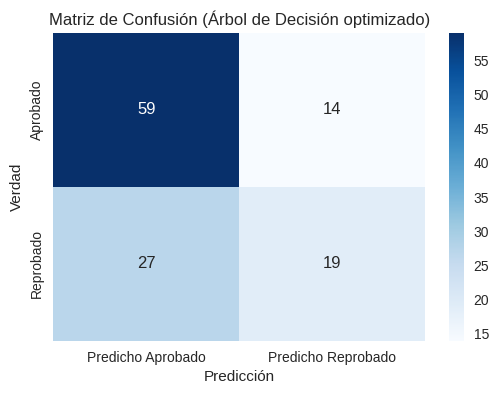


=== Ejemplos en la Matriz de Confusión ===

Verdaderos Negativos (Reprobado-Reprobado): 19
          Real Prediction
2    Reprobado  Reprobado
4    Reprobado  Reprobado
8    Reprobado  Reprobado
30   Reprobado  Reprobado
35   Reprobado  Reprobado
36   Reprobado  Reprobado
40   Reprobado  Reprobado
43   Reprobado  Reprobado
66   Reprobado  Reprobado
76   Reprobado  Reprobado
78   Reprobado  Reprobado
81   Reprobado  Reprobado
83   Reprobado  Reprobado
84   Reprobado  Reprobado
86   Reprobado  Reprobado
89   Reprobado  Reprobado
94   Reprobado  Reprobado
105  Reprobado  Reprobado
107  Reprobado  Reprobado

Falsos Positivos (Reprobado-Aprobado): 27
          Real Prediction
7    Reprobado   Aprobado
11   Reprobado   Aprobado
15   Reprobado   Aprobado
16   Reprobado   Aprobado
19   Reprobado   Aprobado
23   Reprobado   Aprobado
24   Reprobado   Aprobado
34   Reprobado   Aprobado
39   Reprobado   Aprobado
54   Reprobado   Aprobado
57   Reprobado   Aprobado
63   Reprobado   Aprobado
64   Re

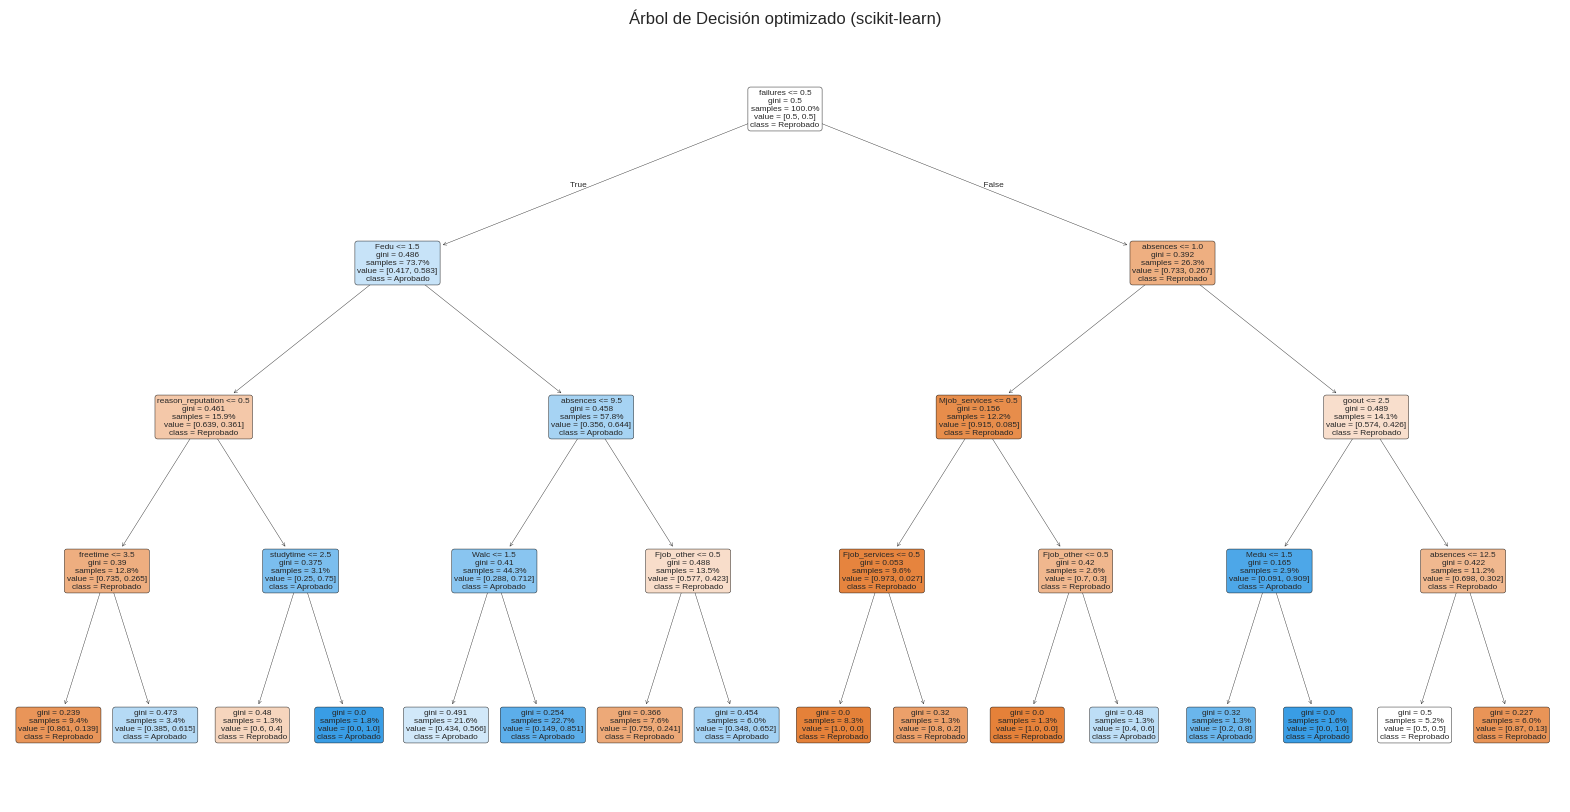

Árbol de decisión visualizado.

=== Importancia de Características ===


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


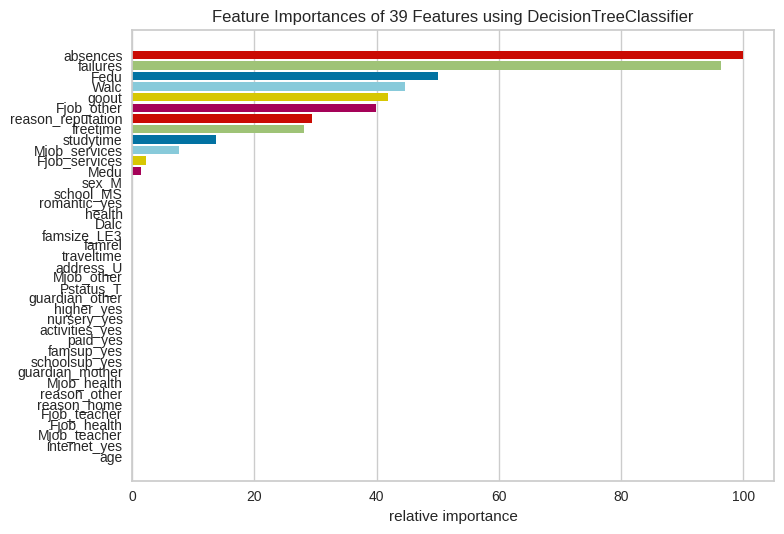

Importancia de características visualizada con Yellowbrick.

=== Extracción de Reglas del Árbol de Decisión ===

=== Valores únicos por característica ===
age                   8
Medu                  5
Fedu                  5
traveltime            4
studytime             4
failures              4
famrel                5
freetime              5
goout                 5
Dalc                  5
Walc                  5
health                5
absences             34
school_MS             2
sex_M                 2
address_U             2
famsize_LE3           2
Pstatus_T             2
Mjob_health           2
Mjob_other            2
Mjob_services         2
Mjob_teacher          2
Fjob_health           2
Fjob_other            2
Fjob_services         2
Fjob_teacher          2
reason_home           2
reason_other          2
reason_reputation     2
guardian_mother       2
guardian_other        2
schoolsup_yes         2
famsup_yes            2
paid_yes              2
activities_yes        2
nurse

Regla  Muestras  Precisión  Parsimonia  Cobertura    Gini  Sparsidad                                                                                                                                                                                                                                                                                                                                                                                                        Índices Muestras
0        si failures ≤ 0.50 y Fedu ≤ 1.50 y reason_reputation ≤ 0.50 y freetime ≤ 3.50 entonces Reprobado        36       0.86           4       0.09  0.2392       0.25                                                                                                                                                                                                                                         [46, 52, 59, 61, 67, 106, 214, 231, 242, 253, 261, 268, 279, 281, 287, 290, 306, 310, 311, 313, 321, 324, 325, 328, 336, 345, 350, 352, 354, 361, 365, 370, 374, 375, 377, 378]
1         si failures ≤ 0.50 y Fedu ≤ 1.50 y reason_reputation ≤ 0.50 y freetime > 3.50 entonces Aprobado        13       0.62           4       0.03  0.4734       0.25                                                                                                                                                                                                                                                                                                                                                            [38, 50, 64, 83, 94, 112, 114, 126, 155, 167, 284, 289, 308]
2       si failures ≤ 0.50 y Fedu ≤ 1.50 y reason_reputation > 0.50 y studytime ≤ 2.50 entonces Reprobado         5       0.60           4       0.01  0.4800       0.25                                                                                                                                                                                                                                                                                                                                                                                                 [76, 93, 164, 204, 355]
3        si failures ≤ 0.50 y Fedu ≤ 1.50 y reason_reputation > 0.50 y studytime > 2.50 entonces Aprobado         7       1.00           4       0.02  0.0000       0.25                                                                                                                                                                                                                                                                                                                                                                                         [20, 47, 62, 82, 136, 177, 254]
4                      si failures ≤ 0.50 y Fedu > 1.50 y absences ≤ 9.50 y Walc ≤ 1.50 entonces Aprobado        83       0.57           4       0.22  0.4912       0.25                        [0, 2, 3, 7, 10, 11, 16, 17, 19, 23, 24, 28, 44, 45, 49, 56, 69, 70, 71, 72, 73, 74, 81, 87, 90, 91, 99, 104, 107, 110, 111, 113, 122, 123, 134, 139, 140, 142, 147, 149, 158, 168, 169, 181, 182, 184, 187, 197, 207, 211, 218, 219, 223, 232, 233, 239, 243, 244, 249, 262, 263, 269, 271, 272, 275, 277, 294, 297, 299, 302, 303, 307, 330, 332, 333, 339, 341, 347, 357, 358, 359, 368, 382]
5                      si failures ≤ 0.50 y Fedu > 1.50 y absences ≤ 9.50 y Walc > 1.50 entonces Aprobado        87       0.85           4       0.23  0.2542       0.25  [4, 5, 6, 12, 13, 18, 26, 27, 29, 30, 32, 35, 37, 39, 40, 51, 54, 55, 58, 65, 68, 80, 85, 92, 95, 98, 100, 101, 105, 108, 109, 118, 120, 121, 128, 130, 131, 135, 138, 152, 156, 157, 162, 165, 166, 170, 171, 172, 173, 185, 188, 191, 193, 195, 198, 199, 200, 201, 202, 203, 205, 213, 216, 220, 221, 224, 225, 228, 229, 230, 234, 235, 236, 237, 238, 240, 245, 246, 264, 265, 267, 270, 274, 286, 296, 298, 380]
6               si failures ≤ 0.50 y Fedu > 1.50 y absences >


Reglas exportadas a 'decision_tree_rules_sklearn.csv'.

=== Parámetros del Modelo scikit-learn ===

Parámetros del Modelo scikit-learn:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 5
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best

=== Métricas de Interpretabilidad ===
    Precision  Parsimony  Coverage      Gini  Sparsity
0    0.861111        0.2  0.002604  0.239198         4
1    0.615385        0.2  0.002604  0.473373         4
2    0.600000        0.2  0.002604  0.480000         4
3    1.000000        0.2  0.002604  0.000000         4
4    0.566265        0.2  0.002604  0.491218         4
5    0.850575        0.2  0.002604  0.254195         4
6    0.758621        0.2  0.002604  0.366231         4
7    0.652174        0.2  0.002604  0.453686         4
8    1.000000        0.2  0.002604  0.000000         4
9    0.800000        

In [14]:
# =====================
# Modelo 1: scikit-learn
# =====================

print("\n=== Entrenamiento del Modelo scikit-learn ===")

# Entrenar el modelo scikit-learn
tree_sklearn = train_sklearn_model(X_train_smote, y_train_smote)

# Evaluar el modelo scikit-learn
y_pred_sklearn = evaluate_sklearn_model(tree_sklearn, X_test, y_test)

# Mapear las etiquetas reales y predichas para la matriz de confusión
y_test_labels_sklearn = y_test.map({1: 'Aprobado', 0: 'Reprobado'})  # Etiquetas reales
y_pred_labels_sklearn = pd.Series(y_pred_sklearn, index=y_test.index).map({1: 'Aprobado', 0: 'Reprobado'})  # Etiquetas predichas

# Mostrar ejemplos en la matriz de confusión
print("\n=== Ejemplos en la Matriz de Confusión ===")
result_df_sklearn = list_confusion_matrix_examples(y_test_labels_sklearn, y_pred_labels_sklearn)
print(result_df_sklearn)

# Visualizar el árbol de decisión entrenado
print("\n=== Visualización del Árbol de Decisión ===")
visualize_sklearn_tree(tree_sklearn, selected_features)

# Visualizar importancia de características usando Yellowbrick
print("\n=== Importancia de Características ===")
visualize_feature_importance(tree_sklearn, X_train_smote, y_train_smote, selected_features)

# Extraer reglas del árbol de decisión con métricas de interpretabilidad
print("\n=== Extracción de Reglas del Árbol de Decisión ===")
rules_df_sklearn = extract_rules(tree_sklearn, X_train_smote, selected_features)

# Mostrar valores únicos por característica después del preprocesamiento
print("\n=== Valores únicos por característica ===")
print(X_train_smote.nunique())

# Mostrar reglas extraídas con métricas de interpretabilidad
print("\n=== Reglas del Árbol de Decisión con Métricas de Interpretabilidad ===")
configure_and_display_df(rules_df_sklearn)

# Exportar las reglas a un archivo CSV
rules_df_sklearn.to_csv('decision_tree_rules_sklearn.csv', index=False, encoding='utf-8-sig')
print("\nReglas exportadas a 'decision_tree_rules_sklearn.csv'.")

# Obtener parámetros del modelo scikit-learn
print("\n=== Parámetros del Modelo scikit-learn ===")
get_model_parameters(tree_sklearn, model_name="Modelo scikit-learn")

# Calcular métricas de interpretabilidad para el modelo scikit-learn
print("\n=== Métricas de Interpretabilidad ===")
tree_metrics, tree_simplicity = calculate_tree_interpretability_metrics(tree_sklearn, X_train_smote, y_train_smote, selected_features)

# Mostrar las métricas calculadas para el modelo scikit-learn
print(tree_metrics)
print("\nMétricas de simplicidad:")
print(tree_simplicity)

# Calcular propiedades del modelo scikit-learn
print("\n=== Propiedades del Modelo scikit-learn ===")
sklearn_properties = calculate_rule_properties(tree_sklearn, X_train_smote, model_type="tree")

# Imprimir los resultados en consola
print(f"Tamaño (size): {sklearn_properties['size']}")
print(f"Longitud promedio (length): {sklearn_properties['avg_length']:.2f}")
print(f"Total cubierto (cover): {sklearn_properties['cover']}")
print(f"Solapamiento (overlap): {sklearn_properties['overlap']}")


### model_2: DT-InterpretML


=== Entrenamiento del Modelo InterpretML ===
Modelo InterpretML entrenado.
Precisión del Árbol de Decisión simplificado (InterpretML): 0.65
Reporte de clasificación (modelo simplificado):
              precision    recall  f1-score   support

   Reprobado       0.54      0.57      0.55        46
    Aprobado       0.72      0.70      0.71        73

    accuracy                           0.65       119
   macro avg       0.63      0.63      0.63       119
weighted avg       0.65      0.65      0.65       119



<ipython-input-6-0f5939d7edca>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: 0 if x == 'False' else (1 if x == 'True' else x))


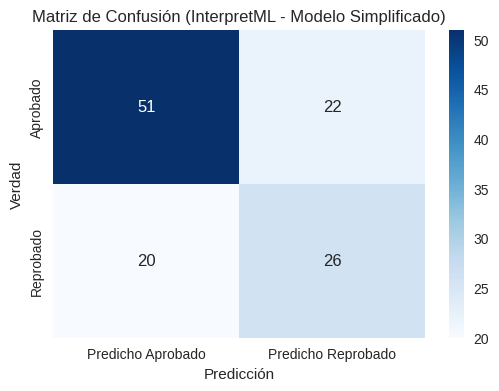


Verdaderos Negativos (Reprobado-Reprobado): 26
          Real Prediction
2    Reprobado  Reprobado
4    Reprobado  Reprobado
7    Reprobado  Reprobado
8    Reprobado  Reprobado
30   Reprobado  Reprobado
35   Reprobado  Reprobado
36   Reprobado  Reprobado
40   Reprobado  Reprobado
43   Reprobado  Reprobado
66   Reprobado  Reprobado
75   Reprobado  Reprobado
78   Reprobado  Reprobado
81   Reprobado  Reprobado
83   Reprobado  Reprobado
84   Reprobado  Reprobado
86   Reprobado  Reprobado
89   Reprobado  Reprobado
94   Reprobado  Reprobado
95   Reprobado  Reprobado
105  Reprobado  Reprobado
107  Reprobado  Reprobado
108  Reprobado  Reprobado
110  Reprobado  Reprobado
111  Reprobado  Reprobado
113  Reprobado  Reprobado
116  Reprobado  Reprobado

Falsos Positivos (Reprobado-Aprobado): 20
          Real Prediction
11   Reprobado   Aprobado
15   Reprobado   Aprobado
16   Reprobado   Aprobado
19   Reprobado   Aprobado
23   Reprobado   Aprobado
24   Reprobado   Aprobado
34   Reprobado   Aprobado

Explicación global del modelo mostrada.


Explicación local del modelo mostrada.


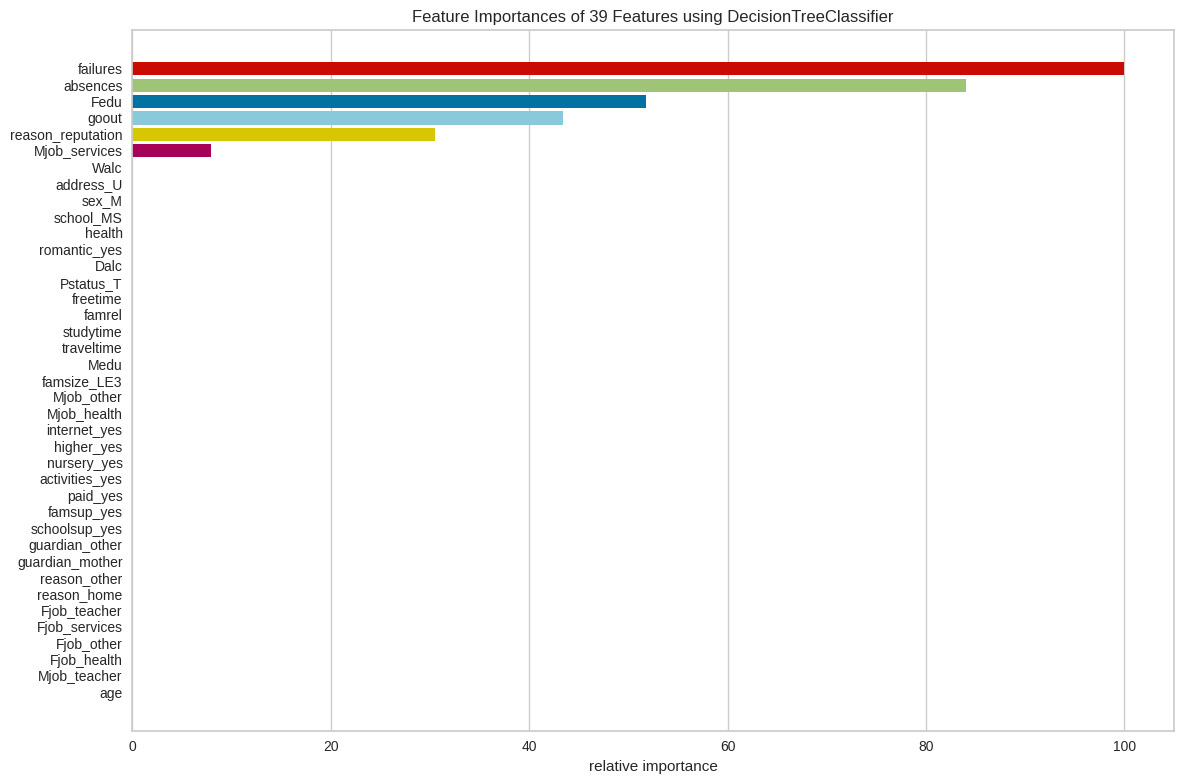

Importancia de características visualizada con Yellowbrick para InterpretML.
F1-score para la clase 'Reprobado': 0.55

=== Visualización del Árbol de Decisión subyacente (InterpretML - scikit-learn) ===


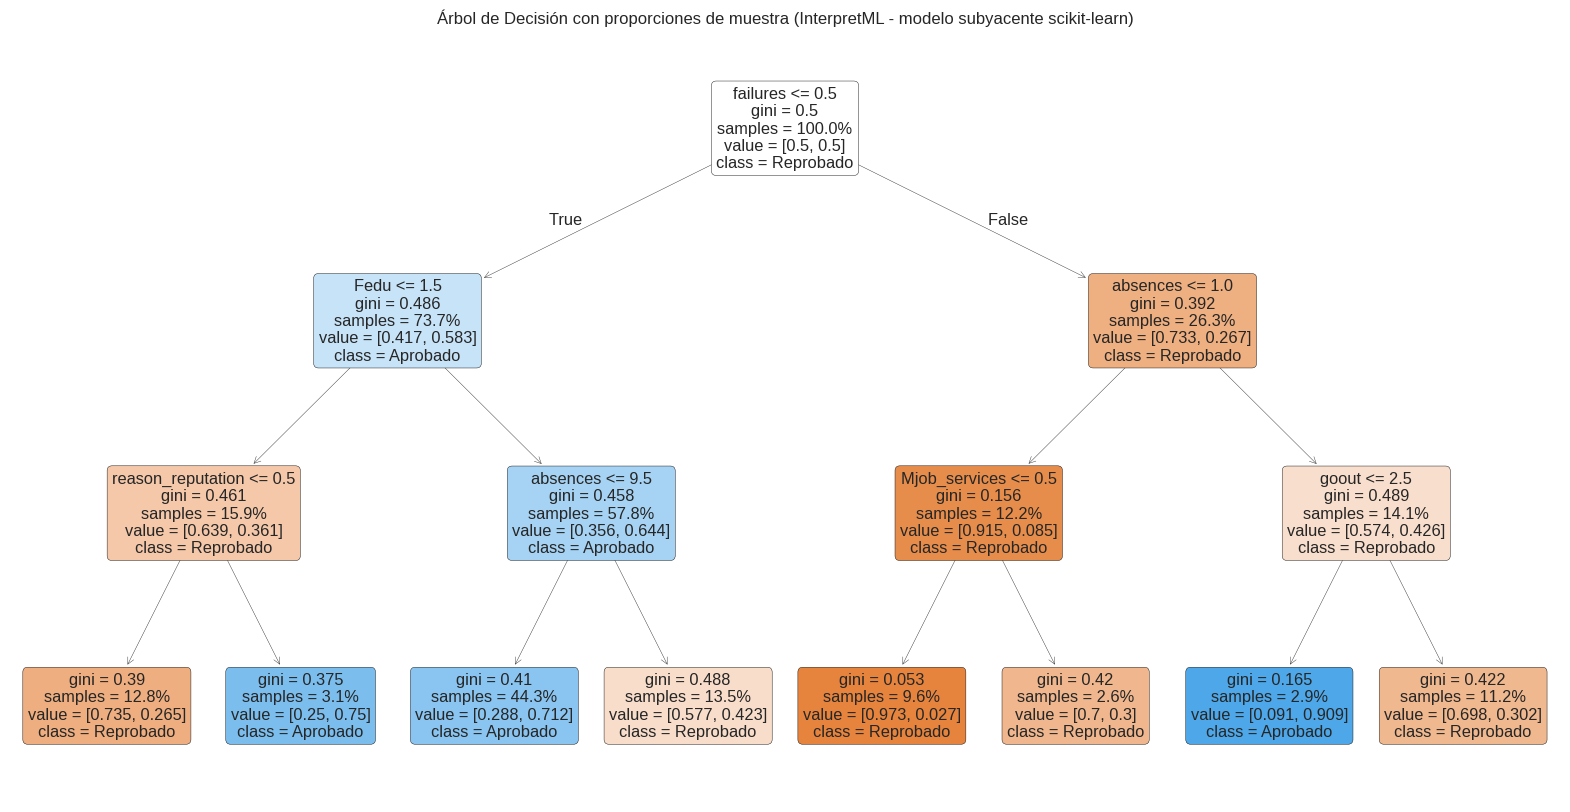


=== Información de cada nodo en el Árbol de Decisión subyacente ===
Nodo 0:
  Muestras: 384
  Impureza: 0.5000
  Índice de clase dominante: 0

Nodo 1:
  Muestras: 283
  Impureza: 0.4862
  Índice de clase dominante: 1

Nodo 2:
  Muestras: 61
  Impureza: 0.4612
  Índice de clase dominante: 0

Nodo 3:
  Muestras: 49
  Impureza: 0.3898
  Índice de clase dominante: 0

Nodo 4:
  Muestras: 12
  Impureza: 0.3750
  Índice de clase dominante: 1

Nodo 5:
  Muestras: 222
  Impureza: 0.4584
  Índice de clase dominante: 1

Nodo 6:
  Muestras: 170
  Impureza: 0.4103
  Índice de clase dominante: 1

Nodo 7:
  Muestras: 52
  Impureza: 0.4882
  Índice de clase dominante: 0

Nodo 8:
  Muestras: 101
  Impureza: 0.3917
  Índice de clase dominante: 0

Nodo 9:
  Muestras: 47
  Impureza: 0.1557
  Índice de clase dominante: 0

Nodo 10:
  Muestras: 37
  Impureza: 0.0526
  Índice de clase dominante: 0

Nodo 11:
  Muestras: 10
  Impureza: 0.4200
  Índice de clase dominante: 0

Nodo 12:
  Muestras: 54
  Impureza: 

Regla  Muestras  Precisión  Parsimonia  Cobertura    Gini  Sparsidad                                                                                                                                                                                                                                                                                                                                                                                                                                               Índices Muestras
0  si failures ≤ 0.50 y Fedu ≤ 1.50 y reason_reputation ≤ 0.50 entonces Reprobado        49       0.73           3       0.13  0.3898       0.33                                                                                                                                                                                                                    [38, 46, 50, 52, 59, 61, 64, 67, 83, 94, 106, 112, 114, 126, 155, 167, 214, 231, 242, 253, 261, 268, 279, 281, 284, 287, 289, 290, 306, 308, 310, 311, 313, 321, 324, 325, 328, 336, 345, 350, 352, 354, 361, 365, 370, 374, 375, 377, 378]
1   si failures ≤ 0.50 y Fedu ≤ 1.50 y reason_reputation > 0.50 entonces Aprobado        12       0.75           3       0.03  0.3750       0.33                                                                                                                                                                                                                                                                                                                                                                                                         [20, 47, 62, 76, 82, 93, 136, 164, 177, 204, 254, 355]
2            si failures ≤ 0.50 y Fedu > 1.50 y absences ≤ 9.50 entonces Aprobado       170       0.71           3       0.44  0.4103       0.33  [0, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 18, 19, 23, 24, 26, 27, 28, 29, 30, 32, 35, 37, 39, 40, 44, 45, 49, 51, 54, 55, 56, 58, 65, 68, 69, 70, 71, 72, 73, 74, 80, 81, 85, 87, 90, 91, 92, 95, 98, 99, 100, 101, 104, 105, 107, 108, 109, 110, 111, 113, 118, 120, 121, 122, 123, 128, 130, 131, 134, 135, 138, 139, 140, 142, 147, 149, 152, 156, 157, 158, 162, 165, 166, 168, 169, 170, 171, 172, 173, 181, 182, 184, 185, 187, 188, 191, 193, ...]
3           si failures ≤ 0.50 y Fedu > 1.50 y absences > 9.50 entonces Reprobado        52       0.58           3       0.14  0.4882       0.33                                                                                                                                                                                                         [33, 34, 36, 41, 42, 43, 48, 53, 60, 63, 75, 84, 88, 89, 117, 119, 125, 127, 144, 148, 151, 160, 161, 175, 176, 179, 186, 196, 209, 212, 247, 252, 256, 266, 280, 288, 292, 309, 315, 317, 318, 319, 320, 329, 331, 334, 337, 344, 349, 356, 372, 379]
4  si failures > 0.50 y absences ≤ 1.00 y Mjob_services ≤ 0.50 entonces Reprobado        37       0.97           3       0.10  0.0526       0.33                                                                                                                                                                                                                                                                             [8, 14, 31, 57, 66, 96, 141, 145, 178, 194, 251, 255, 257, 276, 278, 282, 283, 285, 293, 295, 304, 312, 314, 316, 323, 327, 338, 340, 342, 346, 348, 351, 362, 363, 367, 371, 381]
5  si failures > 0.50 y absences ≤ 1.00 y Mjob_services > 0.50 entonces Reprobado        10       0.70           3       0.03  0.4200       0.33                                                                                                                                                                                                                                                                                                                                                                                            

Reglas exportadas a 'decision_tree_rules_interpretml.csv'.

=== Propiedades del Modelo InterpretML ===
Tamaño (size): 8
Longitud promedio (length): 3.00
Total cubierto (cover): 384
Solapamiento (overlap): 0


In [15]:
# =====================
# Modelo 2: InterpretML
# =====================

# Entrenamiento del modelo InterpretML
print("\n=== Entrenamiento del Modelo InterpretML ===")
interpretml_tree = train_interpretml_model(X_train_smote, y_train_smote)  # Usar la función correcta para entrenar

# Evaluar el modelo InterpretML
y_pred_interpretml = evaluate_interpretml_model(interpretml_tree, X_test, y_test)  # Usar la función específica de evaluación para InterpretML

# Mapear las etiquetas reales y predichas para la matriz de confusión
y_test_labels_interpretml = y_test.map({1: 'Aprobado', 0: 'Reprobado'})  # Etiquetas reales
y_pred_labels_interpretml = pd.Series(y_pred_interpretml, index=y_test.index).map({1: 'Aprobado', 0: 'Reprobado'})  # Etiquetas predichas

# Mostrar ejemplos en la matriz de confusión
result_df_interpretml = list_confusion_matrix_examples(y_test_labels_interpretml, y_pred_labels_interpretml)

# Visualizar explicaciones globales y locales del modelo InterpretML
visualize_interpretml_tree(interpretml_tree, selected_features)  # Se pasan solo dos parámetros

# Visualizar importancia de características con Yellowbrick para InterpretML
visualize_feature_importance_interpretml(interpretml_tree, X_train_smote, y_train_smote, selected_features)

# Evaluar el F1-score para la clase minoritaria (Reprobado)
evaluate_f1_score(y_test, y_pred_interpretml, pos_label=0)

# Obtener el modelo subyacente de scikit-learn del modelo InterpretML
sk_tree_model_interpretml = interpretml_tree._model()  # Acceder al modelo subyacente

# Visualizar el árbol subyacente del modelo de scikit-learn en InterpretML
print("\n=== Visualización del Árbol de Decisión subyacente (InterpretML - scikit-learn) ===")
plt.figure(figsize=(20,10))
plot_tree(
    sk_tree_model_interpretml,
    feature_names=selected_features,
    class_names=["Reprobado", "Aprobado"],
    filled=True,
    rounded=True,
    proportion=True
)
plt.title("Árbol de Decisión con proporciones de muestra (InterpretML - modelo subyacente scikit-learn)")
plt.show()

# Obtener la información de cada nodo en el árbol subyacente
print("\n=== Información de cada nodo en el Árbol de Decisión subyacente ===")
for node in range(sk_tree_model_interpretml.tree_.node_count):
    print(f"Nodo {node}:")
    print(f"  Muestras: {sk_tree_model_interpretml.tree_.n_node_samples[node]}")
    print(f"  Impureza: {sk_tree_model_interpretml.tree_.impurity[node]:.4f}")
    print(f"  Índice de clase dominante: {sk_tree_model_interpretml.tree_.value[node].argmax()}")
    print()

# Obtener los parámetros del modelo InterpretML subyacente (scikit-learn)
get_model_parameters(sk_tree_model_interpretml, model_name="Modelo InterpretML (subyacente scikit-learn)")

# Mostrar valores únicos por cada característica en el conjunto de entrenamiento
print("\nValores únicos por cada columna en X_train_smote:")
print(X_train_smote.nunique())

# Extraer reglas y métricas del modelo subyacente (scikit-learn) de InterpretML
rules_df_interpretml = extract_rules(sk_tree_model_interpretml, X_train_smote, selected_features, ["Reprobado", "Aprobado"])

# Mostrar y exportar las reglas
configure_and_display_df(rules_df_interpretml)
rules_df_interpretml.to_csv('decision_tree_rules_interpretml.csv', index=False, encoding='utf-8-sig')
print("Reglas exportadas a 'decision_tree_rules_interpretml.csv'.")

# Calcular propiedades del modelo subyacente en InterpretML
interpretml_properties = calculate_rule_properties(sk_tree_model_interpretml, X_train_smote, model_type="tree")

# Imprimir los resultados en consola
print("\n=== Propiedades del Modelo InterpretML ===")
print(f"Tamaño (size): {interpretml_properties['size']}")
print(f"Longitud promedio (length): {interpretml_properties['avg_length']:.2f}")
print(f"Total cubierto (cover): {interpretml_properties['cover']}")
print(f"Solapamiento (overlap): {interpretml_properties['overlap']}")


## Modelos Finales

### Selección de Características

In [16]:
# Paso 1: Definir las características seleccionadas
selected_features = ['absences', 'goout', 'studytime', 'reason_reputation', 'failures', 'Fedu']

# Paso 2: Llamar a la función para procesar los datos y aplicar SMOTE
X_train_smote, X_test, y_train_smote, y_test, selected_features, boolean_cols = preprocess_data(
    selected_features=selected_features, apply_smote=True
)

# Verificar el contenido de las variables retornadas
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train_smote distribution:\n{y_train_smote.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")
print(f"Selected features: {selected_features}")
print("Valores únicos por columna en X_train_smote:\n")
print(X_train_smote.nunique())
print("Valores únicos por columna en X_test:\n")
print(X_test.nunique())

# Imprimir los valores únicos de la columna reason_reputation
if 'reason_reputation' in X_train_smote.columns:
    print("\nValores únicos en la columna 'reason_reputation':")
    print(X_train_smote['reason_reputation'].unique())
else:
    print("La columna 'reason_reputation' no se encuentra en X_train_smote.")

# Reconstruir las columnas booleanas en X_test
print("\nReconstruyendo columnas booleanas en X_test (si existen):")
for col in boolean_cols:
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(int)
        print(f"- Columna '{col}' convertida a entero.")
    else:
        print(f"- Columna '{col}' no encontrada en X_test.")



Datos cargados correctamente.
Variable objetivo 'G3' convertida a binaria.
Variables categóricas convertidas a dummies.
Características seleccionadas: ['absences', 'goout', 'studytime', 'reason_reputation', 'failures', 'Fedu']
Columnas booleanas identificadas: ['reason_reputation']
Columnas booleanas convertidas a enteros: ['reason_reputation']
Conversión de todas las columnas a numéricas completada.
Datos divididos en entrenamiento (70%) y prueba (30%).
SMOTE aplicado al conjunto de entrenamiento para balancear las clases.
Columnas booleanas reconvertidas a 0 y 1 después de SMOTE.
X_train_smote shape: (384, 6)
X_test shape: (119, 6)
y_train_smote distribution:
G3
1    192
0    192
Name: count, dtype: int64
y_test distribution:
G3
1    73
0    46
Name: count, dtype: int64
Selected features: ['absences', 'goout', 'studytime', 'reason_reputation', 'failures', 'Fedu']
Valores únicos por columna en X_train_smote:

absences             34
goout                 5
studytime             4
reas

### Configuración de features para pruebas

In [17]:
# Definir un diccionario con los valores de las características para evaluar modelos
test_features = {
    'absences': 3,
    'goout': 2,
    'studytime': 3,
    'reason_reputation': 1,
    'failures': 2,
    'Fedu': 3
    #'health': 4,
    #'higher_yes': 1  # Nota: 'higher_yes' después del One-Hot Encoding
}

# Convertir el diccionario a un DataFrame de una sola fila
test_df = pd.DataFrame([test_features])

# Asegurarse de que las columnas del DataFrame coincidan con las características seleccionadas
test_df = test_df[selected_features]

### DT scikit-learn: tree_sklearn


=== Entrenamiento del Modelo scikit-learn ===
Modelo scikit-learn entrenado.
Precisión del Árbol de Decisión optimizado: 0.66
Reporte de clasificación (modelo optimizado):
              precision    recall  f1-score   support

   Reprobado       0.58      0.48      0.52        46
    Aprobado       0.70      0.78      0.74        73

    accuracy                           0.66       119
   macro avg       0.64      0.63      0.63       119
weighted avg       0.66      0.66      0.66       119



<ipython-input-5-d1ddcac0bc56>:12: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



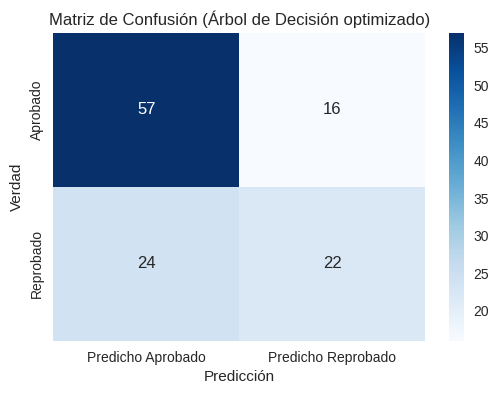


Verdaderos Negativos (Reprobado-Reprobado): 22
          Real Prediction
2    Reprobado  Reprobado
4    Reprobado  Reprobado
8    Reprobado  Reprobado
30   Reprobado  Reprobado
35   Reprobado  Reprobado
36   Reprobado  Reprobado
40   Reprobado  Reprobado
43   Reprobado  Reprobado
66   Reprobado  Reprobado
78   Reprobado  Reprobado
81   Reprobado  Reprobado
84   Reprobado  Reprobado
86   Reprobado  Reprobado
89   Reprobado  Reprobado
94   Reprobado  Reprobado
105  Reprobado  Reprobado
107  Reprobado  Reprobado
108  Reprobado  Reprobado
110  Reprobado  Reprobado
111  Reprobado  Reprobado
113  Reprobado  Reprobado
116  Reprobado  Reprobado

Falsos Positivos (Reprobado-Aprobado): 24
          Real Prediction
7    Reprobado   Aprobado
11   Reprobado   Aprobado
15   Reprobado   Aprobado
16   Reprobado   Aprobado
19   Reprobado   Aprobado
23   Reprobado   Aprobado
24   Reprobado   Aprobado
34   Reprobado   Aprobado
39   Reprobado   Aprobado
54   Reprobado   Aprobado
57   Reprobado   Aprobado

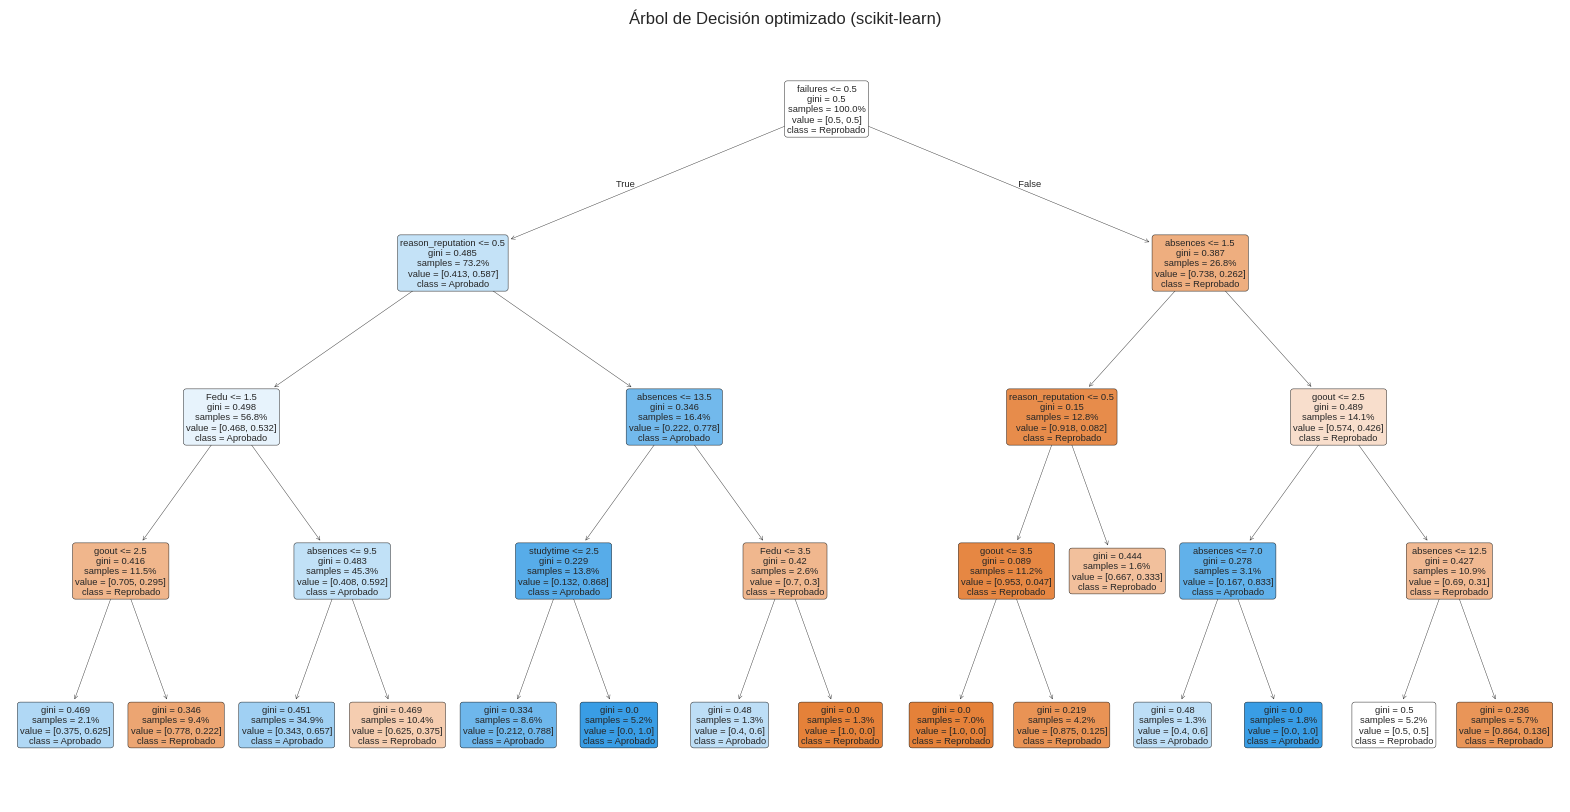

Árbol de decisión visualizado.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



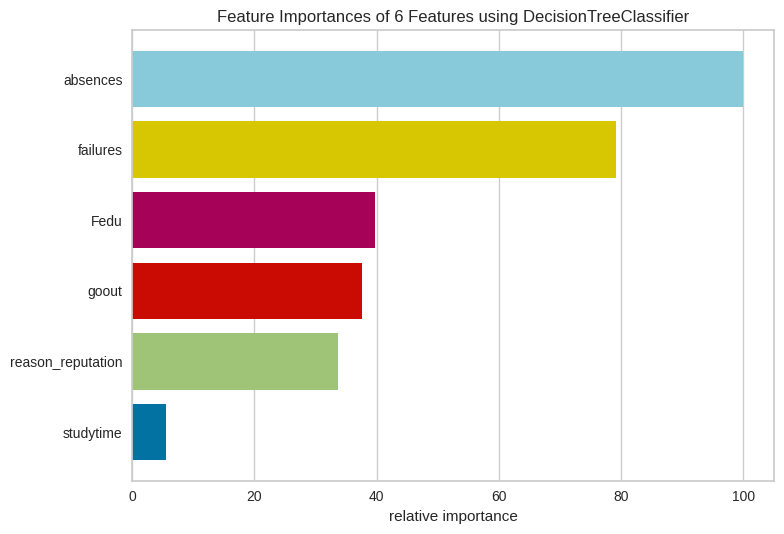

Importancia de características visualizada con Yellowbrick.

Valores únicos por característica:
 absences             34
goout                 5
studytime             4
reason_reputation     2
failures              4
Fedu                  5
dtype: int64

Reglas del Árbol de Decisión (scikit-learn) con Métricas de Interpretabilidad:



Regla  Muestras  Precisión  Parsimonia  Cobertura    Gini  Sparsidad                                                                                                                                                                                                                                                                                                                                                                                                                                                               Índices Muestras
0            si failures ≤ 0.50 y reason_reputation ≤ 0.50 y Fedu ≤ 1.50 y goout ≤ 2.50 entonces Aprobado         8       0.62           4       0.02  0.4688       0.25                                                                                                                                                                                                                                                                                                                                                                                                                                        [61, 106, 112, 114, 155, 261, 304, 325]
1           si failures ≤ 0.50 y reason_reputation ≤ 0.50 y Fedu ≤ 1.50 y goout > 2.50 entonces Reprobado        36       0.78           4       0.09  0.3457       0.25                                                                                                                                                                                                                                                                                                    [38, 46, 50, 52, 59, 64, 67, 83, 94, 126, 167, 214, 231, 242, 253, 268, 281, 284, 289, 294, 311, 313, 316, 321, 324, 328, 332, 336, 350, 352, 354, 365, 369, 370, 377, 378]
2         si failures ≤ 0.50 y reason_reputation ≤ 0.50 y Fedu > 1.50 y absences ≤ 9.50 entonces Aprobado       134       0.66           4       0.35  0.4509       0.25  [2, 3, 4, 6, 7, 10, 11, 16, 17, 18, 19, 23, 24, 26, 27, 28, 29, 35, 37, 39, 40, 44, 45, 51, 58, 65, 68, 69, 70, 71, 72, 80, 81, 87, 90, 91, 92, 98, 99, 101, 105, 107, 108, 109, 111, 113, 118, 120, 122, 123, 128, 130, 131, 134, 135, 138, 139, 140, 142, 147, 152, 156, 157, 162, 169, 171, 172, 173, 182, 184, 187, 191, 193, 195, 198, 199, 201, 202, 207, 211, 213, 216, 218, 219, 221, 223, 224, 225, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 240, 244, ...]
3        si failures ≤ 0.50 y reason_reputation ≤ 0.50 y Fedu > 1.50 y absences > 9.50 entonces Reprobado        40       0.62           4       0.10  0.4688       0.25                                                                                                                                                                                                                                                                                [33, 34, 36, 41, 48, 60, 63, 84, 89, 117, 119, 125, 148, 151, 160, 161, 176, 179, 186, 196, 209, 252, 266, 288, 308, 309, 310, 315, 319, 329, 331, 334, 337, 344, 349, 356, 366, 372, 379, 383]
4   si failures ≤ 0.50 y reason_reputation > 0.50 y absences ≤ 13.50 y studytime ≤ 2.50 entonces Aprobado        33       0.79           4       0.09  0.3343       0.25                                                                                                                                                                                                                                                                                                                         [0, 5, 12, 13, 32, 49, 54, 55, 73, 76, 85, 88, 95, 100, 121, 144, 164, 165, 166, 170, 181, 185, 188, 197, 200, 204, 205, 220, 239, 243, 256, 269, 270]
5   si failures ≤ 0.50 y reason_reputation > 0.50 y absences ≤ 13.50 y studytime > 2.50 entonces Aprobado        20       1.00           4       0.05  0.0000       0.25                                                                                                                                            


Reglas exportadas a 'decision_tree_rules_sklearn.csv'.

Parámetros del Modelo scikit-learn:
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 5
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 42
splitter: best

=== Métricas de Interpretabilidad para el modelo scikit-learn ===
    Precision  Parsimony  Coverage      Gini  Sparsity
0    0.625000       0.20  0.002604  0.468750         4
1    0.777778       0.20  0.002604  0.345679         4
2    0.656716       0.20  0.002604  0.450880         4
3    0.625000       0.20  0.002604  0.468750         4
4    0.787879       0.20  0.002604  0.334252         4
5    1.000000       0.20  0.002604  0.000000         4
6    0.600000       0.20  0.002604  0.480000         4
7    1.000000       0.20  0.002604  0.000000         4
8    1.000000       0.20  0.002604  0.000000         4
9    0.875000       0.20  0.002604  0

In [18]:
# =====================
# Modelo 1: scikit-learn
# =====================

# Entrenar el modelo scikit-learn
print("\n=== Entrenamiento del Modelo scikit-learn ===")
tree_sklearn = train_sklearn_model(X_train_smote, y_train_smote)

# Evaluar el modelo scikit-learn
y_pred_sklearn = evaluate_sklearn_model(tree_sklearn, X_test, y_test)

# Mapear las etiquetas reales y predichas para la matriz de confusión
y_test_labels_sklearn = y_test.map({1: 'Aprobado', 0: 'Reprobado'})  # Etiquetas reales
y_pred_labels_sklearn = pd.Series(y_pred_sklearn, index=y_test.index).map({1: 'Aprobado', 0: 'Reprobado'})  # Etiquetas predichas

# Mostrar ejemplos en la matriz de confusión
result_df_sklearn = list_confusion_matrix_examples(y_test_labels_sklearn, y_pred_labels_sklearn)

# Visualizar el árbol de decisión entrenado
visualize_sklearn_tree(tree_sklearn, selected_features)

# Visualizar importancia de características usando Yellowbrick
visualize_feature_importance(tree_sklearn, X_train_smote, y_train_smote, selected_features)

# Extraer reglas del árbol de decisión con métricas de interpretabilidad
rules_df_sklearn = extract_rules(tree_sklearn, X_train_smote, selected_features)

# Mostrar valores únicos por característica después del preprocesamiento
print("\nValores únicos por característica:\n", X_train_smote.nunique())

# Mostrar reglas extraídas con métricas de interpretabilidad
print("\nReglas del Árbol de Decisión (scikit-learn) con Métricas de Interpretabilidad:\n")
configure_and_display_df(rules_df_sklearn)

# Exportar las reglas a un archivo CSV
rules_df_sklearn.to_csv('decision_tree_rules_sklearn.csv', index=False, encoding='utf-8-sig')
print("\nReglas exportadas a 'decision_tree_rules_sklearn.csv'.")

# Obtener parámetros del modelo scikit-learn
get_model_parameters(tree_sklearn, model_name="Modelo scikit-learn")

# Calcular métricas de interpretabilidad para el modelo scikit-learn (tree_sklearn)
tree_metrics, tree_simplicity = calculate_tree_interpretability_metrics(tree_sklearn, X_train_smote, y_train_smote, selected_features)

# Mostrar las métricas calculadas para el modelo scikit-learn
print("\n=== Métricas de Interpretabilidad para el modelo scikit-learn ===")
print(tree_metrics)
print("\nMétricas de simplicidad:", tree_simplicity)

# Calcular propiedades del modelo scikit-learn
sklearn_properties = calculate_rule_properties(tree_sklearn, X_train_smote, model_type="tree")

# Imprimir los resultados en consola
print("\n=== Propiedades del Modelo scikit-learn ===")
print(f"Tamaño (size): {sklearn_properties['size']}")
print(f"Longitud promedio (length): {sklearn_properties['avg_length']:.2f}")
print(f"Total cubierto (cover): {sklearn_properties['cover']}")
print(f"Solapamiento (overlap): {sklearn_properties['overlap']}")


### DT InterpretML: interpretml_tree


=== Entrenamiento del Modelo InterpretML ===
Modelo InterpretML entrenado.
Precisión del Árbol de Decisión simplificado (InterpretML): 0.66
Reporte de clasificación (modelo simplificado):
              precision    recall  f1-score   support

   Reprobado       0.58      0.46      0.51        46
    Aprobado       0.70      0.79      0.74        73

    accuracy                           0.66       119
   macro avg       0.64      0.63      0.63       119
weighted avg       0.65      0.66      0.65       119



<ipython-input-6-0f5939d7edca>:12: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



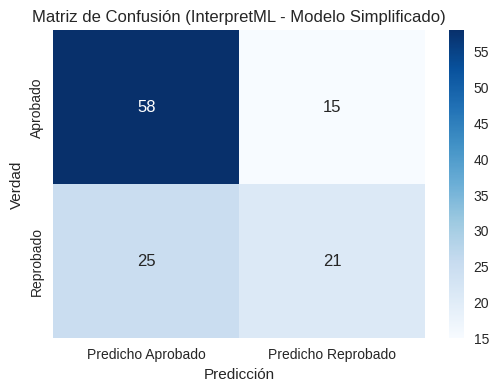


Verdaderos Negativos (Reprobado-Reprobado): 21
          Real Prediction
2    Reprobado  Reprobado
4    Reprobado  Reprobado
7    Reprobado  Reprobado
8    Reprobado  Reprobado
30   Reprobado  Reprobado
35   Reprobado  Reprobado
36   Reprobado  Reprobado
40   Reprobado  Reprobado
43   Reprobado  Reprobado
66   Reprobado  Reprobado
78   Reprobado  Reprobado
81   Reprobado  Reprobado
83   Reprobado  Reprobado
84   Reprobado  Reprobado
86   Reprobado  Reprobado
89   Reprobado  Reprobado
94   Reprobado  Reprobado
105  Reprobado  Reprobado
107  Reprobado  Reprobado
110  Reprobado  Reprobado
116  Reprobado  Reprobado

Falsos Positivos (Reprobado-Aprobado): 25
          Real Prediction
11   Reprobado   Aprobado
15   Reprobado   Aprobado
16   Reprobado   Aprobado
19   Reprobado   Aprobado
23   Reprobado   Aprobado
24   Reprobado   Aprobado
34   Reprobado   Aprobado
39   Reprobado   Aprobado
54   Reprobado   Aprobado
57   Reprobado   Aprobado
63   Reprobado   Aprobado
64   Reprobado   Aprobado

Explicación global del modelo mostrada.


Explicación local del modelo mostrada.


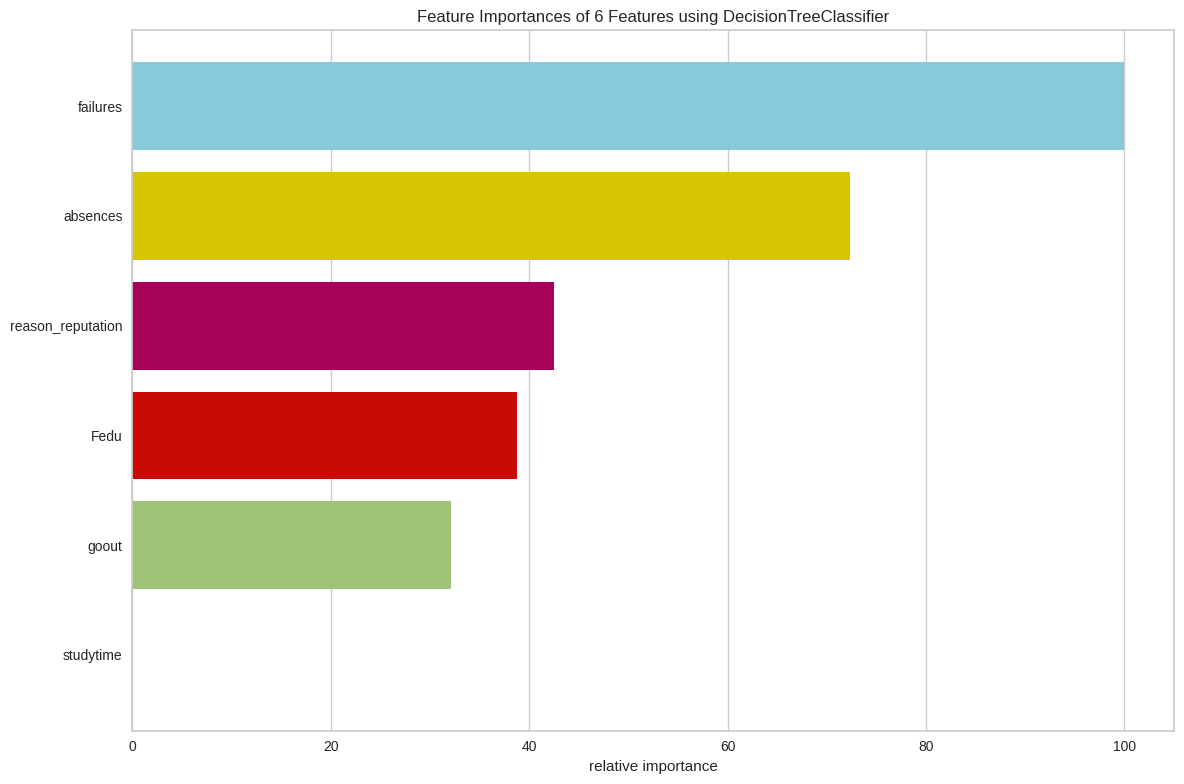

Importancia de características visualizada con Yellowbrick para InterpretML.
F1-score para la clase 'Reprobado': 0.51

=== Visualización del Árbol de Decisión subyacente (InterpretML - scikit-learn) ===


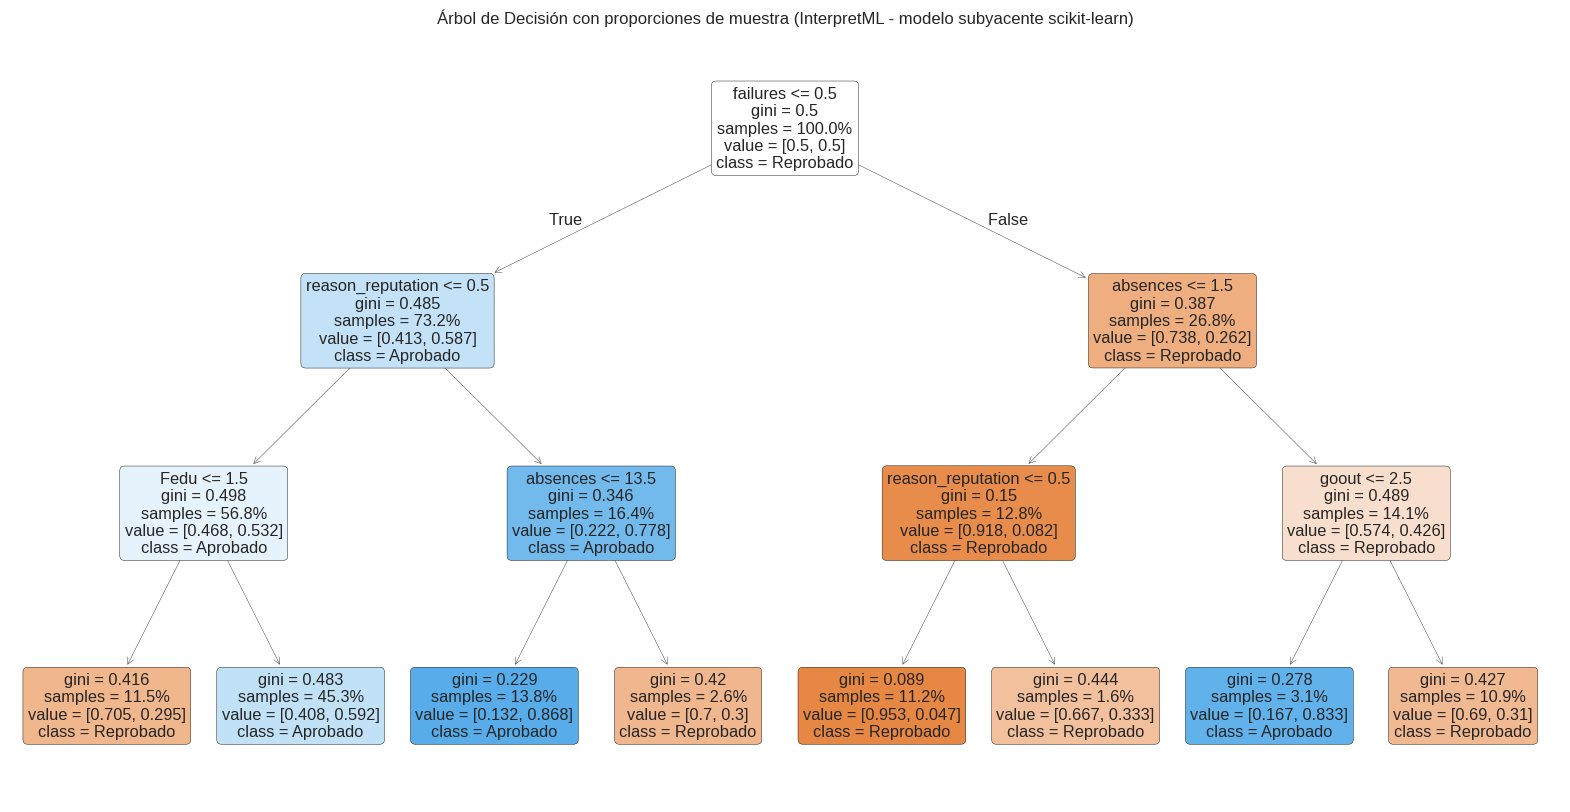


=== Información de cada nodo en el Árbol de Decisión subyacente ===
Nodo 0:
  Muestras: 384
  Impureza: 0.5000
  Índice de clase dominante: 0

Nodo 1:
  Muestras: 281
  Impureza: 0.4848
  Índice de clase dominante: 1

Nodo 2:
  Muestras: 218
  Impureza: 0.4979
  Índice de clase dominante: 1

Nodo 3:
  Muestras: 44
  Impureza: 0.4163
  Índice de clase dominante: 0

Nodo 4:
  Muestras: 174
  Impureza: 0.4831
  Índice de clase dominante: 1

Nodo 5:
  Muestras: 63
  Impureza: 0.3457
  Índice de clase dominante: 1

Nodo 6:
  Muestras: 53
  Impureza: 0.2293
  Índice de clase dominante: 1

Nodo 7:
  Muestras: 10
  Impureza: 0.4200
  Índice de clase dominante: 0

Nodo 8:
  Muestras: 103
  Impureza: 0.3868
  Índice de clase dominante: 0

Nodo 9:
  Muestras: 49
  Impureza: 0.1499
  Índice de clase dominante: 0

Nodo 10:
  Muestras: 43
  Impureza: 0.0887
  Índice de clase dominante: 0

Nodo 11:
  Muestras: 6
  Impureza: 0.4444
  Índice de clase dominante: 0

Nodo 12:
  Muestras: 54
  Impureza: 0

Regla  Muestras  Precisión  Parsimonia  Cobertura    Gini  Sparsidad                                                                                                                                                                                                                                                                                                                                                                                                                                                      Índices Muestras
0       si failures ≤ 0.50 y reason_reputation ≤ 0.50 y Fedu ≤ 1.50 entonces Reprobado        44       0.70           3       0.11  0.4163       0.33                                                                                                                                                                                                                                                    [38, 46, 50, 52, 59, 61, 64, 67, 83, 94, 106, 112, 114, 126, 155, 167, 214, 231, 242, 253, 261, 268, 281, 284, 289, 294, 304, 311, 313, 316, 321, 324, 325, 328, 332, 336, 350, 352, 354, 365, 369, 370, 377, 378]
1        si failures ≤ 0.50 y reason_reputation ≤ 0.50 y Fedu > 1.50 entonces Aprobado       174       0.59           3       0.45  0.4831       0.33  [2, 3, 4, 6, 7, 10, 11, 16, 17, 18, 19, 23, 24, 26, 27, 28, 29, 33, 34, 35, 36, 37, 39, 40, 41, 44, 45, 48, 51, 58, 60, 63, 65, 68, 69, 70, 71, 72, 80, 81, 84, 87, 89, 90, 91, 92, 98, 99, 101, 105, 107, 108, 109, 111, 113, 117, 118, 119, 120, 122, 123, 125, 128, 130, 131, 134, 135, 138, 139, 140, 142, 147, 148, 151, 152, 156, 157, 160, 161, 162, 169, 171, 172, 173, 176, 179, 182, 184, 186, 187, 191, 193, 195, 196, 198, 199, 201, 202, 207, 209, ...]
2   si failures ≤ 0.50 y reason_reputation > 0.50 y absences ≤ 13.50 entonces Aprobado        53       0.87           3       0.14  0.2293       0.33                                                                                                                                                                                                                   [0, 5, 12, 13, 20, 30, 32, 47, 49, 54, 55, 56, 62, 73, 74, 76, 82, 85, 88, 95, 100, 104, 110, 121, 136, 144, 149, 158, 164, 165, 166, 168, 170, 177, 181, 185, 188, 197, 200, 203, 204, 205, 212, 220, 239, 243, 247, 254, 256, 264, 269, 270, 274]
3  si failures ≤ 0.50 y reason_reputation > 0.50 y absences > 13.50 entonces Reprobado        10       0.70           3       0.03  0.4200       0.33                                                                                                                                                                                                                                                                                                                                                                                                                         [42, 43, 53, 75, 93, 127, 175, 280, 292, 320]
4   si failures > 0.50 y absences ≤ 1.50 y reason_reputation ≤ 0.50 entonces Reprobado        43       0.95           3       0.11  0.0887       0.33                                                                                                                                                                                                                                                      [9, 14, 31, 57, 66, 96, 102, 124, 141, 178, 180, 194, 251, 255, 258, 259, 276, 278, 282, 283, 285, 293, 299, 302, 312, 314, 323, 326, 327, 330, 335, 338, 340, 342, 346, 348, 355, 357, 362, 363, 367, 371, 381]
5   si failures > 0.50 y absences ≤ 1.50 y reason_reputation > 0.50 entonces Reprobado         6       0.67           3       0.02  0.4444       0.33                                                                                                                                                                                                                                                                                                                    

Reglas exportadas a 'decision_tree_rules_interpretml.csv'.

=== Propiedades del Modelo InterpretML ===
Tamaño (size): 8
Longitud promedio (length): 3.00
Total cubierto (cover): 384
Solapamiento (overlap): 0


In [19]:
# =====================
# Modelo 2: InterpretML
# =====================

# Entrenamiento del modelo InterpretML
print("\n=== Entrenamiento del Modelo InterpretML ===")
interpretml_tree = train_interpretml_model(X_train_smote, y_train_smote)  # Usar la función correcta para entrenar

# Evaluar el modelo InterpretML
y_pred_interpretml = evaluate_interpretml_model(interpretml_tree, X_test, y_test)  # Usar la función específica de evaluación para InterpretML

# Mapear las etiquetas reales y predichas para la matriz de confusión
y_test_labels_interpretml = y_test.map({1: 'Aprobado', 0: 'Reprobado'})  # Etiquetas reales
y_pred_labels_interpretml = pd.Series(y_pred_interpretml, index=y_test.index).map({1: 'Aprobado', 0: 'Reprobado'})  # Etiquetas predichas

# Mostrar ejemplos en la matriz de confusión
result_df_interpretml = list_confusion_matrix_examples(y_test_labels_interpretml, y_pred_labels_interpretml)

# Visualizar explicaciones globales y locales del modelo InterpretML
visualize_interpretml_tree(interpretml_tree, selected_features)  # Se pasan solo dos parámetros

# Visualizar importancia de características con Yellowbrick para InterpretML
visualize_feature_importance_interpretml(interpretml_tree, X_train_smote, y_train_smote, selected_features)

# Evaluar el F1-score para la clase minoritaria (Reprobado)
evaluate_f1_score(y_test, y_pred_interpretml, pos_label=0)

# Obtener el modelo subyacente de scikit-learn del modelo InterpretML
sk_tree_model_interpretml = interpretml_tree._model()  # Acceder al modelo subyacente

# Visualizar el árbol subyacente del modelo de scikit-learn en InterpretML
print("\n=== Visualización del Árbol de Decisión subyacente (InterpretML - scikit-learn) ===")
plt.figure(figsize=(20,10))
plot_tree(
    sk_tree_model_interpretml,
    feature_names=selected_features,
    class_names=["Reprobado", "Aprobado"],
    filled=True,
    rounded=True,
    proportion=True
)
plt.title("Árbol de Decisión con proporciones de muestra (InterpretML - modelo subyacente scikit-learn)")
plt.show()

# Obtener la información de cada nodo en el árbol subyacente
print("\n=== Información de cada nodo en el Árbol de Decisión subyacente ===")
for node in range(sk_tree_model_interpretml.tree_.node_count):
    print(f"Nodo {node}:")
    print(f"  Muestras: {sk_tree_model_interpretml.tree_.n_node_samples[node]}")
    print(f"  Impureza: {sk_tree_model_interpretml.tree_.impurity[node]:.4f}")
    print(f"  Índice de clase dominante: {sk_tree_model_interpretml.tree_.value[node].argmax()}")
    print()

# Obtener los parámetros del modelo InterpretML subyacente (scikit-learn)
get_model_parameters(sk_tree_model_interpretml, model_name="Modelo InterpretML (subyacente scikit-learn)")

# Mostrar valores únicos por cada característica en el conjunto de entrenamiento
print("\nValores únicos por cada columna en X_train_smote:")
print(X_train_smote.nunique())

# Extraer reglas y métricas del modelo subyacente (scikit-learn) de InterpretML
rules_df_interpretml = extract_rules(sk_tree_model_interpretml, X_train_smote, selected_features, ["Reprobado", "Aprobado"])

# Mostrar y exportar las reglas
configure_and_display_df(rules_df_interpretml)
rules_df_interpretml.to_csv('decision_tree_rules_interpretml.csv', index=False, encoding='utf-8-sig')
print("Reglas exportadas a 'decision_tree_rules_interpretml.csv'.")

# Calcular propiedades del modelo subyacente en InterpretML
interpretml_properties = calculate_rule_properties(sk_tree_model_interpretml, X_train_smote, model_type="tree")

# Imprimir los resultados en consola
print("\n=== Propiedades del Modelo InterpretML ===")
print(f"Tamaño (size): {interpretml_properties['size']}")
print(f"Longitud promedio (length): {interpretml_properties['avg_length']:.2f}")
print(f"Total cubierto (cover): {interpretml_properties['cover']}")
print(f"Solapamiento (overlap): {interpretml_properties['overlap']}")


In [20]:
# ==============================
# Extracción y Visualización de los Cuatro Casos de la Matriz de Confusión para InterpretML
# ==============================

display_confusion_matrix_cases(
    X_test=X_test,
    y_true=y_test_labels_interpretml,
    y_pred=y_pred_labels_interpretml,
    model_name='InterpretML_model',  # Nombre del modelo InterpretML
    positive_label='Aprobado',
    negative_label='Reprobado'
)



=== True Positives (TP) ===


absences  goout  studytime  reason_reputation  failures  Fedu      Real  \
0           2      1          1                  0         3     1  Aprobado   
1           3      3          1                  0         0     2  Aprobado   
5           0      3          2                  0         0     2  Aprobado   
6           2      3          2                  0         0     4  Aprobado   
9           2      3          2                  1         0     4  Aprobado   
10          0      1          2                  0         0     4  Aprobado   
13          0      1          1                  0         0     2  Aprobado   
18          0      3          3                  0         0     2  Aprobado   
20          4      4          1                  0         0     4  Aprobado   
22          0      3          2                  0         0     2  Aprobado   
25         10      2          1                  0         0     2  Aprobado   
26          0      3          4                  1         0     2  Aprobado   
27          0      2          2                  0         0     3  Aprobado   
28          0      3          3                  0         0     4  Aprobado   
32          0      2          3                  1         0     3  Aprobado   
33          4      3          2                  0         0     4  Aprobado   
37          4      2          2                  1         0     4  Aprobado   
38          2      2          1                  1         0     1  Aprobado   
42          4      3          3                  0         0     4  Aprobado   
44          2      2          1                  0         0     2  Aprobado   
45          0      3          2                  0         0     2  Aprobado   
46         12      5          2                  0         0     3  Aprobado   
48          6      5          4                  0         0     4  Aprobado   
49          4      3          1                  0         0     4  Aprobado   
50          8      1          1                  1         0     2  Aprobado   
51          0      2          2                  1         0     3  Aprobado   
52          0      2          2                  0         0     4  Aprobado   
53          4      3          2                  0         0     4  Aprobado   
55         12      4          1                  0         0     2  Aprobado   
56          2      3          2                  1         0     1  Aprobado   
58          2      1          2                  0         0     2  Aprobado   
59          0      1          2                  1         0     4  Aprobado   
60          6      4          4                  1         0     2  Aprobado   
61          8      2          1                  1         0     3  Aprobado   
65          0      2          2                  1         0     4  Aprobado   
69         10      2          2                  1         0     3  Aprobado   
72          9      3          2                  1         0     4  Aprobado   
73          6      3          1                  0         0     4  Aprobado   
74          0      2          2                  0         0     2  Aprobado   
77          2      2          3                  0         0     2  Aprobado   
79          2      3          2                  0         0     3  Aprobado   
80          0      3          1                  0         0     3  Aprobado   
85          7      3          3                  0         0     4  Aprobado   
87          2      3          2                  1         0     3  Aprobado   
88         11      3          2                  0         0     4  Aprobado   
90         23      2          2                  0         0     3  Aprobado   
93          0      3          1                  0         0     3  Aprobado   
96          6      3          2                  0         0     3  Aprobado   
97          0      4          2                  0         0     4  Aprobado   
98   

Total TP: 58

=== False Positives (FP) ===


absences  goout  studytime  reason_reputation  failures  Fedu       Real  \
11          6      2          3                  1         0     3  Reprobado   
15          2      4          2                  0         0     3  Reprobado   
16          0      4          2                  0         0     2  Reprobado   
19          0      4          4                  0         0     2  Reprobado   
23          6      4          2                  0         0     4  Reprobado   
24          0      2          4                  0         0     3  Reprobado   
34          0      3          3                  0         0     3  Reprobado   
39         14      2          1                  0         2     2  Reprobado   
54          7      3          1                  1         0     4  Reprobado   
57          0      5          2                  0         0     2  Reprobado   
63          4      4          2                  1         0     3  Reprobado   
64          4      2          2                  0         2     2  Reprobado   
68          9      4          3                  0         0     3  Reprobado   
70          8      2          2                  0         0     3  Reprobado   
75         10      4          2                  1         0     2  Reprobado   
76          8      2          2                  1         0     1  Reprobado   
82          2      4          3                  0         0     3  Reprobado   
91          4      4          2                  0         0     3  Reprobado   
95         10      3          4                  1         0     3  Reprobado   
102         6      4          2                  0         0     4  Reprobado   
108        12      2          2                  0         0     2  Reprobado   
109         0      4          2                  1         0     4  Reprobado   
111        14      5          1                  0         0     2  Reprobado   
113        12      3          2                  0         0     4  Reprobado   
117         3      3          1                  0         0     3  Reprobado   

    InterpretML_model  
11           Aprobado  
15           Aprobado  
16           Aprobado  
19           Aprobado  
23           Aprobado  
24           Aprobado  
34           Aprobado  
39           Aprobado  
54           Aprobado  
57           Aprobado  
63           Aprobado  
64           Aprobado  
68           Aprobado  
70           Aprobado  
75           Aprobado  
76           Aprobado  
82           Aprobado  
91           Aprobado  
95           Aprobado  
102          Aprobado  
108          Aprobado  
109          Aprobado  
111          Aprobado  
113          Aprobado  
117          Aprobado

Total FP: 25

=== True Negatives (TN) ===


absences  goout  studytime  reason_reputation  failures  Fedu       Real  \
2           8      3          2                  0         1     3  Reprobado   
4          11      4          2                  0         2     2  Reprobado   
7          18      2          2                  0         0     1  Reprobado   
8           0      3          2                  0         0     1  Reprobado   
30         38      4          1                  1         1     4  Reprobado   
35         14      3          1                  0         1     2  Reprobado   
36          0      2          1                  0         2     3  Reprobado   
40          2      4          2                  1         2     1  Reprobado   
43          8      3          1                  1         2     2  Reprobado   
66          2      4          1                  0         1     1  Reprobado   
78         16      5          1                  0         3     2  Reprobado   
81          0      5          2                  0         3     3  Reprobado   
83          0      2          1                  0         0     1  Reprobado   
84         16      3          2                  1         1     1  Reprobado   
86          0      2          1                  0         1     1  Reprobado   
89          0      3          1                  0         0     1  Reprobado   
94          0      1          1                  1         1     1  Reprobado   
105         8      4          2                  0         3     1  Reprobado   
107        20      4          2                  0         1     3  Reprobado   
110         5      3          1                  0         0     1  Reprobado   
116         0      5          1                  0         1     2  Reprobado   

    InterpretML_model  
2           Reprobado  
4           Reprobado  
7           Reprobado  
8           Reprobado  
30          Reprobado  
35          Reprobado  
36          Reprobado  
40          Reprobado  
43          Reprobado  
66          Reprobado  
78          Reprobado  
81          Reprobado  
83          Reprobado  
84          Reprobado  
86          Reprobado  
89          Reprobado  
94          Reprobado  
105         Reprobado  
107         Reprobado  
110         Reprobado  
116         Reprobado

Total TN: 21

=== False Negatives (FN) ===


absences  goout  studytime  reason_reputation  failures  Fedu      Real  \
3           8      4          2                  0         0     1  Aprobado   
12          1      3          3                  0         0     1  Aprobado   
14          8      4          2                  0         0     1  Aprobado   
17          2      3          2                  0         0     1  Aprobado   
21          3      5          1                  0         0     1  Aprobado   
29          8      3          4                  0         0     0  Aprobado   
31          2      2          3                  0         0     1  Aprobado   
41          0      2          2                  0         0     1  Aprobado   
47         20      4          2                  0         1     3  Aprobado   
62          6      5          1                  0         3     1  Aprobado   
67          4      2          1                  0         0     1  Aprobado   
71          2      2          2                  0         0     1  Aprobado   
92          2      1          2                  0         0     1  Aprobado   
114        19      4          1                  0         1     2  Aprobado   
115         6      3          1                  0         0     1  Aprobado   

    InterpretML_model  
3           Reprobado  
12          Reprobado  
14          Reprobado  
17          Reprobado  
21          Reprobado  
29          Reprobado  
31          Reprobado  
41          Reprobado  
47          Reprobado  
62          Reprobado  
67          Reprobado  
71          Reprobado  
92          Reprobado  
114         Reprobado  
115         Reprobado

Total FN: 15


### IDS: ids_model


=== Entrenamiento del Modelo IDS ===
Columnas identificadas como booleanas: ['reason_reputation']

=== Reglas Generadas por el Modelo IDS ===

Reglas seleccionadas con precisión y muestras:
si Fedu > 2 entonces Aprobado (Precisión: 0.58, Muestras: 170)
si absences > 2 entonces Aprobado (Precisión: 0.53, Muestras: 201)
si reason_reputation=0 entonces Reprobado (Precisión: 0.56, Muestras: 304)
si studytime > 1 entonces Reprobado (Precisión: 0.47, Muestras: 275)
si goout > 2 entonces Aprobado (Precisión: 0.46, Muestras: 267)
si reason_reputation=1 entonces Aprobado (Precisión: 0.72, Muestras: 80)

=== Evaluación del Modelo IDS ===
Precisión (Accuracy): 0.5462184873949579
Reporte de Clasificación:
               precision    recall  f1-score   support

   Reprobado       0.42      0.48      0.45        46
    Aprobado       0.64      0.59      0.61        73

    accuracy                           0.55       119
   macro avg       0.53      0.53      0.53       119
weighted avg       0.56

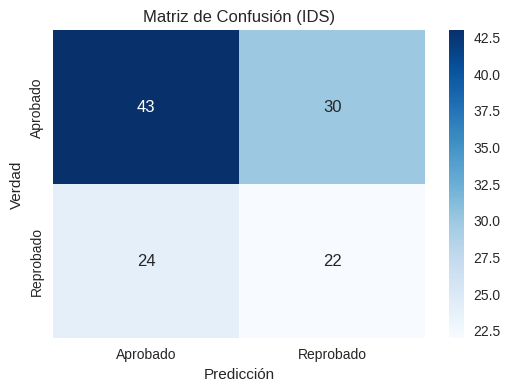


Verdaderos Negativos (Reprobado-Reprobado): 22
          Real Prediction
4    Reprobado  Reprobado
7    Reprobado  Reprobado
8    Reprobado  Reprobado
15   Reprobado  Reprobado
16   Reprobado  Reprobado
19   Reprobado  Reprobado
24   Reprobado  Reprobado
34   Reprobado  Reprobado
36   Reprobado  Reprobado
39   Reprobado  Reprobado
57   Reprobado  Reprobado
64   Reprobado  Reprobado
66   Reprobado  Reprobado
70   Reprobado  Reprobado
81   Reprobado  Reprobado
82   Reprobado  Reprobado
83   Reprobado  Reprobado
86   Reprobado  Reprobado
89   Reprobado  Reprobado
105  Reprobado  Reprobado
108  Reprobado  Reprobado
116  Reprobado  Reprobado

Falsos Positivos (Reprobado-Aprobado): 24
          Real Prediction
2    Reprobado   Aprobado
11   Reprobado   Aprobado
23   Reprobado   Aprobado
30   Reprobado   Aprobado
35   Reprobado   Aprobado
40   Reprobado   Aprobado
43   Reprobado   Aprobado
54   Reprobado   Aprobado
63   Reprobado   Aprobado
68   Reprobado   Aprobado
75   Reprobado   Aprobado

<Figure size 1000x600 with 0 Axes>

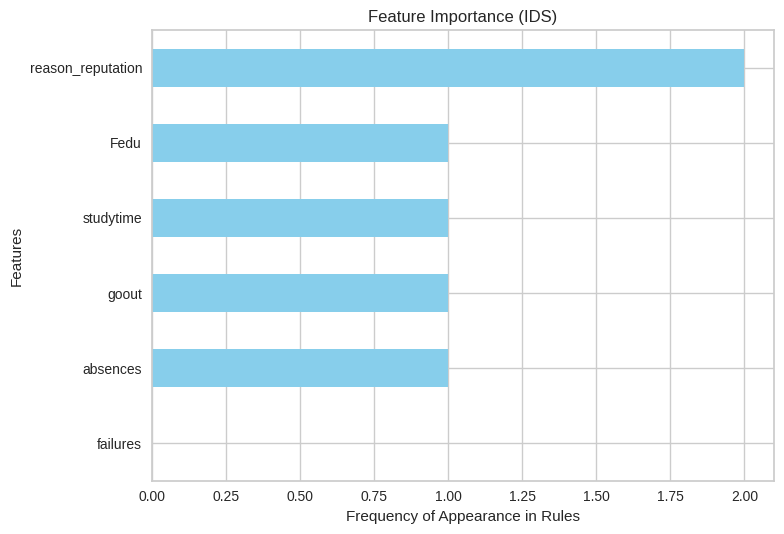


Valores únicos por cada columna en X_train_smote:
absences             34
goout                 5
studytime             4
reason_reputation     2
failures              4
Fedu                  5
dtype: int64

Parámetros del Modelo IDS:
lambda1: 0.01
lambda2: 0.01
lambda3: 1.0
lambda4: 1.0
min_support: 0.1
min_confidence: 0.5
max_rule_length: 3
Reglas guardadas en 'ids_rules.csv'

Reglas exportadas a 'ids_rules.csv'.


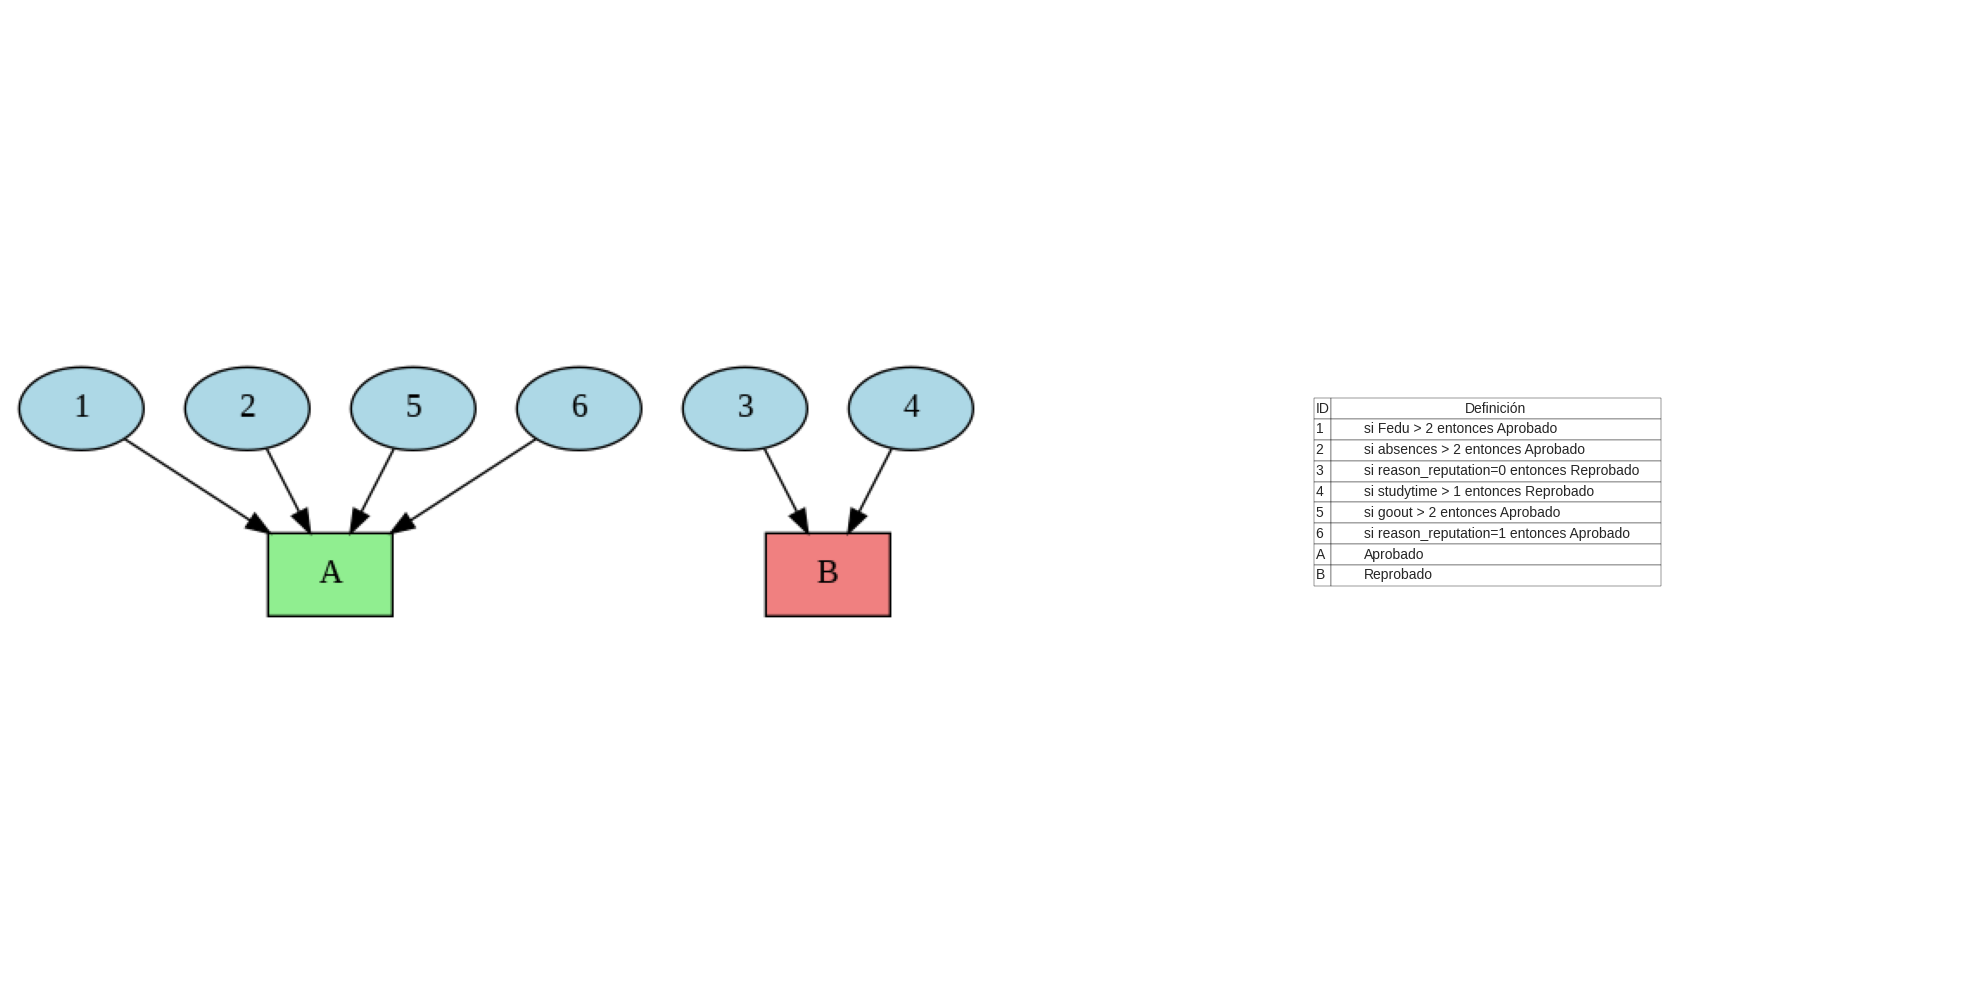

rule prediction  precision  parsimony  coverage      gini  sparsity  samples                                                                                                                                                                                                                                                                                                                                                                                                                                                    covered_indices
0              si Fedu > 2 entonces Aprobado   Aprobado   0.576471        0.5  0.442708  0.488304         1      170  [0, 2, 3, 4, 7, 10, 12, 13, 15, 16, 17, 19, 21, 23, 25, 26, 30, 32, 35, 37, 40, 41, 42, 45, 48, 49, 51, 53, 56, 58, 60, 63, 65, 69, 72, 73, 74, 75, 79, 80, 81, 84, 85, 87, 88, 89, 90, 91, 92, 98, 99, 100, 101, 102, 105, 111, 113, 117, 118, 119, 121, 122, 123, 125, 130, 131, 133, 134, 137, 138, 139, 140, 141, 142, 148, 150, 152, 153, 157, 160, 165, 168, 169, 170, 171, 172, 175, 176, 179, 182, 185, 186, 191, 192, 193, 194, 196, 198, 199, 200, ...]
1          si absences > 2 entonces Aprobado   Aprobado   0.532338        0.5  0.523438  0.497908         1      201  [0, 1, 4, 6, 7, 13, 15, 18, 20, 21, 22, 26, 29, 30, 33, 34, 35, 36, 38, 39, 41, 42, 43, 46, 47, 48, 51, 53, 56, 59, 60, 61, 63, 64, 67, 68, 70, 75, 77, 78, 79, 80, 82, 84, 86, 87, 88, 89, 93, 94, 97, 101, 103, 104, 106, 107, 112, 113, 114, 115, 117, 119, 120, 121, 125, 127, 128, 129, 132, 133, 137, 140, 143, 144, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 163, 165, 167, 168, 170, 173, 174, 175, 176, 177, 179, 181, 186, ...]
2  si reason_reputation=0 entonces Reprobado  Reprobado   0.559211        0.5  0.791667  0.492988         1      304                        [1, 2, 3, 4, 6, 7, 9, 10, 11, 14, 15, 16, 17, 18, 19, 22, 23, 24, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 44, 45, 46, 48, 50, 51, 52, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 77, 78, 80, 81, 83, 84, 86, 87, 89, 90, 91, 92, 94, 96, 97, 98, 99, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 128, 129, 130, 131, 134, 135, ...]
3        si studytime > 1 entonces Reprobado  Reprobado   0.472727        0.5  0.716146  0.498512         1      275                            [0, 2, 3, 4, 5, 6, 8, 10, 11, 12, 14, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 98, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 126, 127, 128, 129, ...]
4             si goout > 2 entonces Aprobado   Aprobado   0.456929        0.5  0.695312  0.496290         1      267               [5, 6, 8, 9, 12, 13, 15, 19, 20, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 42, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 59, 60, 64, 65, 67, 68, 69, 70, 71, 73, 74, 75, 76, 78, 79, 80, 83, 84, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 101, 104, 105, 109, 110, 113, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 129, 131, 132, 133, 134, 135, 137, 138, 140, 141, 144, 145, 147, 148, 150, 151, 152, 153, ...]
5   si reason_reputation=1 entonces Aprobado   Aprobado   0.725000        0.5  0.208333  0.398750         1       80                                                                                   [0, 5, 8, 12, 13, 20, 21, 25, 30, 32, 42, 43, 47, 49, 53, 54, 55, 56, 62, 73, 74, 75, 76, 79, 82, 85, 88, 93, 95, 100, 104, 110, 121, 127, 132, 133, 136, 144, 145, 149, 150, 158, 164, 165, 166, 168, 170, 175, 177, 181, 183, 185, 188, 192, 197, 200, 203, 204, 205, 210, 212, 220, 226, 227, 239, 243, 247, 250, 254, 256, 257, 264, 269, 270, 274, 280, 292, 320, 374, 375]


=== Propiedades del Modelo IDS ===
Tamaño (size): 6
Longitud promedio (length): 1.00
Total cubierto (cover): 384
Solapamiento (overlap): 373
Rule 1:
  Correctly covered samples: 41
  Incorrectly covered samples: 21
----------------------------------------
Rule 2:
  Correctly covered samples: 37
  Incorrectly covered samples: 28
----------------------------------------
Rule 3:
  Correctly covered samples: 34
  Incorrectly covered samples: 55
----------------------------------------
Rule 4:
  Correctly covered samples: 30
  Incorrectly covered samples: 52
----------------------------------------
Rule 5:
  Correctly covered samples: 47
  Incorrectly covered samples: 34
----------------------------------------
Rule 6:
  Correctly covered samples: 18
  Incorrectly covered samples: 12
----------------------------------------

=== Resultados de Correct-cover e Incorrect-cover ===
Correct-cover para cada regla: [41, 37, 34, 30, 47, 18]
Incorrect-cover para cada regla: [21, 28, 55, 52, 34, 12]

In [21]:
# ==============================
# Modelo 3: IDS
# ==============================

# Definir y entrenar el modelo IDS usando los datos balanceados
ids_model = IDSModel(
    lambda1=0.01,     # Penalización por número de reglas
    lambda2=0.01,     # Penalización por longitud de reglas
    lambda3=1.0,       # Mayor penalización por errores de clasificación
    lambda4=1.0,        # Mayor penalización por solapamiento
    min_support=0.1,   # Soporte mínimo reducido
    min_confidence=0.5, # Confianza mínima reducida
    max_rule_length=3   # Mayor longitud máxima de reglas
)

print("\n=== Entrenamiento del Modelo IDS ===")
# Entrenar el modelo IDS con los datos balanceados
ids_model.fit(X_train_smote, y_train_smote)  # `boolean_cols` se maneja internamente en el método `fit()`

print("\n=== Reglas Generadas por el Modelo IDS ===")
ids_model.print_rules(X_train_smote, y_train_smote)

# Realizar predicciones y evaluar el modelo IDS
y_pred = ids_model.predict(X_test)

# Mapeo de etiquetas para facilitar la interpretación
y_test_labels = y_test.map({1: 'Aprobado', 0: 'Reprobado'})
y_pred_labels = pd.Series(y_pred, index=y_test.index).map({1: 'Aprobado', 0: 'Reprobado'})

# Métricas de evaluación
print("\n=== Evaluación del Modelo IDS ===")
print("Precisión (Accuracy):", accuracy_score(y_test_labels, y_pred_labels))
print("Reporte de Clasificación:\n", classification_report(y_test_labels, y_pred_labels, labels=['Reprobado', 'Aprobado']))

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=['Aprobado', 'Reprobado'])
cm_df = pd.DataFrame(cm, index=['Aprobado', 'Reprobado'], columns=['Aprobado', 'Reprobado'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (IDS)')
plt.ylabel('Verdad')
plt.xlabel('Predicción')
plt.show()

# Listar ejemplos en la matriz de confusión
result_df_ids = list_confusion_matrix_examples(y_test_labels, y_pred_labels)

# Graficar la importancia de características
print("\n=== Importancia de las Características ===")
plot_feature_importance(ids_model, selected_features)

# Mostrar valores únicos por característica
print("\nValores únicos por cada columna en X_train_smote:")
print(X_train_smote.nunique())

# Obtener y mostrar los parámetros del modelo IDS
get_model_parameters(ids_model, model_name="Modelo IDS")

# Extraer reglas y métricas del modelo IDS y guardarlas en un archivo CSV
rules_df_ids = print_and_save_rules(ids_model, X_train_smote, y_train_smote)
print("\nReglas exportadas a 'ids_rules.csv'.")

# Visualizar las reglas usando la función de visualización
visualize_ids_rules(rules_df_ids)

# Mostrar las reglas extraídas con las métricas de interpretabilidad
configure_and_display_df(rules_df_ids)

# Calcular propiedades del modelo IDS
ids_properties = calculate_rule_properties(ids_model, X_train_smote, model_type="rules")

# Imprimir los resultados en consola
print("\n=== Propiedades del Modelo IDS ===")
print(f"Tamaño (size): {ids_properties['size']}")
print(f"Longitud promedio (length): {ids_properties['avg_length']:.2f}")
print(f"Total cubierto (cover): {ids_properties['cover']}")
print(f"Solapamiento (overlap): {ids_properties['overlap']}")

# Aplicación de la función
correct_cover, incorrect_cover = calculate_correct_incorrect_cover(ids_model, X_test, y_test)

# Imprimir los resultados generales
print("\n=== Resultados de Correct-cover e Incorrect-cover ===")
print(f"Correct-cover para cada regla: {correct_cover}")
print(f"Incorrect-cover para cada regla: {incorrect_cover}")


In [22]:
# ==============================
# Extracción y Visualización de los Cuatro Casos de la Matriz de Confusión para IDS
# ==============================

display_confusion_matrix_cases(
    X_test=X_test,
    y_true=y_test_labels,
    y_pred=y_pred_labels,
    model_name='IDS_model',  # Nombre del modelo IDS
    positive_label='Aprobado',
    negative_label='Reprobado'
)



=== True Positives (TP) ===


absences  goout  studytime  reason_reputation  failures  Fedu      Real  \
1           3      3          1                  0         0     2  Aprobado   
9           2      3          2                  1         0     4  Aprobado   
20          4      4          1                  0         0     4  Aprobado   
21          3      5          1                  0         0     1  Aprobado   
26          0      3          4                  1         0     2  Aprobado   
32          0      2          3                  1         0     3  Aprobado   
33          4      3          2                  0         0     4  Aprobado   
37          4      2          2                  1         0     4  Aprobado   
38          2      2          1                  1         0     1  Aprobado   
42          4      3          3                  0         0     4  Aprobado   
46         12      5          2                  0         0     3  Aprobado   
47         20      4          2                  0         1     3  Aprobado   
48          6      5          4                  0         0     4  Aprobado   
49          4      3          1                  0         0     4  Aprobado   
50          8      1          1                  1         0     2  Aprobado   
51          0      2          2                  1         0     3  Aprobado   
53          4      3          2                  0         0     4  Aprobado   
55         12      4          1                  0         0     2  Aprobado   
56          2      3          2                  1         0     1  Aprobado   
59          0      1          2                  1         0     4  Aprobado   
60          6      4          4                  1         0     2  Aprobado   
61          8      2          1                  1         0     3  Aprobado   
62          6      5          1                  0         3     1  Aprobado   
65          0      2          2                  1         0     4  Aprobado   
69         10      2          2                  1         0     3  Aprobado   
72          9      3          2                  1         0     4  Aprobado   
73          6      3          1                  0         0     4  Aprobado   
80          0      3          1                  0         0     3  Aprobado   
85          7      3          3                  0         0     4  Aprobado   
87          2      3          2                  1         0     3  Aprobado   
88         11      3          2                  0         0     4  Aprobado   
93          0      3          1                  0         0     3  Aprobado   
96          6      3          2                  0         0     3  Aprobado   
98          0      4          3                  1         0     4  Aprobado   
99          6      3          3                  1         0     4  Aprobado   
100         4      3          4                  1         0     4  Aprobado   
101        13      5          2                  0         0     4  Aprobado   
103         4      3          1                  0         0     3  Aprobado   
106         4      4          2                  0         0     3  Aprobado   
112         6      4          2                  0         0     4  Aprobado   
114        19      4          1                  0         1     2  Aprobado   
115         6      3          1                  0         0     1  Aprobado   
118         4      5          3                  0         0     4  Aprobado   

    IDS_model  
1    Aprobado  
9    Aprobado  
20   Aprobado  
21   Aprobado  
26   Aprobado  
32   Aprobado  
33   Aprobado  
37   Aprobado  
38   Aprobado  
42   Aprobado  
46   Aprobado  
47   Aprobado  
48   Aprobado  
49   Aprobado  
50   Aprobado  
51   Aprobado  
53   Aprobado  
55   Aprobado  
56   Aprobado  
59   Aprobado  
60   Aprobado  
61   Aprobado  
62   Aprobado  
65   Aprobado  
69   Aprobado  
72   Aprobado  
73   Aprobado  
80   Aprobado  
85   Aprobado  
87  

Total TP: 43

=== False Positives (FP) ===


absences  goout  studytime  reason_reputation  failures  Fedu       Real  \
2           8      3          2                  0         1     3  Reprobado   
11          6      2          3                  1         0     3  Reprobado   
23          6      4          2                  0         0     4  Reprobado   
30         38      4          1                  1         1     4  Reprobado   
35         14      3          1                  0         1     2  Reprobado   
40          2      4          2                  1         2     1  Reprobado   
43          8      3          1                  1         2     2  Reprobado   
54          7      3          1                  1         0     4  Reprobado   
63          4      4          2                  1         0     3  Reprobado   
68          9      4          3                  0         0     3  Reprobado   
75         10      4          2                  1         0     2  Reprobado   
76          8      2          2                  1         0     1  Reprobado   
78         16      5          1                  0         3     2  Reprobado   
84         16      3          2                  1         1     1  Reprobado   
91          4      4          2                  0         0     3  Reprobado   
94          0      1          1                  1         1     1  Reprobado   
95         10      3          4                  1         0     3  Reprobado   
102         6      4          2                  0         0     4  Reprobado   
107        20      4          2                  0         1     3  Reprobado   
109         0      4          2                  1         0     4  Reprobado   
110         5      3          1                  0         0     1  Reprobado   
111        14      5          1                  0         0     2  Reprobado   
113        12      3          2                  0         0     4  Reprobado   
117         3      3          1                  0         0     3  Reprobado   

    IDS_model  
2    Aprobado  
11   Aprobado  
23   Aprobado  
30   Aprobado  
35   Aprobado  
40   Aprobado  
43   Aprobado  
54   Aprobado  
63   Aprobado  
68   Aprobado  
75   Aprobado  
76   Aprobado  
78   Aprobado  
84   Aprobado  
91   Aprobado  
94   Aprobado  
95   Aprobado  
102  Aprobado  
107  Aprobado  
109  Aprobado  
110  Aprobado  
111  Aprobado  
113  Aprobado  
117  Aprobado

Total FP: 24

=== True Negatives (TN) ===


absences  goout  studytime  reason_reputation  failures  Fedu       Real  \
4          11      4          2                  0         2     2  Reprobado   
7          18      2          2                  0         0     1  Reprobado   
8           0      3          2                  0         0     1  Reprobado   
15          2      4          2                  0         0     3  Reprobado   
16          0      4          2                  0         0     2  Reprobado   
19          0      4          4                  0         0     2  Reprobado   
24          0      2          4                  0         0     3  Reprobado   
34          0      3          3                  0         0     3  Reprobado   
36          0      2          1                  0         2     3  Reprobado   
39         14      2          1                  0         2     2  Reprobado   
57          0      5          2                  0         0     2  Reprobado   
64          4      2          2                  0         2     2  Reprobado   
66          2      4          1                  0         1     1  Reprobado   
70          8      2          2                  0         0     3  Reprobado   
81          0      5          2                  0         3     3  Reprobado   
82          2      4          3                  0         0     3  Reprobado   
83          0      2          1                  0         0     1  Reprobado   
86          0      2          1                  0         1     1  Reprobado   
89          0      3          1                  0         0     1  Reprobado   
105         8      4          2                  0         3     1  Reprobado   
108        12      2          2                  0         0     2  Reprobado   
116         0      5          1                  0         1     2  Reprobado   

     IDS_model  
4    Reprobado  
7    Reprobado  
8    Reprobado  
15   Reprobado  
16   Reprobado  
19   Reprobado  
24   Reprobado  
34   Reprobado  
36   Reprobado  
39   Reprobado  
57   Reprobado  
64   Reprobado  
66   Reprobado  
70   Reprobado  
81   Reprobado  
82   Reprobado  
83   Reprobado  
86   Reprobado  
89   Reprobado  
105  Reprobado  
108  Reprobado  
116  Reprobado

Total TN: 22

=== False Negatives (FN) ===


absences  goout  studytime  reason_reputation  failures  Fedu      Real  \
0           2      1          1                  0         3     1  Aprobado   
3           8      4          2                  0         0     1  Aprobado   
5           0      3          2                  0         0     2  Aprobado   
6           2      3          2                  0         0     4  Aprobado   
10          0      1          2                  0         0     4  Aprobado   
12          1      3          3                  0         0     1  Aprobado   
13          0      1          1                  0         0     2  Aprobado   
14          8      4          2                  0         0     1  Aprobado   
17          2      3          2                  0         0     1  Aprobado   
18          0      3          3                  0         0     2  Aprobado   
22          0      3          2                  0         0     2  Aprobado   
25         10      2          1                  0         0     2  Aprobado   
27          0      2          2                  0         0     3  Aprobado   
28          0      3          3                  0         0     4  Aprobado   
29          8      3          4                  0         0     0  Aprobado   
31          2      2          3                  0         0     1  Aprobado   
41          0      2          2                  0         0     1  Aprobado   
44          2      2          1                  0         0     2  Aprobado   
45          0      3          2                  0         0     2  Aprobado   
52          0      2          2                  0         0     4  Aprobado   
58          2      1          2                  0         0     2  Aprobado   
67          4      2          1                  0         0     1  Aprobado   
71          2      2          2                  0         0     1  Aprobado   
74          0      2          2                  0         0     2  Aprobado   
77          2      2          3                  0         0     2  Aprobado   
79          2      3          2                  0         0     3  Aprobado   
90         23      2          2                  0         0     3  Aprobado   
92          2      1          2                  0         0     1  Aprobado   
97          0      4          2                  0         0     4  Aprobado   
104         0      1          1                  0         0     4  Aprobado   

     IDS_model  
0    Reprobado  
3    Reprobado  
5    Reprobado  
6    Reprobado  
10   Reprobado  
12   Reprobado  
13   Reprobado  
14   Reprobado  
17   Reprobado  
18   Reprobado  
22   Reprobado  
25   Reprobado  
27   Reprobado  
28   Reprobado  
29   Reprobado  
31   Reprobado  
41   Reprobado  
44   Reprobado  
45   Reprobado  
52   Reprobado  
58   Reprobado  
67   Reprobado  
71   Reprobado  
74   Reprobado  
77   Reprobado  
79   Reprobado  
90   Reprobado  
92   Reprobado  
97   Reprobado  
104  Reprobado

Total FN: 30


# Evaluación de Modelos

El archivo Excel 'resultados_predicciones.xlsx' ha sido creado exitosamente.


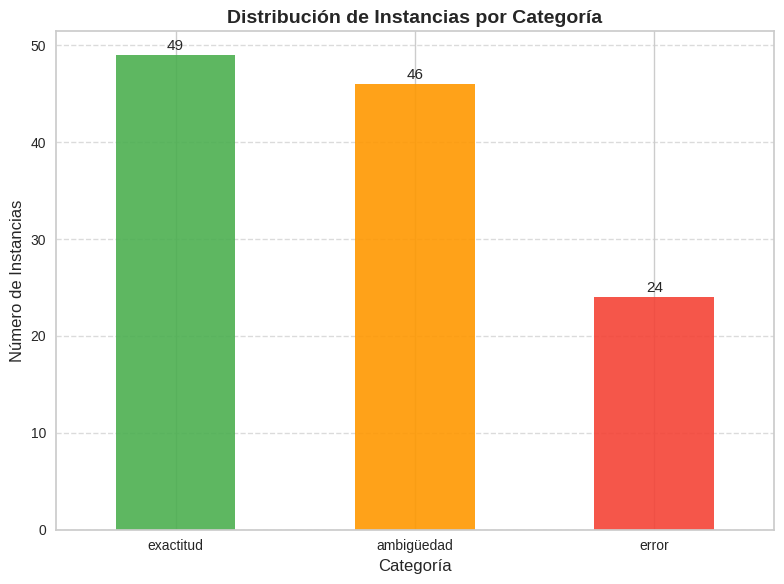

La gráfica ha sido generada y guardada como 'grafica_categorias.png'.


In [23]:
# Crear el DataFrame con las columnas dinámicamente desde X_test
data = {
    'id': range(1, len(X_test) + 1),  # Enumerar las instancias empezando desde 1
    'pregunta': X_test.index,  # Índices de las preguntas
    **{feature: X_test[feature].values for feature in X_test.columns},  # Agregar todas las columnas de X_test automáticamente
    'real': y_test_labels.values,  # Etiquetas reales
    'interpretml': y_pred_labels_interpretml.values,  # Predicciones del modelo InterpretML
    'ids': y_pred_labels.values,  # Predicciones del modelo IDS
    'categoría': [  # Clasificación
        'exactitud' if y_real == y_interpretml == y_ids else
        ('ambigüedad' if y_interpretml != y_ids else 'error')
        for y_real, y_interpretml, y_ids in zip(y_test_labels.values, y_pred_labels_interpretml.values, y_pred_labels.values)
    ]
}

# Crear un DataFrame con los datos
result_df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo Excel
result_df.to_excel('resultados_predicciones.xlsx', index=False, engine='openpyxl')

print("El archivo Excel 'resultados_predicciones.xlsx' ha sido creado exitosamente.")

# Cargar el archivo Excel generado
file_path = 'resultados_predicciones.xlsx'  # Asegúrate de que el archivo exista en el directorio actual
df = pd.read_excel(file_path)

# Contar las instancias en cada categoría
category_counts = df['categoría'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['#4CAF50', '#FF9800', '#F44336'], alpha=0.9)
plt.title('Distribución de Instancias por Categoría', fontsize=14, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Instancias', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de los valores en las barras
for i, count in enumerate(category_counts):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=11)

# Guardar la gráfica como archivo PNG
plt.tight_layout()
plt.savefig('grafica_categorias.png')
plt.show()

print("La gráfica ha sido generada y guardada como 'grafica_categorias.png'.")


## Pruebas

Index(['rule', 'prediction', 'precision', 'parsimony', 'coverage', 'gini',
       'sparsity', 'samples', 'covered_indices'],
      dtype='object')


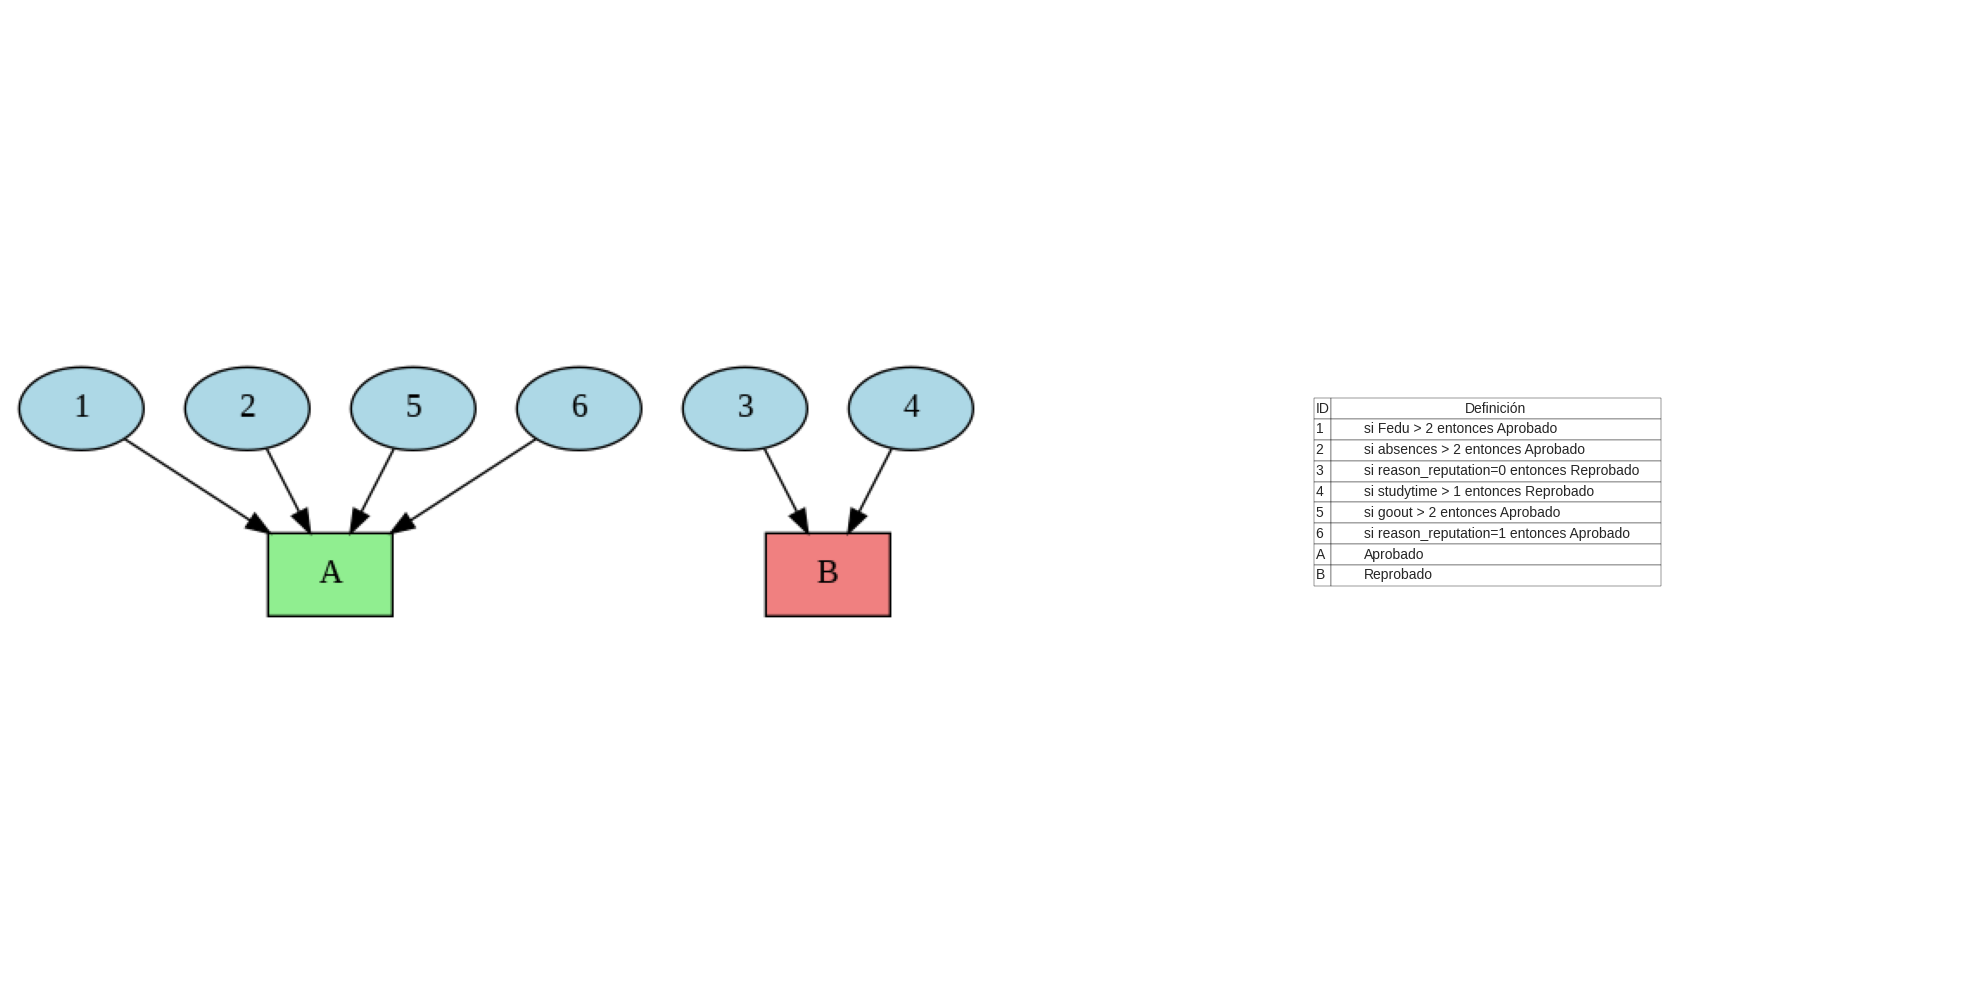

In [24]:
rules_df = pd.read_csv('ids_rules.csv')
print(rules_df.columns)

# Llamar a la función con los nombres de columnas correctos
visualize_ids_rules(rules_df, rule_col='rule', prediction_col='prediction')


### TP

In [25]:
test_features = {
    'absences': 3,      # Cualquier valor que no sea restrictivo
    'goout': 3,         # Cumple con `goout > 3`
    'studytime': 1,     # Cualquier valor que no sea restrictivo
    'reason_reputation': 0,   # Cualquier valor que no sea restrictivo
    'failures': 0,      # Cumple con `failures > 0`
    'Fedu': 2           # Cumple con `Fedu > 2`
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)
display(resultados)

Modelo Predicción
0  InterpretML   Aprobado
1          IDS   Aprobado

### FP

In [26]:
test_features = {
    'absences': 6,      # Cualquier valor que no sea restrictivo
    'goout': 2,         # Cumple con `goout > 3`
    'studytime': 3,     # Cualquier valor que no sea restrictivo
    'reason_reputation': 1,   # Cualquier valor que no sea restrictivo
    'failures': 0,      # Cumple con `failures > 0`
    'Fedu': 3           # Cumple con `Fedu > 2`
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)
display(resultados)

Modelo Predicción
0  InterpretML   Aprobado
1          IDS   Aprobado

### TN

In [27]:
test_features = {
    'absences': 8,      # Cualquier valor que no sea restrictivo
    'goout': 3,         # Cumple con `goout > 3`
    'studytime': 2,     # Cualquier valor que no sea restrictivo
    'reason_reputation': 0,   # Cualquier valor que no sea restrictivo
    'failures': 1,      # Cumple con `failures > 0`
    'Fedu': 3           # Cumple con `Fedu > 2`
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)
display(resultados)

Modelo Predicción
0  InterpretML  Reprobado
1          IDS   Aprobado

### FN

In [28]:
test_features = {
    'absences': 2,      # Cualquier valor que no sea restrictivo
    'goout': 1,         # Cumple con `goout > 3`
    'studytime': 1,     # Cualquier valor que no sea restrictivo
    'reason_reputation': 0,   # Cualquier valor que no sea restrictivo
    'failures': 3,      # Cumple con `failures > 0`
    'Fedu': 1           # Cumple con `Fedu > 2`
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)
display(resultados)

Modelo Predicción
0  InterpretML   Aprobado
1          IDS  Reprobado

## Survey Questions

### Exactitud

#### Reglas

In [29]:
test_features = {
    'absences': 18,
    'goout': 2,
    'studytime': 2,
    'reason_reputation': 0,
    'failures': 0,
    'Fedu': 1
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML  Reprobado
1          IDS  Reprobado

#### Global

In [30]:
test_features = {
    'absences': 0,
    'goout': 2,
    'studytime': 2,
    'reason_reputation': 1,
    'failures': 0,
    'Fedu': 3
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML   Aprobado
1          IDS   Aprobado

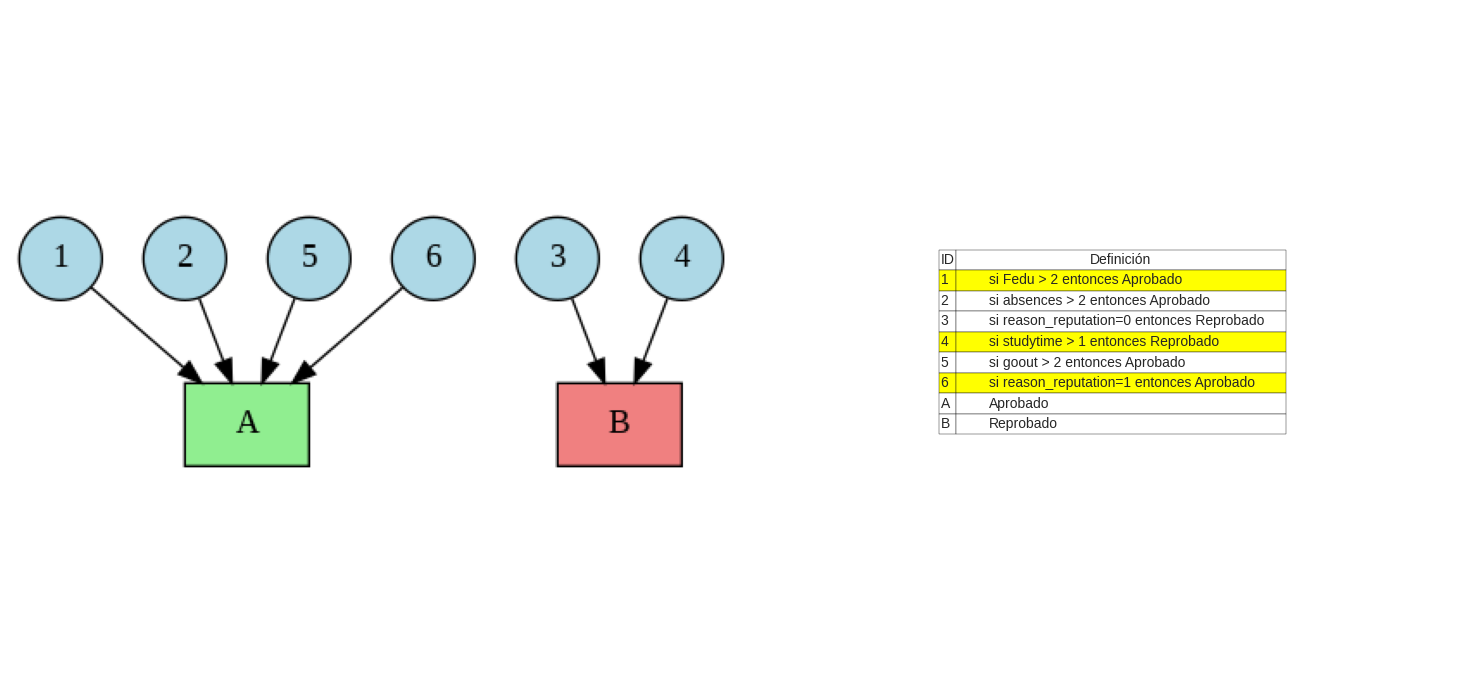

In [31]:
explain_global_ids(ids_model, rules_df_ids, test_features=test_features)

#### Local

In [32]:
test_features = {
    'absences': 8,
    'goout': 4,
    'studytime': 2,
    'reason_reputation': 0,
    'failures': 3,
    'Fedu': 1
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML  Reprobado
1          IDS  Reprobado

Observación específica:
absences             8
goout                4
studytime            2
reason_reputation    0
failures             3
Fedu                 1
Name: 0, dtype: int64
Reglas seleccionadas por el modelo:
Regla 1: si Fedu > 2 entonces Aprobado
Regla 2: si absences > 2 entonces Aprobado
Regla 3: si reason_reputation=0 entonces Reprobado
Regla 4: si studytime > 1 entonces Reprobado
Regla 5: si goout > 2 entonces Aprobado
Regla 6: si reason_reputation=1 entonces Aprobado
Reglas activas: [2, 3, 4, 5]
Clase predicha según IDS: Reprobado


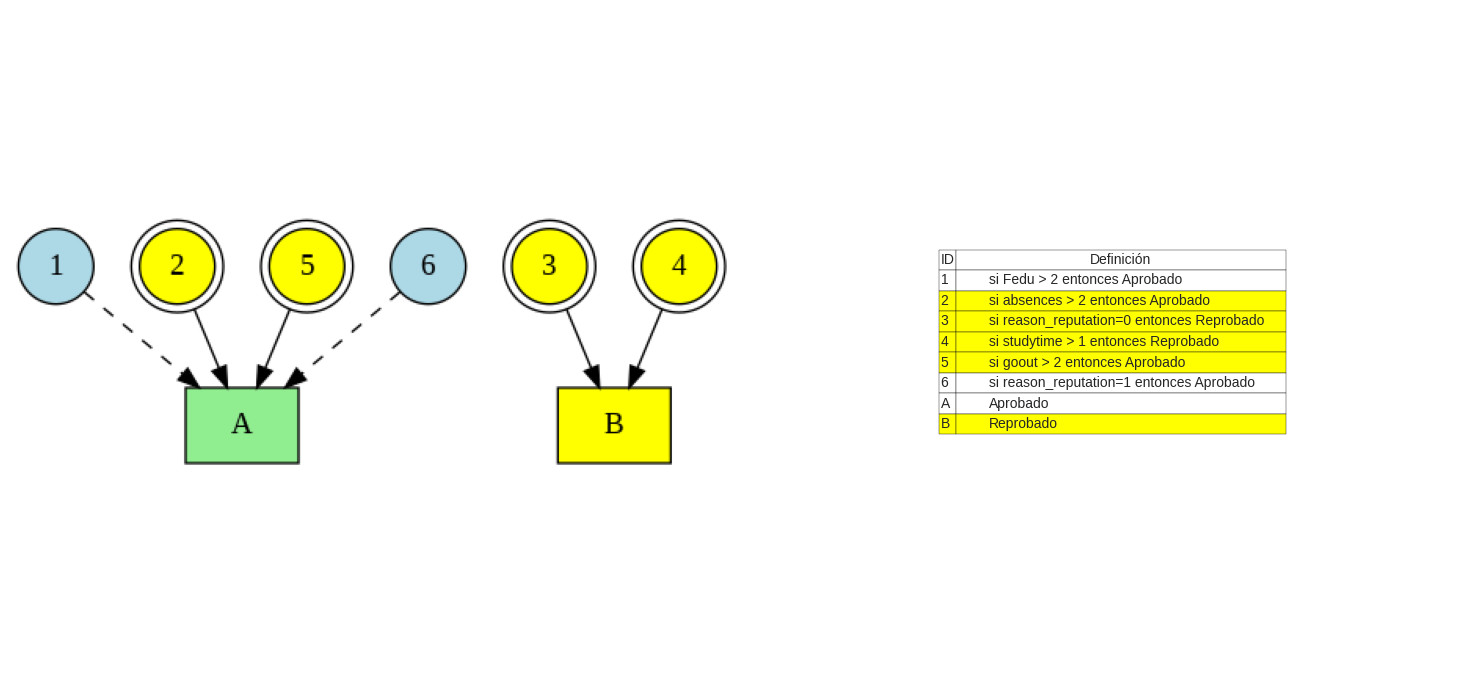

In [33]:
explain_local_ids(ids_model, rules_df_ids, test_features, highlight_predicted_in_table=True)

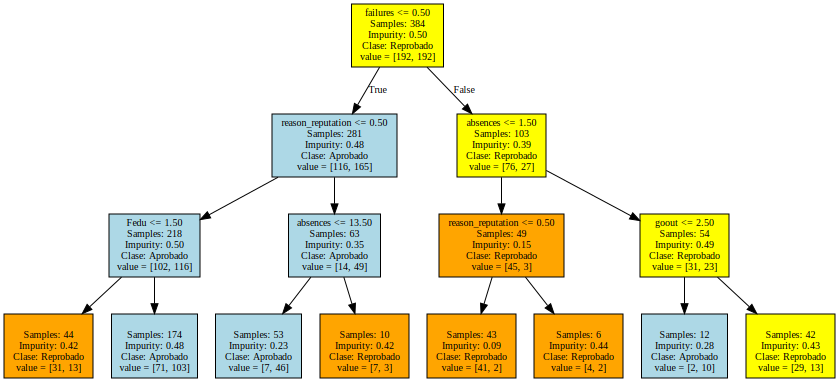

In [34]:
explain_tree_locally(sk_tree_model_interpretml, test_features)

In [35]:
generate_local_explanation(interpretml_tree, test_features)

### Ambigüedad

#### Reglas

In [36]:
test_features = {
    'absences': 10,
    'goout': 2,
    'studytime': 1,
    'reason_reputation': 0,
    'failures': 0,
    'Fedu': 2
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML   Aprobado
1          IDS  Reprobado

#### Global

In [37]:
test_features = {
    'absences': 6,
    'goout': 5,
    'studytime': 1,
    'reason_reputation': 0,
    'failures': 3,
    'Fedu': 1
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML  Reprobado
1          IDS   Aprobado

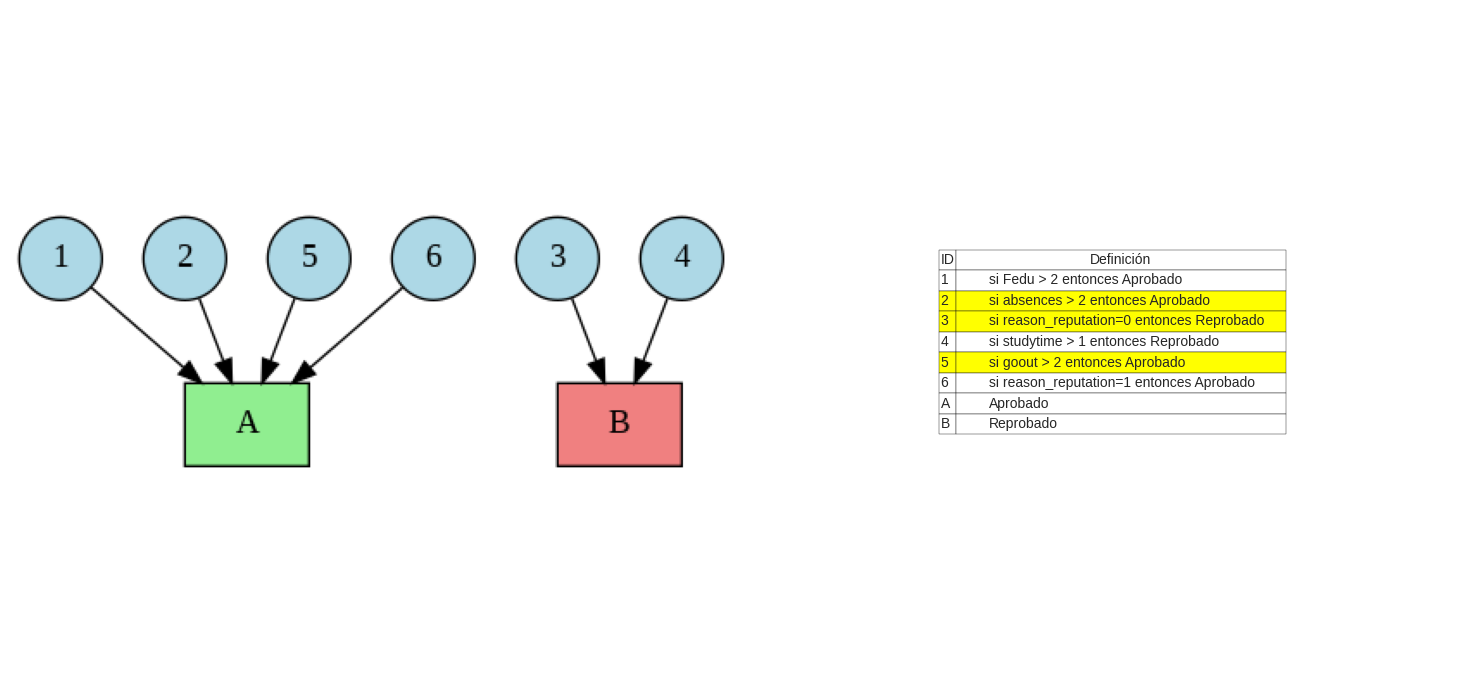

In [38]:
explain_global_ids(ids_model, rules_df_ids, test_features=test_features)

#### Local

In [39]:
test_features = {
    'absences': 19,
    'goout': 4,
    'studytime': 1,
    'reason_reputation': 0,
    'failures': 1,
    'Fedu': 2
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML  Reprobado
1          IDS   Aprobado

Observación específica:
absences             19
goout                 4
studytime             1
reason_reputation     0
failures              1
Fedu                  2
Name: 0, dtype: int64
Reglas seleccionadas por el modelo:
Regla 1: si Fedu > 2 entonces Aprobado
Regla 2: si absences > 2 entonces Aprobado
Regla 3: si reason_reputation=0 entonces Reprobado
Regla 4: si studytime > 1 entonces Reprobado
Regla 5: si goout > 2 entonces Aprobado
Regla 6: si reason_reputation=1 entonces Aprobado
Reglas activas: [2, 3, 5]
Clase predicha según IDS: Aprobado


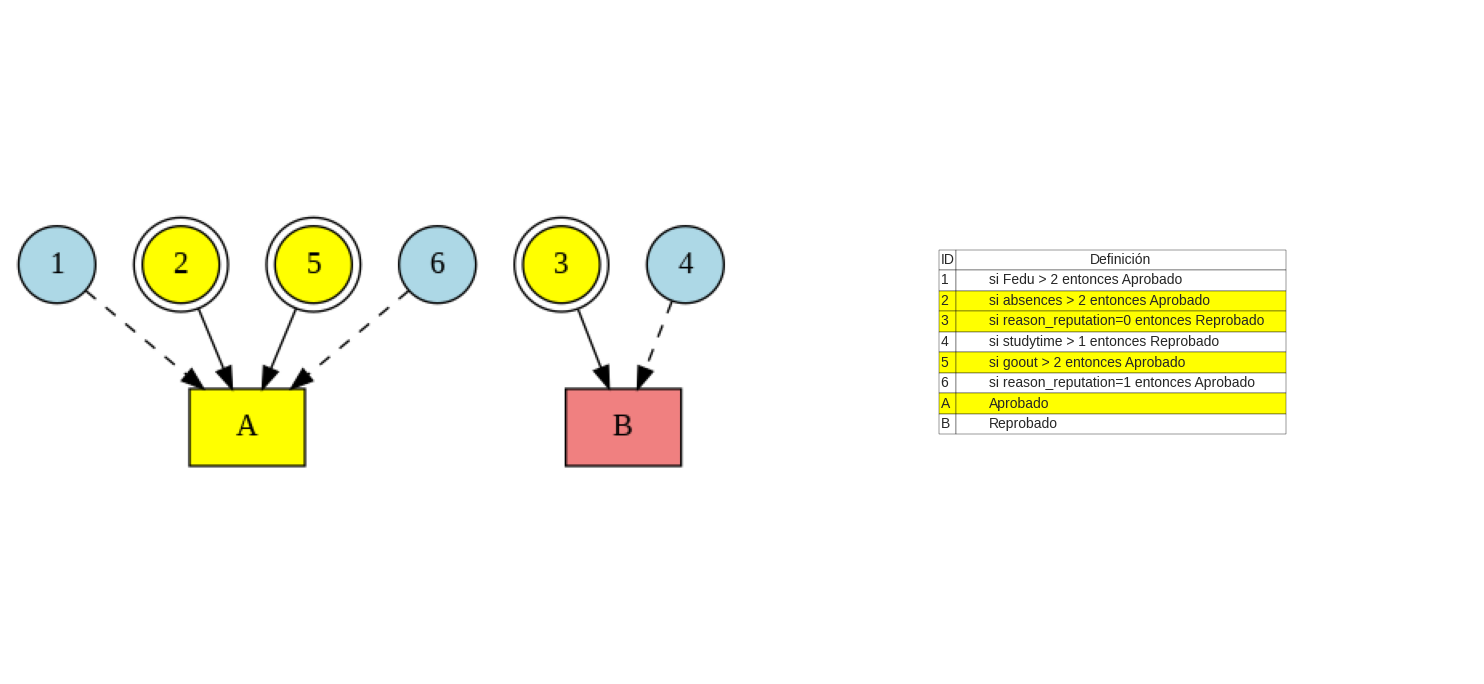

In [40]:
explain_local_ids(ids_model, rules_df_ids, test_features, highlight_predicted_in_table=True)

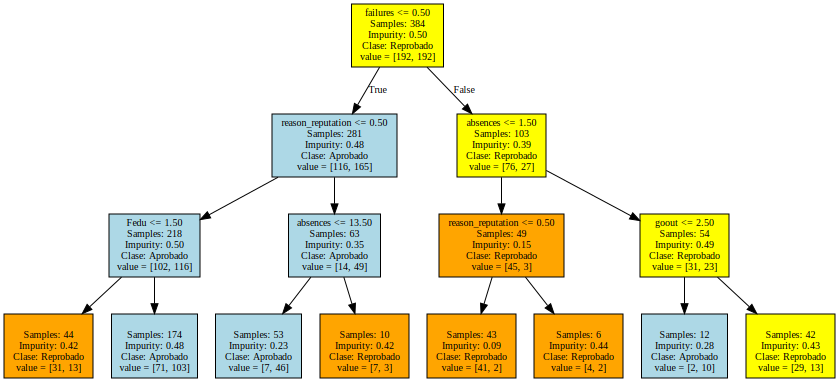

In [41]:
explain_tree_locally(sk_tree_model_interpretml, test_features)

In [42]:
generate_local_explanation(interpretml_tree, test_features)

### Error

#### Reglas

In [43]:
test_features = {
    'absences': 6,
    'goout': 2,
    'studytime':3,
    'reason_reputation': 1,
    'failures': 0,
    'Fedu': 3
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML   Aprobado
1          IDS   Aprobado

#### Global

In [44]:
test_features = {
    'absences': 0,
    'goout': 2,
    'studytime': 2,
    'reason_reputation': 0,
    'failures': 0,
    'Fedu': 1
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML  Reprobado
1          IDS  Reprobado

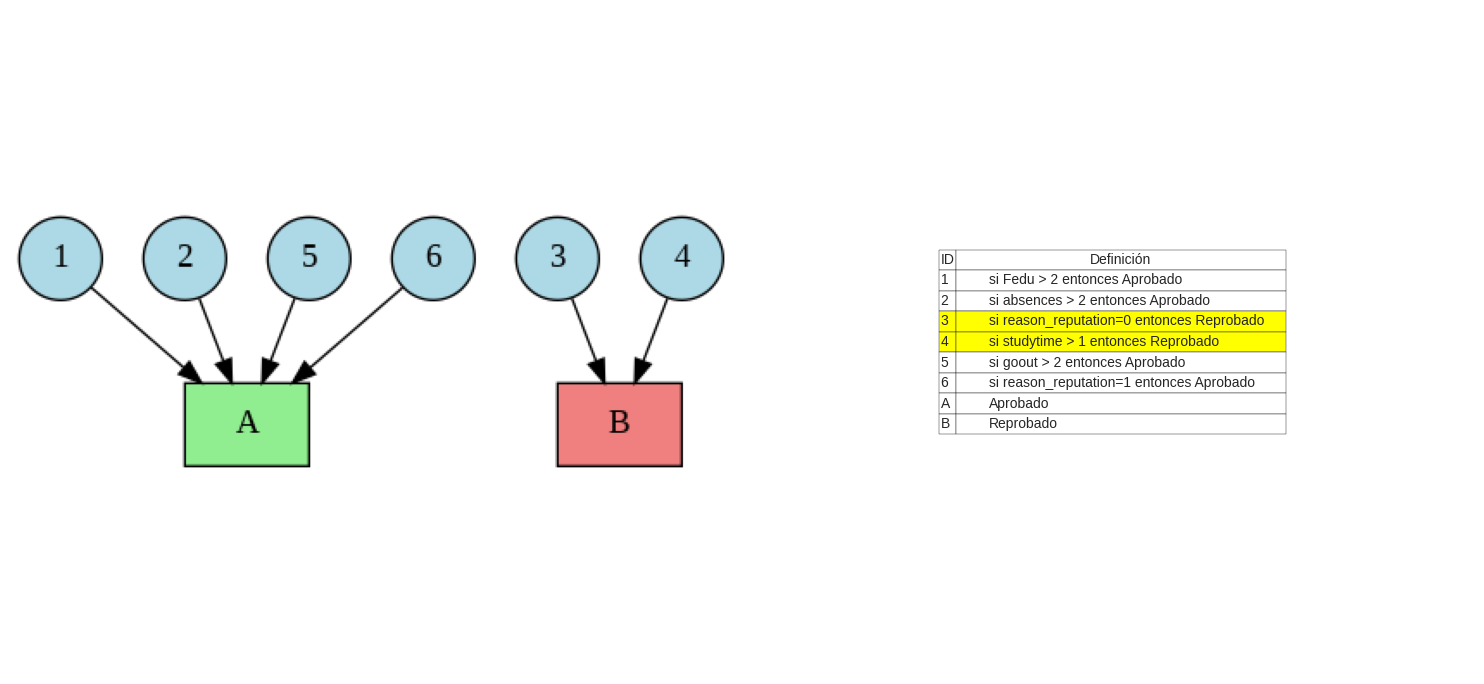

In [45]:
explain_global_ids(ids_model, rules_df_ids, test_features=test_features)

#### Local

In [46]:
test_features = {
    'absences': 12,
    'goout': 3,
    'studytime': 2,
    'reason_reputation': 0,
    'failures': 0,
    'Fedu': 4
}

resultados = get_predictions(interpretml_tree, ids_model, test_features)

display(resultados)

Modelo Predicción
0  InterpretML   Aprobado
1          IDS   Aprobado

Observación específica:
absences             12
goout                 3
studytime             2
reason_reputation     0
failures              0
Fedu                  4
Name: 0, dtype: int64
Reglas seleccionadas por el modelo:
Regla 1: si Fedu > 2 entonces Aprobado
Regla 2: si absences > 2 entonces Aprobado
Regla 3: si reason_reputation=0 entonces Reprobado
Regla 4: si studytime > 1 entonces Reprobado
Regla 5: si goout > 2 entonces Aprobado
Regla 6: si reason_reputation=1 entonces Aprobado
Reglas activas: [1, 2, 3, 4, 5]
Clase predicha según IDS: Aprobado


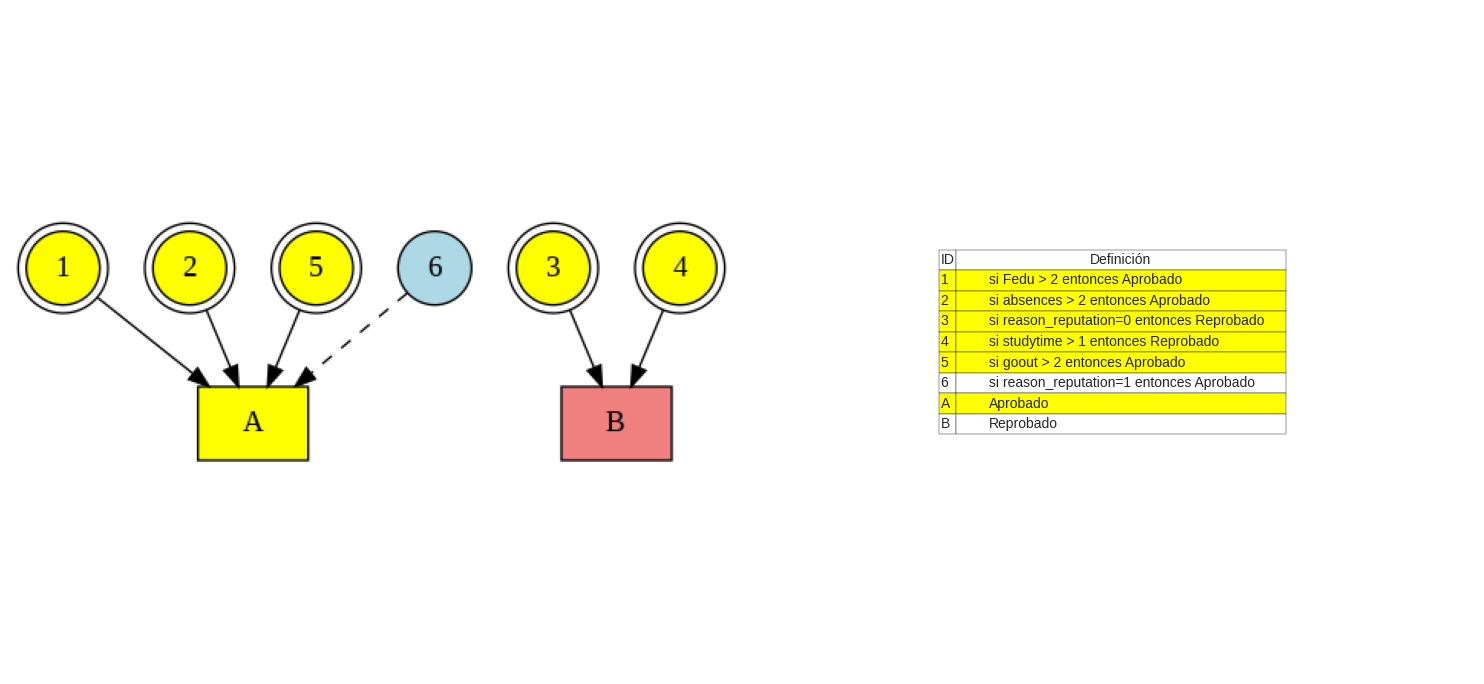

In [47]:
explain_local_ids(ids_model, rules_df_ids, test_features, highlight_predicted_in_table=True)

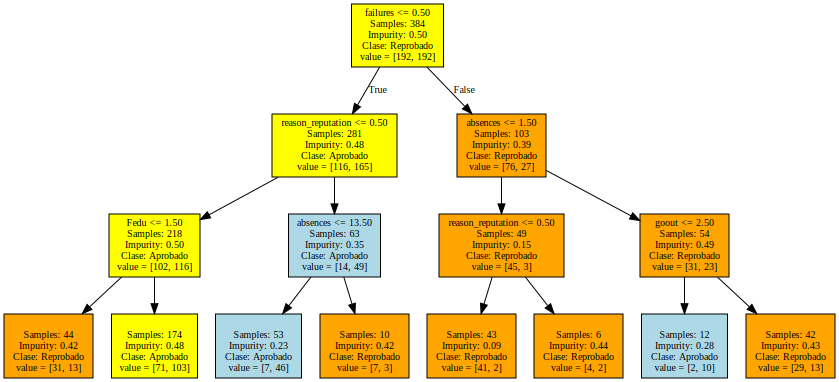

In [48]:
explain_tree_locally(sk_tree_model_interpretml, test_features)

In [49]:
generate_local_explanation(interpretml_tree, test_features)

# Visualización de Resultados

## Precisión

Métricas de rendimiento de los modelos:


Precisión  Precisión (Aprobado)  Precisión (Reprobado)  \
scikit-learn DT   0.663866              0.703704               0.578947   
InterpretML DT    0.663866              0.698795               0.583333   
IDS Model         0.546218              0.641791               0.423077   

                 Recall (Aprobado)  Recall (Reprobado)  F1-score (Aprobado)  \
scikit-learn DT           0.780822            0.478261             0.740260   
InterpretML DT            0.794521            0.456522             0.743590   
IDS Model                 0.589041            0.478261             0.614286   

                 F1-score (Reprobado)  
scikit-learn DT              0.523810  
InterpretML DT               0.512195  
IDS Model                    0.448980

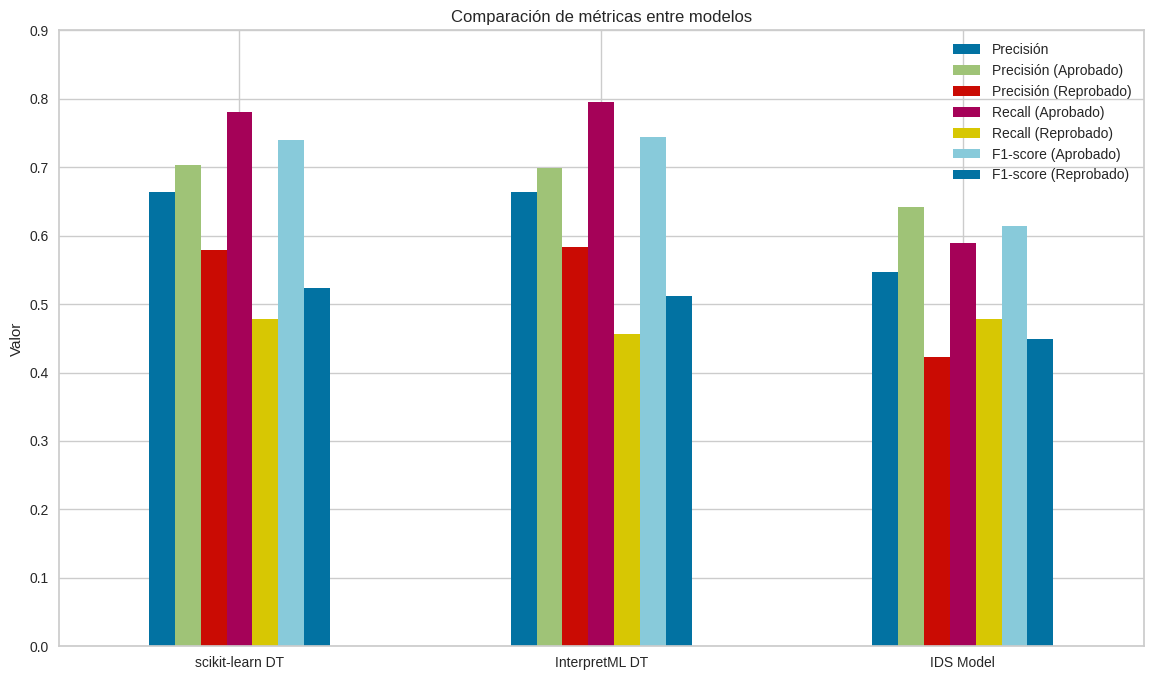

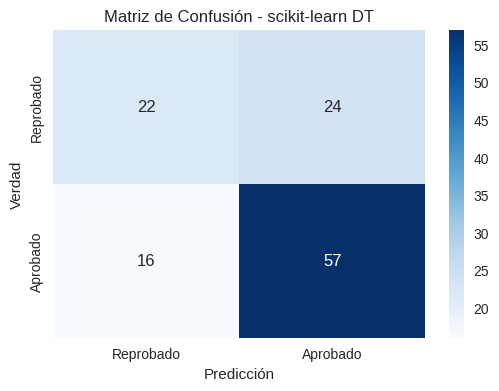

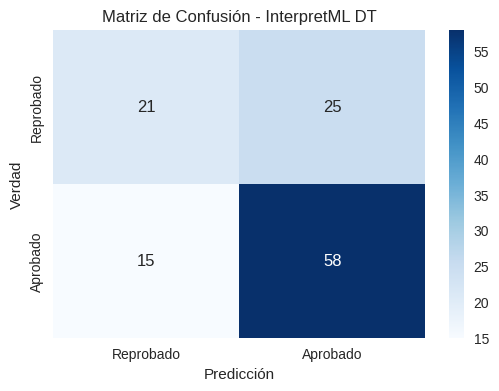

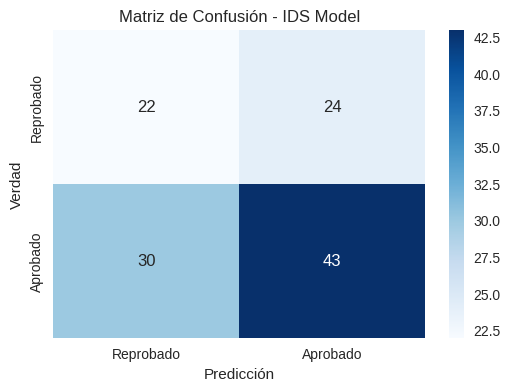

In [50]:
# Ejecutar la función de evaluación con los tres modelos
evaluate_models(tree_sklearn, interpretml_tree, ids_model, X_test, y_test)


## Interpretabilidad

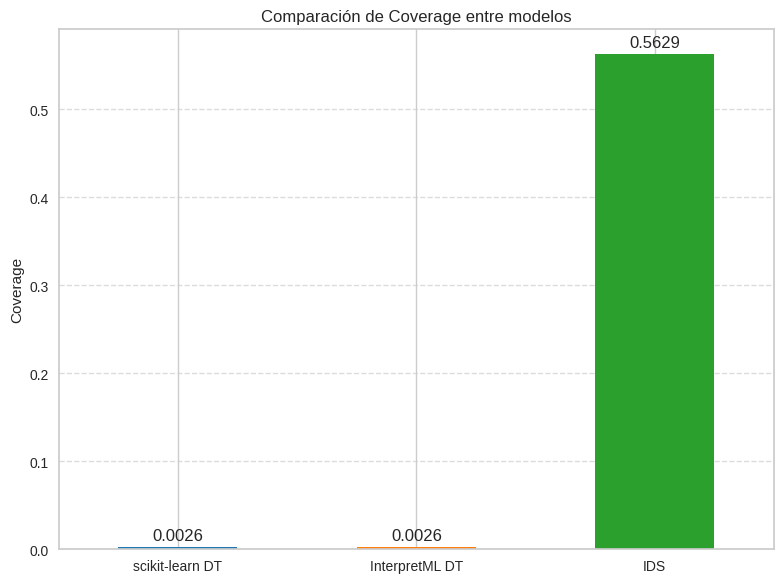

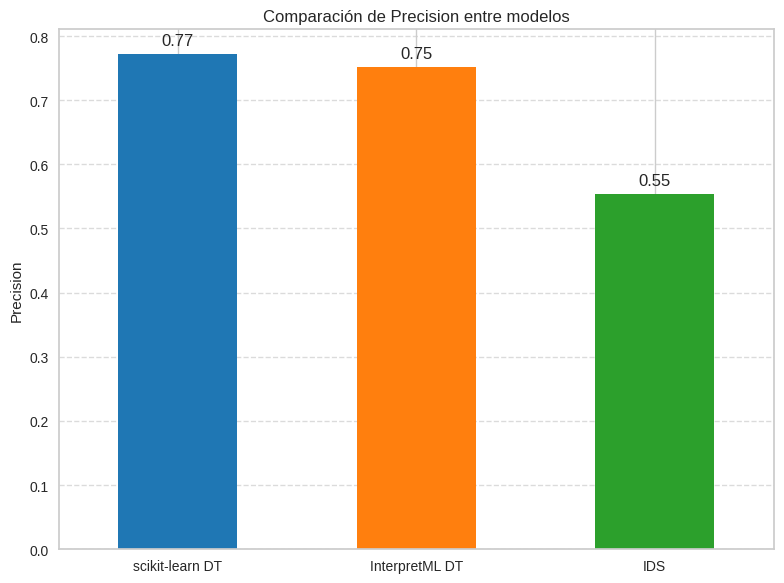

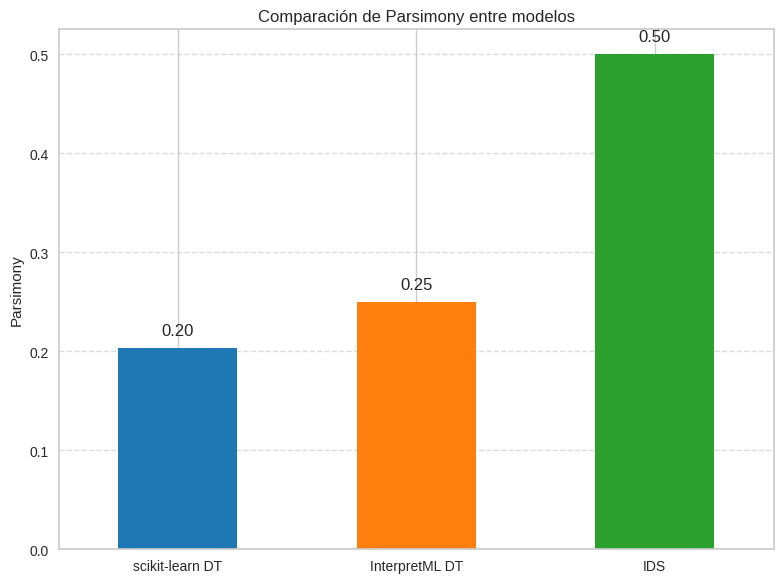

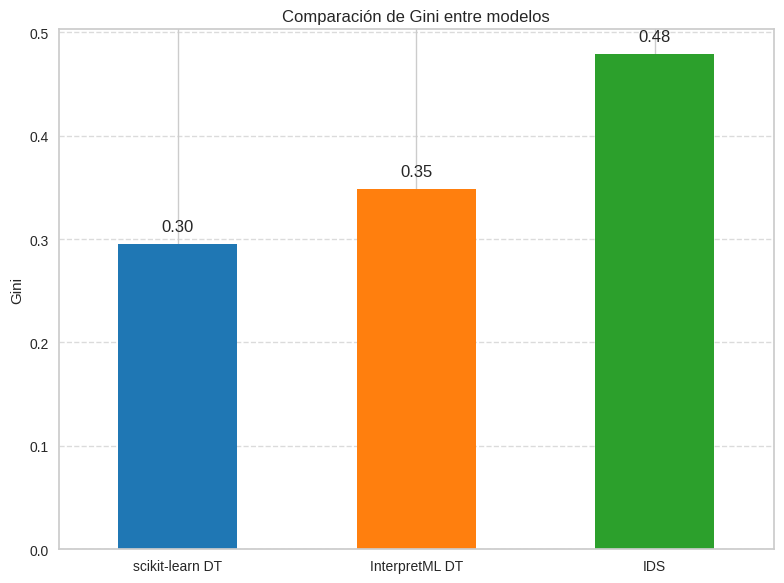

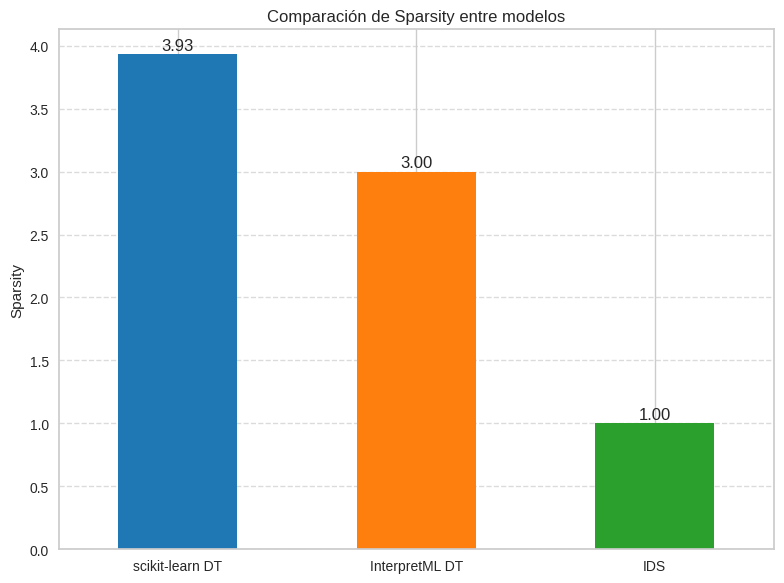

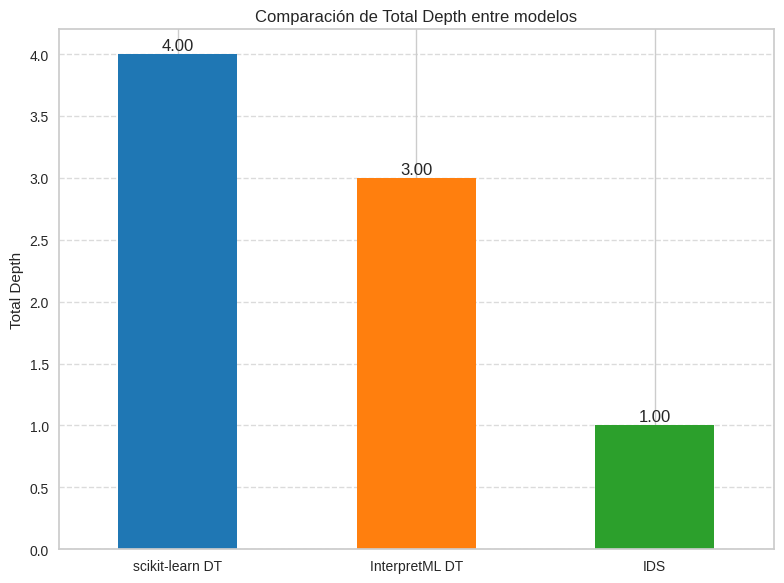

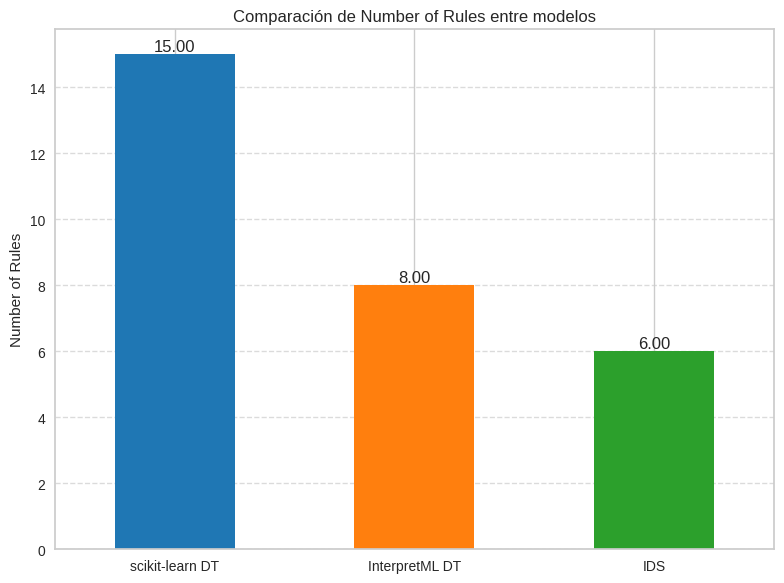

In [51]:
# ==============================
# Cálculo de métricas de interpretabilidad
# ==============================

# Los modelos deben estar previamente entrenados:
# tree_sklearn, interpretml_tree, ids_model

# Calcular métricas de interpretabilidad para el modelo scikit-learn
metrics_sklearn, simplicity_sklearn = calculate_tree_interpretability_metrics(tree_sklearn, X_train_smote, y_train_smote, selected_features)

# Calcular métricas de interpretabilidad para el modelo InterpretML
metrics_interpretml, simplicity_interpretml = calculate_tree_interpretability_metrics(interpretml_tree._model(), X_train_smote, y_train_smote, selected_features)

# Calcular métricas de interpretabilidad para el modelo IDS
# Justificación: La "profundidad" de IDS se considera análoga a la longitud de las reglas
metrics_ids, simplicity_ids = calculate_ids_interpretability_metrics(ids_model, X_train_smote, y_train_smote)

# ==============================
# Crear DataFrames de métricas
# ==============================

# Crear un DataFrame con las métricas promedio de cada modelo
metrics_comparison_df = pd.DataFrame({
    'scikit-learn DT': metrics_sklearn.mean(),
    'InterpretML DT': metrics_interpretml.mean(),
    'IDS': metrics_ids.mean()
})

# Crear un DataFrame para las métricas de simplicidad globales
# Nota: Para IDS, la "profundidad total" es la longitud promedio de las reglas
simplicity_comparison_df = pd.DataFrame({
    'scikit-learn DT': pd.Series(simplicity_sklearn),
    'InterpretML DT': pd.Series(simplicity_interpretml),
    'IDS': pd.Series(simplicity_ids)  # La longitud de reglas se usa como "profundidad"
})

# ==============================
# Gráfica de Cobertura con 4 decimales
# ==============================

# Lista de métricas a graficar
metrics_to_plot = ['Coverage']

# Crear gráficas de barras para cada métrica con los valores en cada barra (4 decimales)
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    data = metrics_comparison_df.loc[metric]
    bars = data.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title(f'Comparación de {metric} entre modelos')
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir los valores en las barras (4 decimales)
    for i, v in enumerate(data):
        plt.text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# ==============================
# Gráficas de comparación de métricas con valores en las barras (2 decimales)
# ==============================

# Lista de métricas a graficar
metrics_to_plot = ['Precision', 'Parsimony', 'Gini', 'Sparsity']

# Crear gráficas de barras para cada métrica con los valores en cada barra (2 decimales)
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    data = metrics_comparison_df.loc[metric]
    bars = data.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title(f'Comparación de {metric} entre modelos')
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir los valores en las barras (2 decimales)
    for i, v in enumerate(data):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Gráficas de comparación de simplicidad (profundidad total y número de reglas) con valores en las barras (2 decimales)
for metric in simplicity_comparison_df.index:
    plt.figure(figsize=(8, 6))
    data = simplicity_comparison_df.loc[metric]
    bars = data.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title(f'Comparación de {metric} entre modelos')
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir los valores en las barras (2 decimales)
    for i, v in enumerate(data):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


## Propiedades de Relevantes

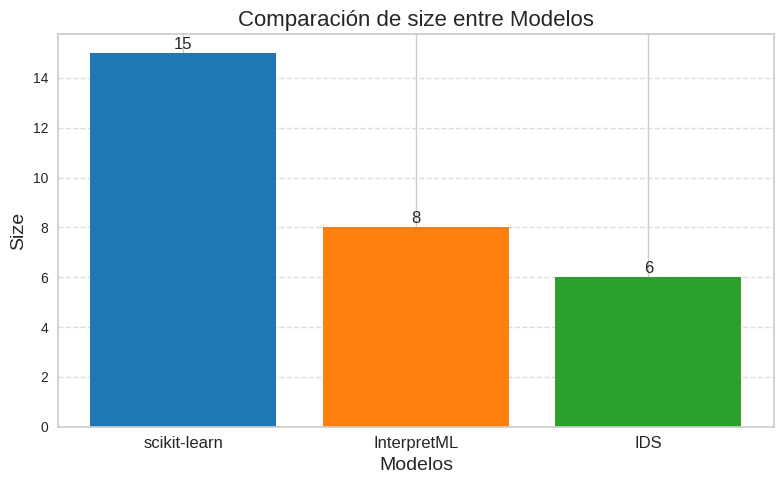

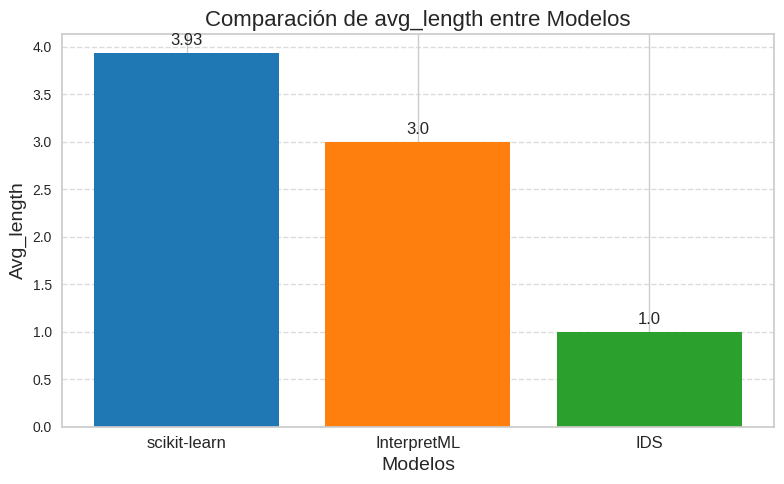

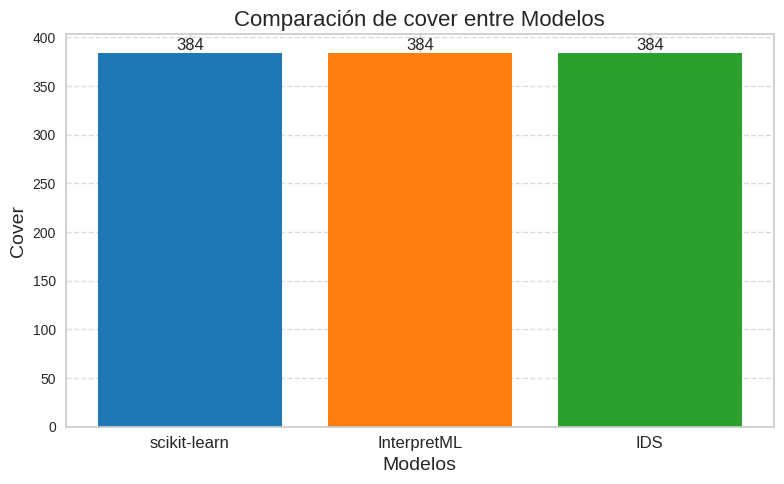

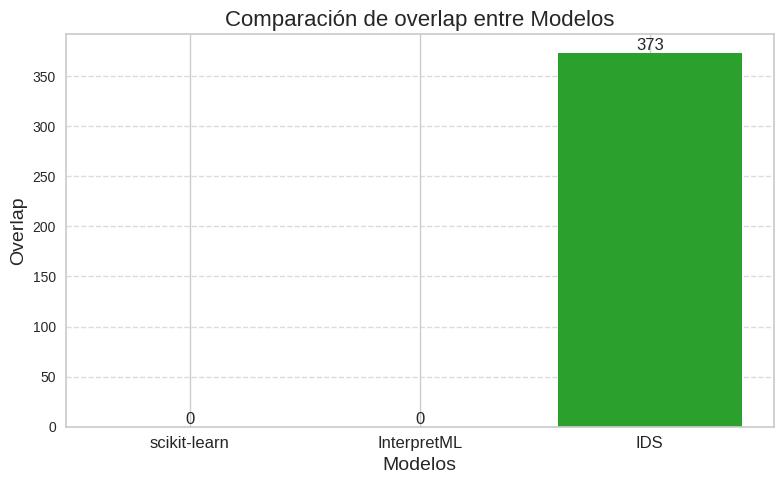

In [52]:
# Paso 1: Calcular las propiedades para cada modelo
propiedades_sklearn = calculate_rule_properties(tree_sklearn, X_train_smote, model_type="tree")
propiedades_interpretml = calculate_rule_properties(sk_tree_model_interpretml, X_train_smote, model_type="tree")
propiedades_ids = calculate_rule_properties(ids_model, X_train_smote, model_type="rules")

# Paso 2: Crear un DataFrame con las propiedades de los tres modelos
df_propiedades = pd.DataFrame({
    'Modelo': ['scikit-learn', 'InterpretML', 'IDS'],
    'size': [propiedades_sklearn['size'], propiedades_interpretml['size'], propiedades_ids['size']],
    'avg_length': [propiedades_sklearn['avg_length'], propiedades_interpretml['avg_length'], propiedades_ids['avg_length']],
    'cover': [propiedades_sklearn['cover'], propiedades_interpretml['cover'], propiedades_ids['cover']],
    'overlap': [propiedades_sklearn['overlap'], propiedades_interpretml['overlap'], propiedades_ids['overlap']]
})

# Paso 3: Graficar cada propiedad por separado

# Crear una lista de propiedades que queremos graficar
propiedades = ['size', 'avg_length', 'cover', 'overlap']

# Lista de colores para las barras
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Azul, Naranja, Verde

# Generar una gráfica de barras para cada propiedad
for propiedad in propiedades:
    fig, ax = plt.subplots(figsize=(8, 5))

    # Obtener los valores de la propiedad actual y sus etiquetas
    valores = df_propiedades[propiedad]
    modelos = df_propiedades['Modelo']

    # Crear las barras
    barras = ax.bar(modelos, valores, color=colores)

    # Etiquetar cada barra con el valor correspondiente
    for bar in barras:
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.05,  # Ajuste para la posición del texto
                round(bar.get_height(), 2),  # Valor redondeado de la barra
                ha='center', va='bottom', fontsize=12)

    # Configuración de etiquetas
    plt.title(f"Comparación de {propiedad} entre Modelos", fontsize=16)
    plt.xlabel("Modelos", fontsize=14)
    plt.ylabel(propiedad.capitalize(), fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## Precisión vs Parsimonía

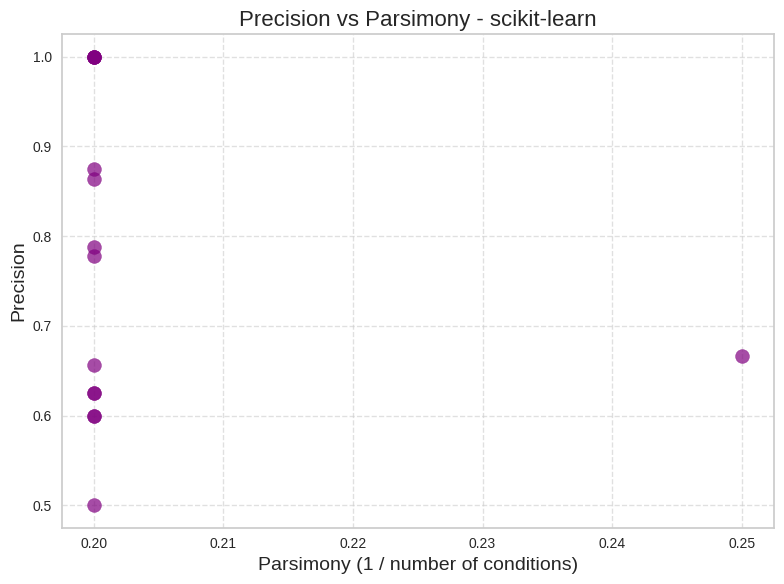

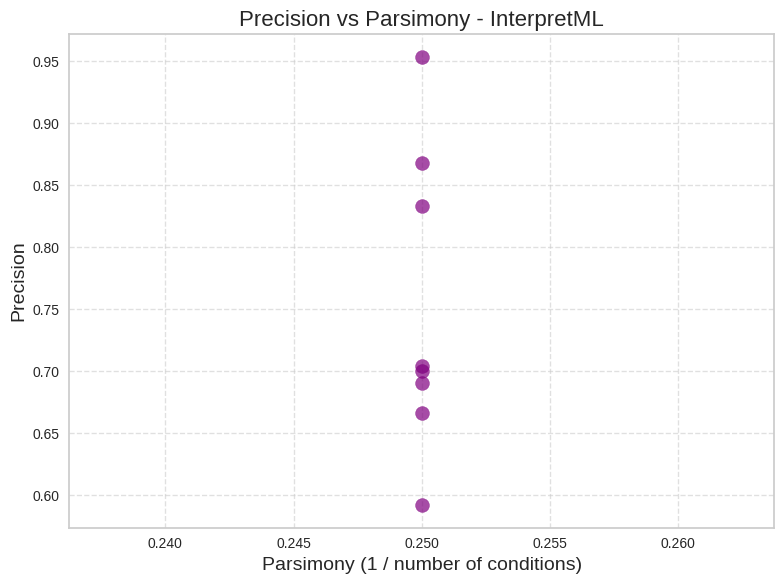

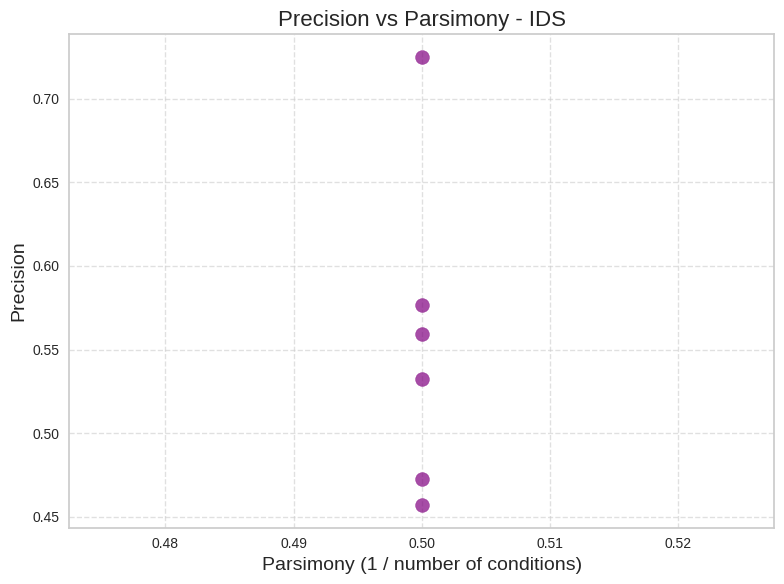

In [53]:
# Ejemplo para scikit-learn
metrics_sklearn, _ = calculate_tree_interpretability_metrics(tree_sklearn, X_train_smote, y_train_smote, selected_features)
plot_precision_vs_parsimony(metrics_sklearn, 'scikit-learn')

# Ejemplo para InterpretML
metrics_interpretml, _ = calculate_tree_interpretability_metrics(sk_tree_model_interpretml, X_train_smote, y_train_smote, selected_features)
plot_precision_vs_parsimony(metrics_interpretml, 'InterpretML')

# Ejemplo para IDS
metrics_ids, _ = calculate_ids_interpretability_metrics(ids_model, X_train_smote, y_train_smote)
plot_precision_vs_parsimony(metrics_ids, 'IDS')


## Precisión vs Cobertura

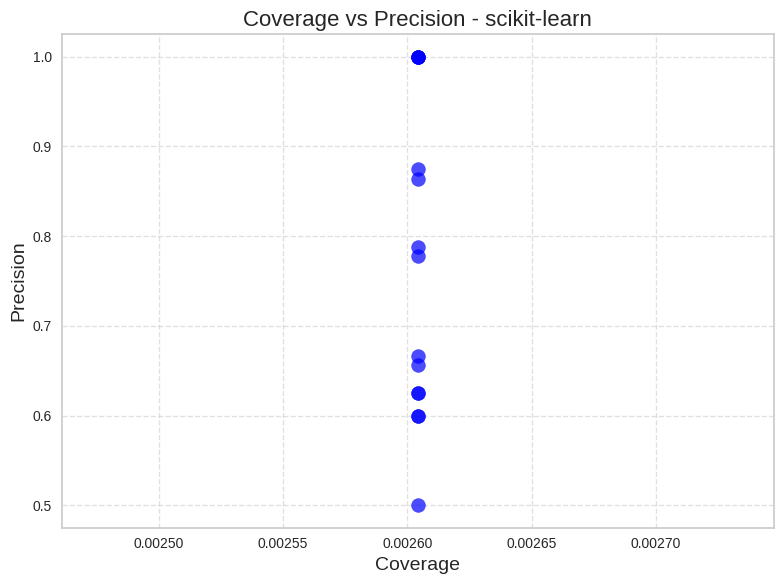

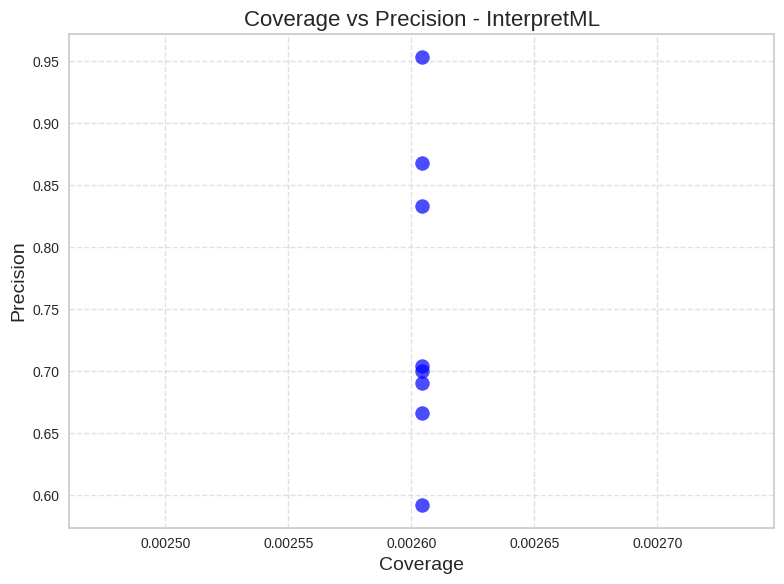

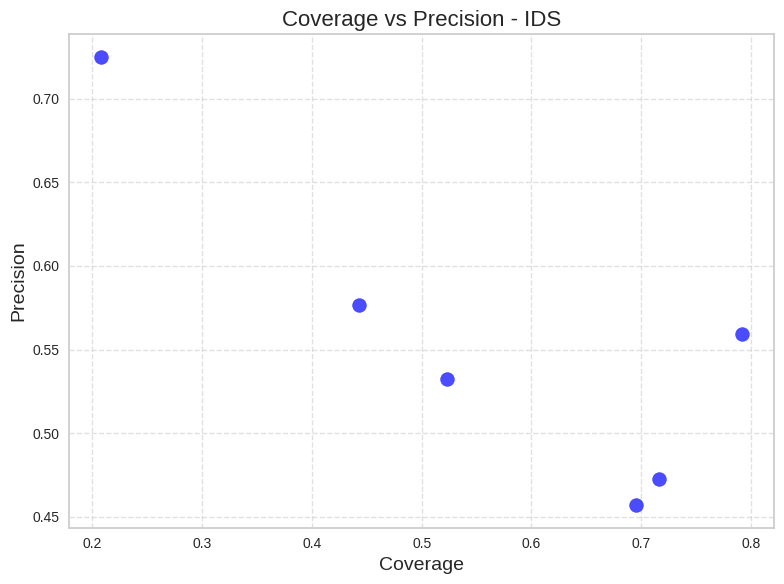

In [54]:
# Ejemplo para scikit-learn
metrics_sklearn, _ = calculate_tree_interpretability_metrics(tree_sklearn, X_train_smote, y_train_smote, selected_features)
plot_coverage_vs_precision(metrics_sklearn, 'scikit-learn')

# Ejemplo para InterpretML
metrics_interpretml, _ = calculate_tree_interpretability_metrics(sk_tree_model_interpretml, X_train_smote, y_train_smote, selected_features)
plot_coverage_vs_precision(metrics_interpretml, 'InterpretML')

# Ejemplo para IDS
metrics_ids, _ = calculate_ids_interpretability_metrics(ids_model, X_train_smote, y_train_smote)
plot_coverage_vs_precision(metrics_ids, 'IDS')


## Distribución de Predicciones

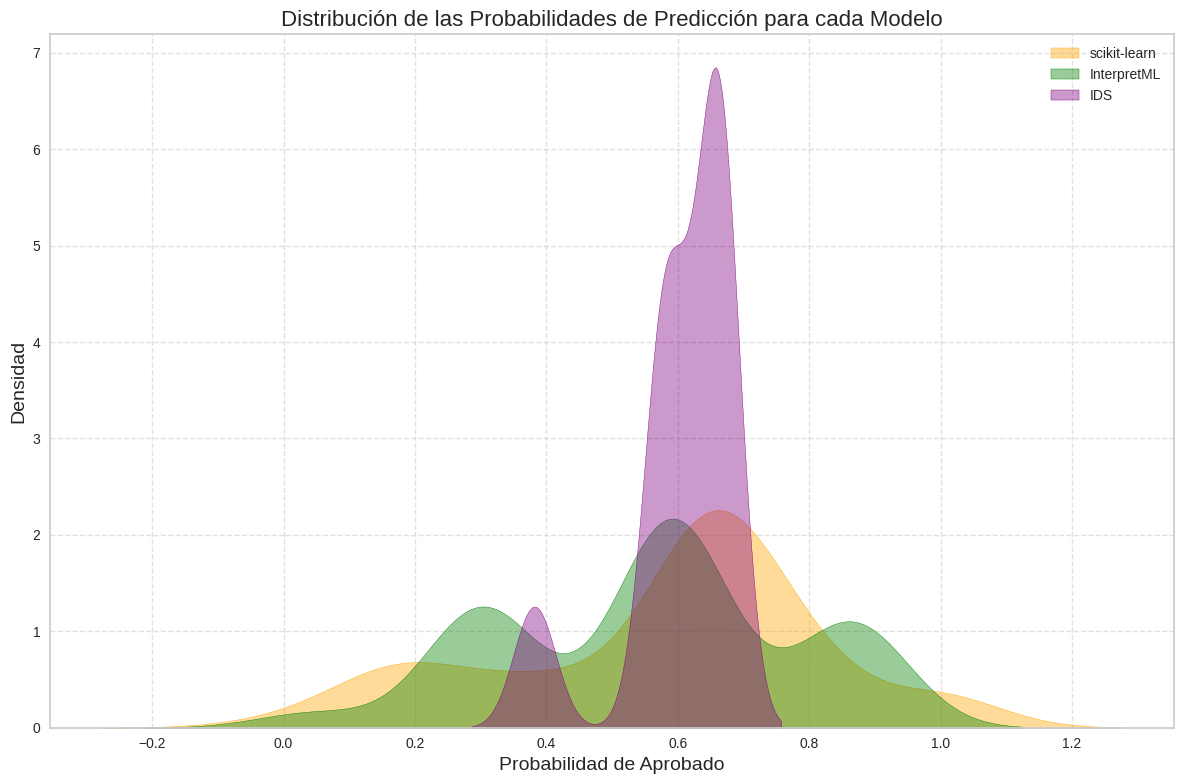

In [55]:
# Obtener las probabilidades de predicción para cada modelo

# scikit-learn
prob_sklearn = tree_sklearn.predict_proba(X_test)[:, 1]  # Probabilidad de "Aprobado"

# InterpretML
prob_interpretml = interpretml_tree.predict_proba(X_test)[:, 1]  # Probabilidad de "Aprobado"

# Calcular las probabilidades para el modelo IDS
prob_ids = calculate_ids_probabilities(ids_model, X_test, y_test)

# Ahora puedes utilizar estas probabilidades para graficarlas
plot_probability_distribution(y_test, prob_sklearn, prob_interpretml, prob_ids)


## Precisión de Reglas

### Scikit-learn

<ipython-input-56-6cbe3034d9f2>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




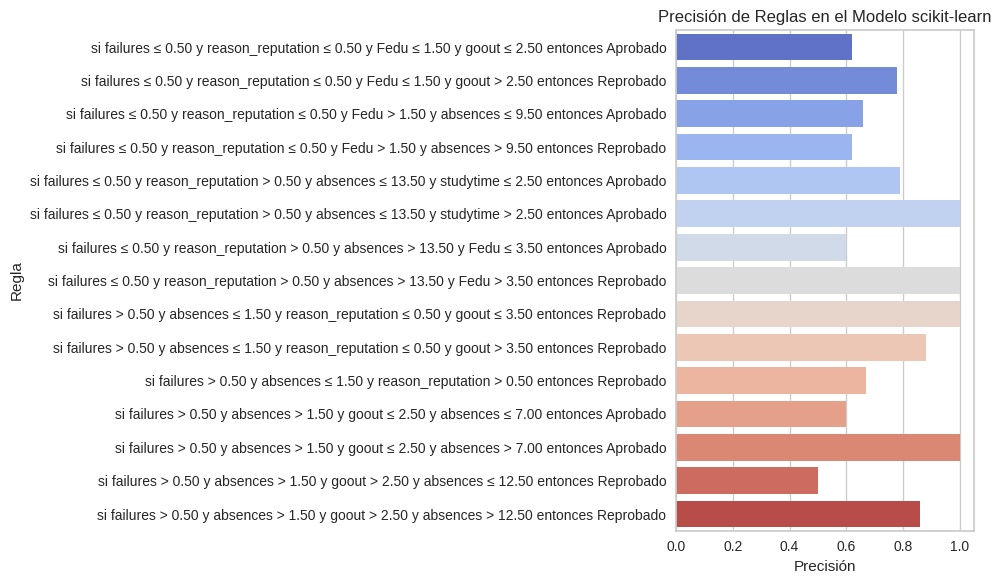

In [56]:
# 1. Extraer reglas para el modelo scikit-learn
rules_sklearn = extract_rules(tree_sklearn, X_train_smote, selected_features)

# 2. Crear el gráfico de barras de precisión por regla para scikit-learn
plt.figure(figsize=(10, 6))
sns.barplot(x='Precisión', y='Regla', data=rules_sklearn, palette='coolwarm')
plt.title('Precisión de Reglas en el Modelo scikit-learn')
plt.xlabel('Precisión')
plt.ylabel('Regla')
plt.tight_layout()
plt.show()


### InterpretML

<ipython-input-57-58752d4b62ff>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




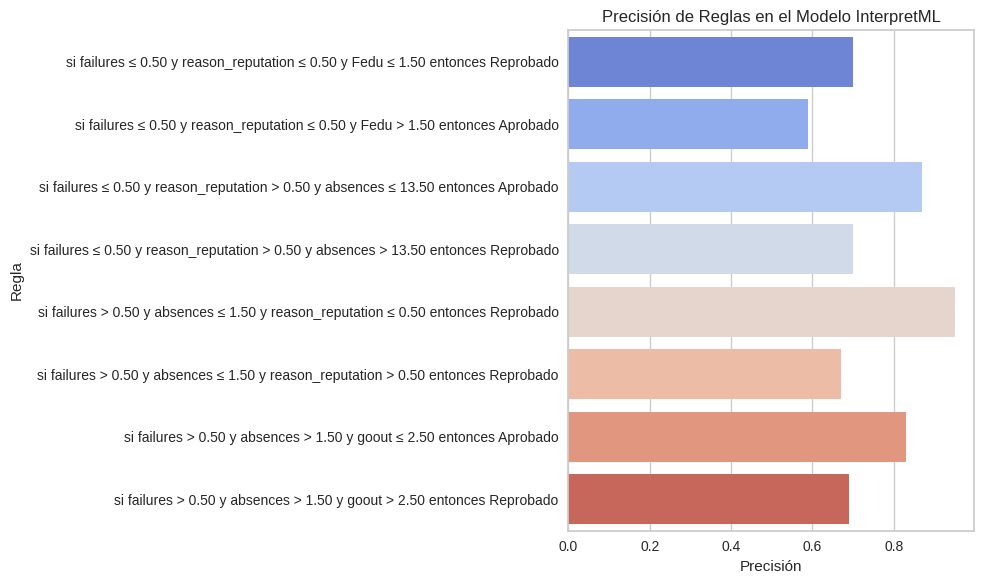

In [57]:
# 1. Extraer reglas para InterpretML
rules_interpretml = extract_rules(sk_tree_model_interpretml, X_train_smote, selected_features)

# 2. Crear el gráfico de barras de precisión por regla para InterpretML
plt.figure(figsize=(10, 6))
sns.barplot(x='Precisión', y='Regla', data=rules_interpretml, palette='coolwarm')
plt.title('Precisión de Reglas en el Modelo InterpretML')
plt.xlabel('Precisión')
plt.ylabel('Regla')
plt.tight_layout()
plt.show()


### IDS

<ipython-input-58-59e94e4c7af6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




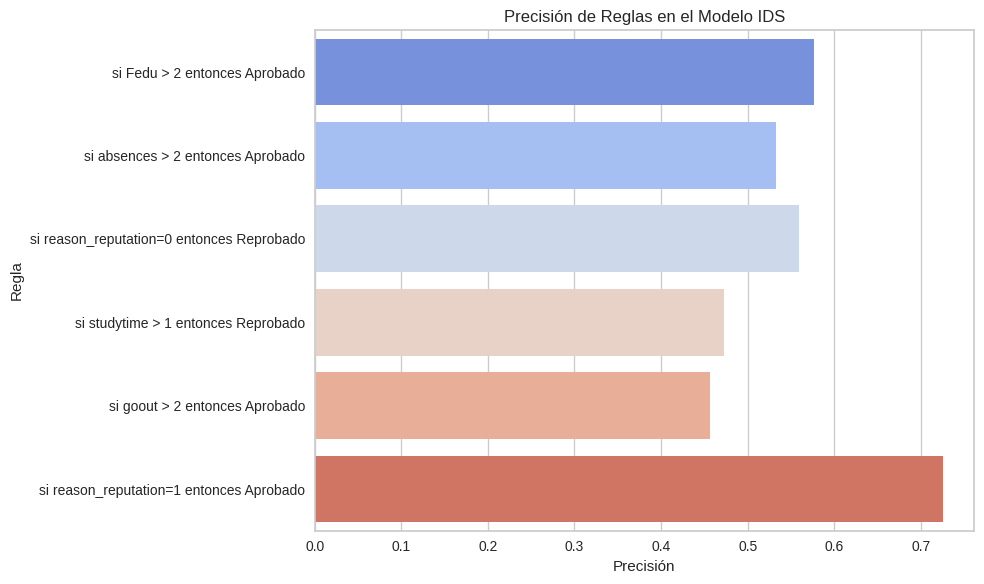

In [58]:
# Usando el DataFrame de reglas extraído para IDS
plt.figure(figsize=(10, 6))
sns.barplot(x='precision', y='rule', data=rules_df_ids, palette='coolwarm')
plt.title('Precisión de Reglas en el Modelo IDS')
plt.xlabel('Precisión')
plt.ylabel('Regla')
plt.tight_layout()
plt.show()


## Gráfica de Interpretabilidad (sin precisión)

Interpretabilidad Modelo scikit-learn: 0.4014
Interpretabilidad Modelo InterpretML: 0.4250
Interpretabilidad Modelo IDS: 0.3557


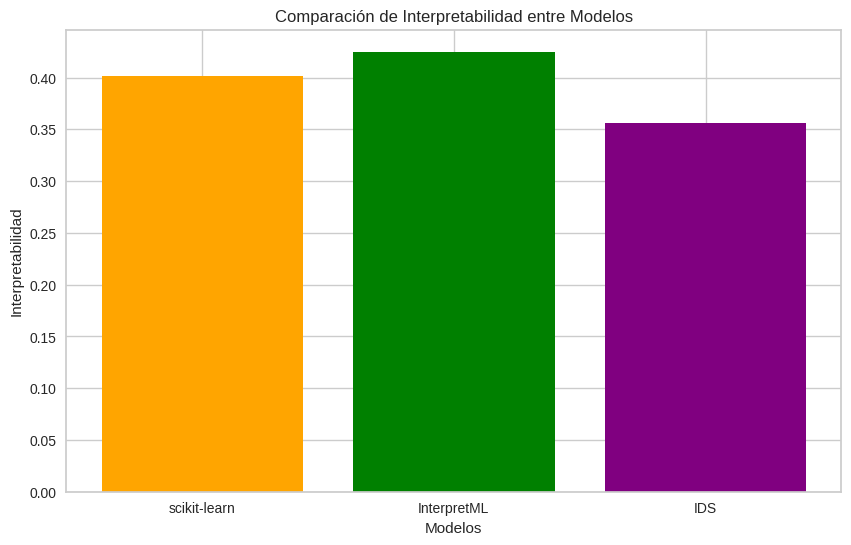

In [59]:
# Función para calcular la interpretabilidad de un modelo
def calculate_interpretability(model_properties):
    """
    Calcula la interpretabilidad basada en las métricas de parsimonia, cobertura y solapamiento.

    Args:
        model_properties (dict): Diccionario con las propiedades del modelo.

    Returns:
        interpretability (float): Valor calculado de la interpretabilidad.
    """
    parsimony = 1 / (model_properties['avg_length'] + 1)  # Invertimos la longitud promedio para obtener parsimonia
    coverage = model_properties['cover'] / len(X_train_smote)  # Cobertura relativa al total de datos
    overlap = model_properties['overlap'] / len(X_train_smote)  # Proporción de solapamiento

    # Pesos ajustados
    beta = 0.5  # Peso para parsimonia
    gamma = 0.3  # Peso para cobertura
    delta = 0.2  # Peso para solapamiento

    # Fórmula de interpretabilidad
    interpretability = beta * parsimony + gamma * coverage - delta * overlap
    return interpretability

# Obtener las propiedades del modelo scikit-learn
properties_sklearn = calculate_rule_properties(tree_sklearn, X_train_smote, model_type="tree")

# Para InterpretML, obtenemos el modelo subyacente de scikit-learn
sk_tree_model_interpretml = interpretml_tree._model()
properties_interpretml = calculate_rule_properties(sk_tree_model_interpretml, X_train_smote, model_type="tree")

# Obtener las propiedades del modelo IDS
properties_ids = calculate_rule_properties(ids_model, X_train_smote, model_type="rules")

# Calcular la interpretabilidad de cada modelo
interpretability_sklearn = calculate_interpretability(properties_sklearn)
interpretability_interpretml = calculate_interpretability(properties_interpretml)
interpretability_ids = calculate_interpretability(properties_ids)

# Mostrar resultados
print(f"Interpretabilidad Modelo scikit-learn: {interpretability_sklearn:.4f}")
print(f"Interpretabilidad Modelo InterpretML: {interpretability_interpretml:.4f}")
print(f"Interpretabilidad Modelo IDS: {interpretability_ids:.4f}")

# Graficar los resultados
models = ['scikit-learn', 'InterpretML', 'IDS']
interpretabilities = [interpretability_sklearn, interpretability_interpretml, interpretability_ids]

plt.figure(figsize=(10, 6))
plt.bar(models, interpretabilities, color=['orange', 'green', 'purple'])
plt.title('Comparación de Interpretabilidad entre Modelos')
plt.ylabel('Interpretabilidad')
plt.xlabel('Modelos')
plt.show()


## Gráfica de Interpretabilidad (con precisión)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



Interpretabilidad Modelo scikit-learn: 0.4802
Interpretabilidad Modelo InterpretML: 0.4992
Interpretabilidad Modelo IDS: 0.4667


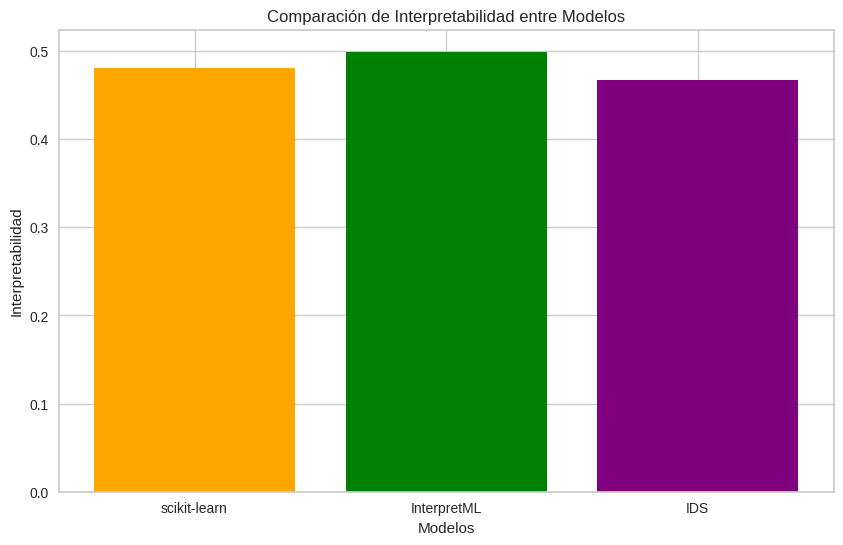

In [60]:
# Función para calcular la interpretabilidad de un modelo
def calculate_interpretability(model_properties, precision):
    """
    Calcula la interpretabilidad basada en las métricas de precisión, parsimonia, cobertura y solapamiento.

    Args:
        model_properties (dict): Diccionario con las propiedades del modelo.
        precision (float): Precisión del modelo.

    Returns:
        interpretability (float): Valor calculado de la interpretabilidad.
    """
    parsimony = 1 / (model_properties['avg_length'] + 1)  # Invertimos la longitud promedio para obtener parsimonia
    coverage = model_properties['cover'] / len(X_train_smote)  # Cobertura relativa al total de datos
    overlap = model_properties['overlap'] / len(X_train_smote)  # Proporción de solapamiento

    # Pesos ajustados
    alpha = 0.3  # Peso para precisión
    beta = 0.4  # Peso para parsimonia
    gamma = 0.2  # Peso para cobertura
    delta = 0.1  # Peso para solapamiento

    # Fórmula de interpretabilidad que ahora incluye la precisión
    interpretability = alpha * precision + beta * parsimony + gamma * coverage - delta * overlap
    return interpretability

# Obtener las propiedades del modelo scikit-learn
properties_sklearn = calculate_rule_properties(tree_sklearn, X_train_smote, model_type="tree")

# Para InterpretML, obtenemos el modelo subyacente de scikit-learn
sk_tree_model_interpretml = interpretml_tree._model()
properties_interpretml = calculate_rule_properties(sk_tree_model_interpretml, X_train_smote, model_type="tree")

# Obtener las propiedades del modelo IDS
properties_ids = calculate_rule_properties(ids_model, X_train_smote, model_type="rules")

# Precisión de cada modelo (estos valores deberían calcularse con las predicciones de cada modelo)
precision_sklearn = tree_sklearn.score(X_test, y_test)  # Precisión para scikit-learn
precision_interpretml = sk_tree_model_interpretml.score(X_test, y_test)  # Precisión para InterpretML
precision_ids = accuracy_score(y_test, ids_model.predict(X_test))  # Precisión para IDS

# Calcular la interpretabilidad de cada modelo incluyendo la precisión
interpretability_sklearn = calculate_interpretability(properties_sklearn, precision_sklearn)
interpretability_interpretml = calculate_interpretability(properties_interpretml, precision_interpretml)
interpretability_ids = calculate_interpretability(properties_ids, precision_ids)

# Mostrar resultados
print(f"Interpretabilidad Modelo scikit-learn: {interpretability_sklearn:.4f}")
print(f"Interpretabilidad Modelo InterpretML: {interpretability_interpretml:.4f}")
print(f"Interpretabilidad Modelo IDS: {interpretability_ids:.4f}")

# Graficar los resultados
models = ['scikit-learn', 'InterpretML', 'IDS']
interpretabilities = [interpretability_sklearn, interpretability_interpretml, interpretability_ids]

plt.figure(figsize=(10, 6))
plt.bar(models, interpretabilities, color=['orange', 'green', 'purple'])
plt.title('Comparación de Interpretabilidad entre Modelos')
plt.ylabel('Interpretabilidad')
plt.xlabel('Modelos')
plt.show()


## Grafos IDS de ejemplo para introducción

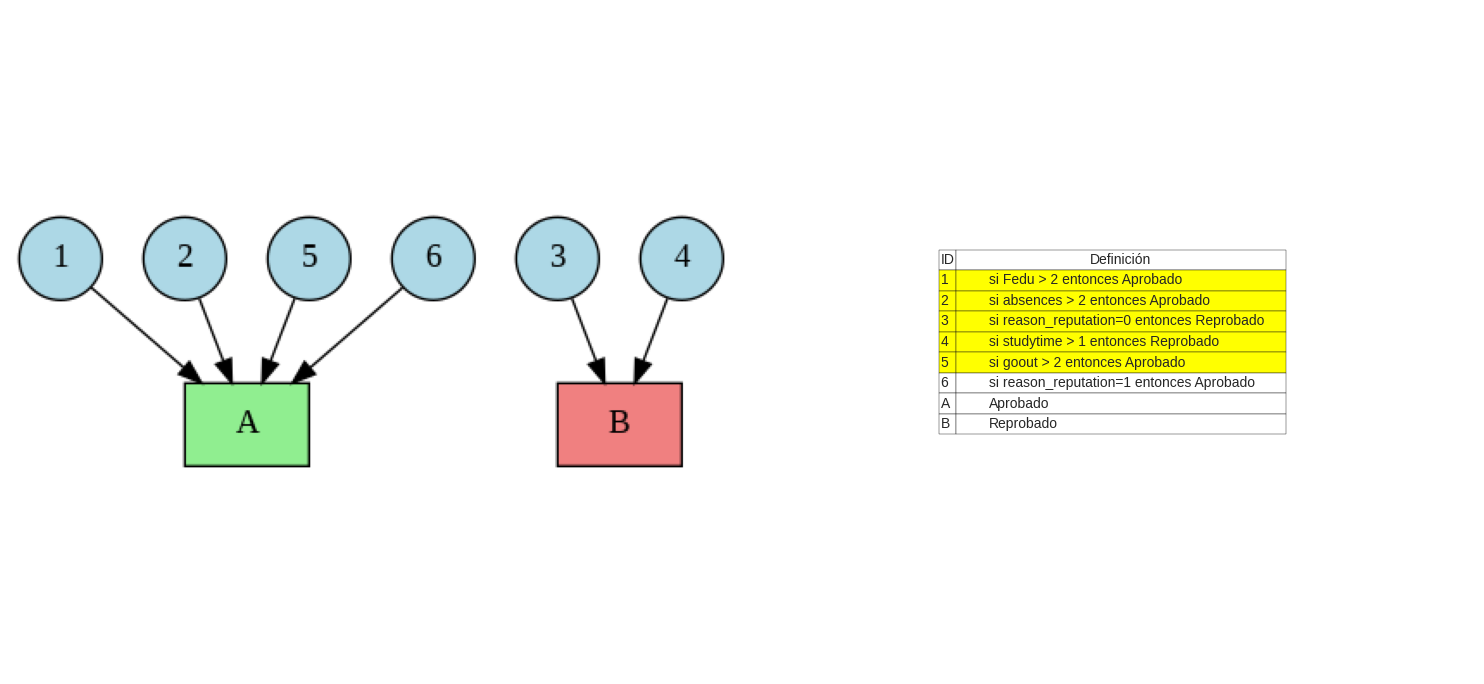

In [61]:
explain_global_ids(ids_model, rules_df_ids, test_features=test_features, highlight_predicted_in_table=False)

Reglas de ejemplo basadas en las características:
Regla 1: Si Fedu > 2 entonces Aprobado
Regla 2: Si absences < 3 y studytime > 2 entonces Aprobado
Regla 3: Si failures > 1 entonces Reprobado
Regla 4: Si goout > 4 y reason_reputation = 0 entonces Reprobado
Regla 5: Si studytime < 1 y Fedu < 2 entonces Reprobado
Regla 6: Si absences > 10 y reason_reputation = 1 entonces Aprobado

Valores de las características de la observación:
Fedu: 3
absences: 2
studytime: 3
failures: 0
goout: 5
reason_reputation: 0


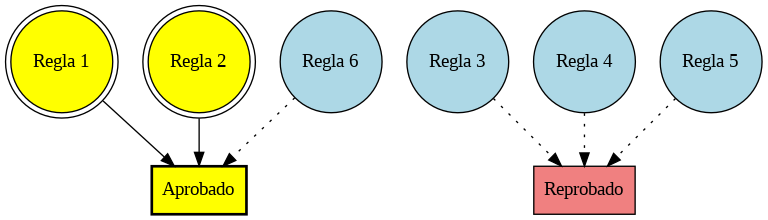

In [62]:
from graphviz import Digraph
from IPython.display import Image, display

# Crear reglas de ejemplo
rules = [
    "Si Fedu > 2 entonces Aprobado",
    "Si absences < 3 y studytime > 2 entonces Aprobado",
    "Si failures > 1 entonces Reprobado",
    "Si goout > 4 y reason_reputation = 0 entonces Reprobado",
    "Si studytime < 1 y Fedu < 2 entonces Reprobado",
    "Si absences > 10 y reason_reputation = 1 entonces Aprobado"
]

# Mostrar reglas de ejemplo
print("Reglas de ejemplo basadas en las características:")
for idx, rule in enumerate(rules, 1):
    print(f"Regla {idx}: {rule}")

# Valores de cada característica para esta observación
observation = {
    "Fedu": 3,
    "absences": 2,
    "studytime": 3,
    "failures": 0,
    "goout": 5,
    "reason_reputation": 0
}

# Imprimir valores de las características
print("\nValores de las características de la observación:")
for feature, value in observation.items():
    print(f"{feature}: {value}")

# Crear el grafo dirigido usando Graphviz
dot = Digraph(comment='Interpretable Decision Sets (IDS)', graph_attr={'size': '10,10'})

# Reglas (nodos utilizados) - representados con doble óvalo
used_rules = [1, 2]  # Ejemplo de reglas activadas

# Crear nodos para todas las reglas y diferenciarlas con doble óvalo si se usaron
node_colors = {}  # Almacena el color de cada nodo
for rule_id in range(1, 7):  # Hay 6 reglas
    if rule_id in used_rules:
        dot.node(str(rule_id), f'Regla {rule_id}', shape='doublecircle', style='filled', fillcolor='yellow')
        node_colors[str(rule_id)] = 'yellow'
    else:
        dot.node(str(rule_id), f'Regla {rule_id}', shape='circle', style='filled', fillcolor='lightblue')
        node_colors[str(rule_id)] = 'lightblue'

# Nodos para los resultados (A: Aprobado, B: Reprobado)
dot.node('A', 'Aprobado', shape='doublebox', style='filled,bold', fillcolor='yellow')  # Resaltar predicción final
dot.node('B', 'Reprobado', shape='box', style='filled', fillcolor='lightcoral')

# Conectar las reglas con las clases de predicción
edges = [
    (1, 'A'), (2, 'A'), (3, 'B'), (4, 'B'),
    (5, 'B'), (6, 'A')
]
for edge in edges:
    src, dst = edge
    # Verificar si el nodo fuente (src) es azul claro
    if node_colors.get(str(src)) == 'lightblue':
        dot.edge(str(src), dst, style='dotted')  # Flecha punteada
    else:
        dot.edge(str(src), dst)  # Flecha sólida

# Guardar y visualizar el grafo
dot.format = 'png'
dot.render('/mnt/data/ids_graph_with_doublebox')

# Mostrar la imagen en Colab
display(Image(filename='/mnt/data/ids_graph_with_doublebox.png'))


Reglas de ejemplo basadas en las características:
Regla 1: Si Fedu > 2 entonces Aprobado
Regla 2: Si absences < 3 y studytime > 2 entonces Aprobado
Regla 3: Si failures > 1 entonces Reprobado
Regla 4: Si goout > 4 y reason_reputation = 0 entonces Reprobado
Regla 5: Si studytime < 1 y Fedu < 2 entonces Reprobado
Regla 6: Si absences > 10 y reason_reputation = 1 entonces Aprobado

Valores de las características de la observación:
Fedu: 3
absences: 2
studytime: 3
failures: 0
goout: 5
reason_reputation: 0


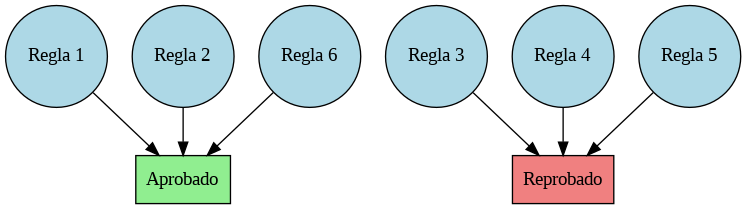

In [63]:
# Crear reglas de ejemplo
rules = [
    "Si Fedu > 2 entonces Aprobado",
    "Si absences < 3 y studytime > 2 entonces Aprobado",
    "Si failures > 1 entonces Reprobado",
    "Si goout > 4 y reason_reputation = 0 entonces Reprobado",
    "Si studytime < 1 y Fedu < 2 entonces Reprobado",
    "Si absences > 10 y reason_reputation = 1 entonces Aprobado"
]

# Mostrar reglas de ejemplo
print("Reglas de ejemplo basadas en las características:")
for idx, rule in enumerate(rules, 1):
    print(f"Regla {idx}: {rule}")

# Valores de cada característica para esta observación
observation = {
    "Fedu": 3,
    "absences": 2,
    "studytime": 3,
    "failures": 0,
    "goout": 5,
    "reason_reputation": 0
}

# Imprimir valores de las características
print("\nValores de las características de la observación:")
for feature, value in observation.items():
    print(f"{feature}: {value}")

# Crear el grafo dirigido usando Graphviz
dot = Digraph(comment='Interpretable Decision Sets (IDS)', graph_attr={'size': '10,10'})

# Crear nodos para todas las reglas sin doble círculo y con color azul
for rule_id in range(1, 7):  # Hay 6 reglas
    dot.node(str(rule_id), f'Regla {rule_id}', shape='circle', style='filled', fillcolor='lightblue')

# Nodos para los resultados (A: Aprobado, B: Reprobado) con colores verde y rojo
dot.node('A', 'Aprobado', shape='box', style='filled', fillcolor='lightgreen')
dot.node('B', 'Reprobado', shape='box', style='filled', fillcolor='lightcoral')

# Conectar las reglas con las clases de predicción
edges = [
    (1, 'A'), (2, 'A'), (3, 'B'), (4, 'B'),
    (5, 'B'), (6, 'A')
]
for edge in edges:
    dot.edge(str(edge[0]), edge[1])

# Guardar y visualizar el grafo
dot.format = 'png'
dot.render('/mnt/data/ids_graph_with_green_red')

# Mostrar la imagen en Colab
display(Image(filename='/mnt/data/ids_graph_with_green_red.png'))
